# **Project Title:**  Drug Response Prediction
### Student Name: Tanaya Jayprakash Bowade
### Student ID: A00014485


---



### **Project Summary**

- **Objective:**  
  This project aims to develop a deep learning model to predict the **drug response (IC50 values)** of cancer cell lines based on **molecular features of drugs** and **gene expression profiles** of cell lines. The ultimate goal is to assist in personalized cancer treatment recommendations by identifying effective drug–cell combinations.

- **Dataset Overview:**  
  The project utilizes:
  - **GDSC (Genomics of Drug Sensitivity in Cancer)** for drug response data (IC50 values)
  - **CCLE (Cancer Cell Line Encyclopedia)** for gene expression data of cancer cell lines  
  These datasets are highly relevant in pharmacogenomics and enable training models that reflect real-world biological behavior.

- **Deep Learning Approach:**  
  A hybrid **Graph-CNN + 1D-CNN** architecture was employed:
  - **Graph Convolutional Network (GCN)** to model drug molecular structures from SMILES strings
  - **1D Convolutional Neural Network** to process gene expression data  
  The combined features are passed through **cross-attention layers** and fully connected layers to predict IC50 drug response values.





---



### References


[1] Structured Data Stored at https://drive.google.com/file/d/1cwBgLi-QLPtOS_hoehR3POlPLlWCs6eV/view?usp=drive_link  
Sources:
 - [1.1] Drug data :`PANCANCER_IC.csv` from GDSC  https://www.cancerrxgene.org/downloads/drug_data

 - [1.2] Gene Expression data :`CCLE_expression.csv` from CCLE https://depmap.org/portal/download/all/

 - [1.3] SMILES structures data: `drug_smiles.csv` from Pubchem  https://pubchem.ncbi.nlm.nih.gov/source/

 - [1.4] Additional Files `sample_info.csv` and `landmark_genes.txt` https://github.com/SCSE-Biomedical-Computing-Group/XGDP/tree/main/data


[2] @conghaowang. (2025). *XGDP*. GitHub repository.  
   https://github.com/SCSE-Biomedical-Computing-Group/XGDP  
   - Used for SMILES-to-graph conversion and atom feature encoding.
   - Adapted due to domain-specific biochemical knowledge.


[3] RDKit: Open-source cheminformatics.  
   https://www.rdkit.org  
   - Used for parsing and processing SMILES molecular structures.

[4] PyTorch Geometric (PyG).  
   https://pytorch-geometric.readthedocs.io/en/latest/  
   - Used for graph data representation and GCN models.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install nvidia-ml-py3

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19172 sha256=3698f2788c706a8ee09738809c2a3eb5a9af671d6468a9f2b552dfab9ec69351
  Stored in directory: /root/.cache/pip/wheels/47/50/9e/29dc79037d74c3c1bb4a8661fb608e8674b7e4260d6a3f8f51
Successfully built nvidia-ml-py3


In [3]:
#For RDkit compatibility
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


!!!!!! **Restart session after installing above numpy version** !!!!!

In [1]:
#Installing dependencies
#  Install Core Libraries %numpy pandas scikit-learn matplotlib seaborn
!pip install tqdm joblib

# Verify Pre-installed PyTorch Version
import torch
print("PyTorch Version:", torch.__version__)  # Should show pre-installed version

# Install PyTorch Geometric (GNNs)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-geometric

# Install RDKit & Molecular Processing Packages
!pip install rdkit-pypi pubchempy molvs


PyTorch Version: 2.6.0+cu124
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.3 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 60.0 MB/s eta

In [30]:
!pip install torch-optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [31]:
import numpy as np
import pandas as pd
import pickle
import pubchempy as pcp
from collections import Counter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw


from rdkit.Chem import AllChem
from rdkit import DataStructs
from molvs import standardize_smiles

import random
from random import shuffle

import time
import datetime

import networkx as nx

import csv
import math
from math import sqrt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
import nvidia_smi
from tqdm import tqdm
import json


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import global_add_pool
import torch_optimizer



from torch_geometric.data import InMemoryDataset
from torch_geometric.data import DataLoader
from torch_geometric import data as DATA

from sklearn.preprocessing import StandardScaler

# **Step I : Data Preparation**

### **Overview**
This project utilises the **GDSC drug sensitivity dataset** and **CCLE gene expression dataset** to predict cancer cell responses to drugs. The data is preprocessed into a structured format before being used for deep learning.

---

### **Steps in Data Preparation**

#### **i. Retrieving and Organising Data**
- Drug response data (`PANCANCER_IC`) from **GDSC**.
- Gene expression data (`CCLE_expression`) from **CCLE**.
- SMILES structure drugs data (`drug_smiles.csv`) from **PubChem**
- Data is stored in `root_folder/`, with unique branches for different experiments.

---

#### **ii. Extracting Features**

**Drug Molecular Features**
- Graph-based representations using SMILES strings (GNN-compatible).
- Atomic and bond-level features extracted from molecular graphs.

**Gene Expression Features**
- Top 1000 landmark genes selected for feature representation.
- Filtering with L1000 ensures high-quality, biologically relevant expression data.

---

#### **iii. Merging Drug and Gene Expression Data**
- The function `prepare_drug_cellline_dataset()` integrates:
  - **Drug molecular graph features**
  - **Gene expression profiles**
  - **IC50 drug response values**

- All valid drug–cell line combinations are preserved.
- Missing entries are excluded automatically to maintain data consistency.

---

#### **iv. Missing Data Check**

- To ensure data integrity, each drug-cell line pair was checked for:
  - Availability of the **drug's SMILES structure**
  - Availability of the **cell line's gene expression profile**

- **Total drug-cell-line pairs**: 224,510  
- **Missing entries detected**: 91,298  
- These incomplete entries were **excluded** from model training to avoid issues with NaNs or corrupted inputs.

---

#### **v. Outlier Detection in Target Variable (IC50)**

- IC50 values were evaluated using **Interquartile Range (IQR)** method to identify statistical outliers.
- **Outliers detected**: 4,151 values
- **Outlier percentage**: 3.12% (out of 133,212 valid samples)

> Despite the presence of mild outliers, no IC50 values were removed to retain biological variability. Loss functions like `HuberLoss` were considered to handle potential outlier impact.

---

#### **vi. Splitting into Train, Validation, and Test Sets**
- Data was split using an **80-10-10 rule** for training, validation, and testing.
- Random shuffling applied for reproducibility.
- Final splits saved in PyTorch-compatible format (`.pt`).

---

#### **vii. Dataset Partitions**

| Partition        | Purpose              | Size  |
|------------------|-----------------------|--------|
| **Training Set**   | Used for model learning   | 80%    |
| **Validation Set** | Used for hyperparameter tuning | 10%    |
| **Test Set**       | Used for final evaluation   | 10%    |

---

### **Result**
The final dataset contains only complete, clean drug–cell line pairs and is saved in `root_folder/` in a format ready for GNN and CNN model training.


## **Implementation**

Data Loading Steps for reproduction of code :

1. Download the structured data (data.zip)file from this drive link https://drive.google.com/file/d/1cwBgLi-QLPtOS_hoehR3POlPLlWCs6eV/view?usp=drive_link  and place the folder in your local colab workspace .
2. The path of the file should be  `/content/data.zip`

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Unzip the folder after download

#Replace this location with your path where you have saved the data from the provided link
!unzip /content/drive/MyDrive/Drug_Response_DeepLearning/data.zip

Archive:  /content/drive/MyDrive/Drug_Response_DeepLearning/data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/GDSC/
  inflating: __MACOSX/data/._GDSC    
   creating: data/CCLE/
  inflating: __MACOSX/data/._CCLE    
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/landmark_genes.txt  
  inflating: __MACOSX/data/._landmark_genes.txt  
  inflating: data/GDSC/drug_smiles.csv  
  inflating: __MACOSX/data/GDSC/._drug_smiles.csv  
  inflating: data/GDSC/.DS_Store     
  inflating: __MACOSX/data/GDSC/._.DS_Store  
  inflating: data/GDSC/PANCANCER_IC.csv  
  inflating: __MACOSX/data/GDSC/._PANCANCER_IC.csv  
  inflating: data/CCLE/CCLE_expression.csv  
  inflating: __MACOSX/data/CCLE/._CCLE_expression.csv  
  inflating: data/CCLE/sample_info.csv  
  inflating: __MACOSX/data/CCLE/._sample_info.csv  


Feature Engineering for Molecular Representation

In [5]:
# Adapted from [2]
# Reason for use: This code involves biochemical domain knowledge (e.g., SMILES parsing, atom feature encoding)
# which required expertise beyond my current scope. The implementation was adapted with attribution,
# and used as a foundation for further development in this project.
# Modifications:
# - Logic adjustments for compatibility with my pipeline
# - Variable renaming and docstring additions

def convert_smile_to_graph(smiles_str, include_bond_features=False, use_relational_bonds=False):
    """
    Converts a SMILES string representation of a molecule into graph representation.

    Args:
        smiles_str (str): The SMILES string representing a molecule.

    Returns:
        dict: Graph representation with nodes and edges.
    """
    molecule = Chem.MolFromSmiles(smiles_str)
    num_atoms = molecule.GetNumAtoms()

    # Extract atom features
    atom_features = []
    for atom in molecule.GetAtoms():
        atom_encoding = encode_atom_features(atom)
        atom_features.append(sum(atom_encoding)*atom_encoding / sum(atom_encoding))

    bond_feature_dict = {}
    edge_pairs = []
    bond_feature_list = []

    for bond in molecule.GetBonds():
        edge_pairs.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

        if include_bond_features:
            bond_encoding = [0 for _ in range(4)]
            bond_type_index = ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC'].index(str(bond.GetBondType()))
            bond_encoding[bond_type_index] = 1

            if use_relational_bonds:
                bond_features_array = np.array([bond_type_index])
            else:
                bond_features_array = np.array(bond_encoding)

            bond_feature_dict[(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())] = bond_features_array
            bond_feature_dict[(bond.GetEndAtomIdx(), bond.GetBeginAtomIdx())] = bond_features_array

    graph_obj = nx.Graph(edge_pairs).to_directed()
    directed_edges = []
    for src_node, dst_node in graph_obj.edges:
        directed_edges.append([src_node, dst_node])
        if include_bond_features:
            bond_feature_list.append(bond_feature_dict[(src_node, dst_node)])

    if include_bond_features:
        return num_atoms, atom_features, directed_edges, bond_feature_list, graph_obj
    else:
        return num_atoms, atom_features, directed_edges, graph_obj



def load_smile_to_graph(include_bond_features=False, use_relational_bonds=False, data_dir="/content/data/GDSC/"):
    """
    Converts drug SMILES strings into graph-based molecular representations.

    Returns:
        - drug_name_to_index (dict): Maps each drug name (str) to its corresponding index (int) in the drug_smile list.
        - smiles_list (list): List of SMILES strings representing drug molecules.
        - smiles_graph_map (dict): Maps each SMILES string (str) to its graph representation as a tuple:
            (num_atoms, node_features, edge_index, [edge_features], networkx_graph)
    """
    drug_name_to_index = {}
    smiles_list = []

    reader = csv.reader(open(data_dir + "drug_smiles.csv"))
    next(reader, None)

    for cnt, item in enumerate(reader):
        name = item[0]
        smile = item[2]

        if smile == "N.N.[Cl-].[Cl-].[Pt+2]":
            continue

        if name in drug_name_to_index:
            pos = drug_name_to_index[name]
        else:
            pos = len(drug_name_to_index)
            drug_name_to_index[name] = pos

        smiles_list.append(smile)

    smiles_graph_map = {}

    for smile in smiles_list:
        gr = convert_smile_to_graph(smile,include_bond_features, use_relational_bonds)
        smiles_graph_map[smile] = gr

    return drug_name_to_index, smiles_list, smiles_graph_map



def preprocess_gene_expression(expr_df, metadata_df):
    """
    Preprocesses gene expression data from the CCLE dataset using landmark genes and COSMIC IDs.

    This function filters the input gene expression matrix to retain only the landmark genes
    (common informative genes), merges it with sample metadata using DepMap IDs, and returns
    a cleaned matrix indexed by COSMIC IDs.

    Args:
        expr_df (pd.DataFrame): Gene expression data (samples x genes) with DepMap IDs as index.
        metadata_df (pd.DataFrame): Metadata including 'DepMap_ID' and 'COSMICID' columns.

    Returns:
        pd.DataFrame: Processed gene expression matrix (indexed by COSMICID) with only landmark genes.
    """

    landmark_df = pd.read_csv('/content/data/landmark_genes.txt', sep='\t', header=0)
    landmark_genes = landmark_df['Symbol'].values
    expr_df.columns = [c.split(' (')[0] for c in expr_df.columns]

    valid_genes = expr_df.columns.values
    chosen_genes = np.intersect1d(landmark_genes, valid_genes)
    filtered_expr_df = expr_df[chosen_genes]
    print('number of preserved landmark genes:', len(chosen_genes))

    metadata_df = metadata_df[metadata_df['COSMICID'].notna()]
    expr_data = filtered_expr_df.merge(
        metadata_df, left_index=True, right_on='DepMap_ID')
    expr_data.drop('DepMap_ID', axis=1, inplace=True)

    expr_data['COSMICID'] = expr_data['COSMICID'].astype(int).astype(str)
    expr_data.set_index('COSMICID', inplace=True)

    return expr_data



def save_preprocessed_gene_data(data_dir='/content/data/CCLE/'):
    """
    Loads and preprocesses gene expression data from the CCLE dataset.

    This function reads gene expression values and sample metadata from the specified folder,
    filters the gene expression matrix using landmark genes, and constructs:
    - a dictionary mapping COSMIC IDs to index positions,
    - a matrix of gene expression values, and
    - the list of selected gene names.

    Args:
        data_dir (str, optional): Path to the directory containing 'CCLE_expression.csv' and 'sample_info.csv'. Defaults to '/content/data/CCLE/'.

    Returns:
        tuple:
            - cell_id_to_index (dict): Mapping from COSMIC ID (str) to its index (int) in the expression matrix.
            - cell_expression_matrix (np.ndarray): Matrix of gene expression values for each cell line.
            - selected_gene_names (pd.Index): List of gene names (columns) in the processed expression matrix.
    """

    expression_df = pd.read_csv(data_dir + 'CCLE_expression.csv', index_col=0, header=0)
    metadata_df = pd.read_csv(data_dir + 'sample_info.csv',
                          header=0, usecols=['DepMap_ID', 'COSMICID'])
    processed_expr_df = preprocess_gene_expression(expression_df, metadata_df)

    cell_lines = processed_expr_df.index.values
    cell_id_to_index = dict()
    for c in cell_lines:
        idx = np.where(cell_lines == c)[0]
        cell_id_to_index[c] = idx

    cell_expression_matrix = processed_expr_df.values
    selected_gene_names = processed_expr_df.columns


    return cell_id_to_index, cell_expression_matrix, selected_gene_names



def prepare_drug_cellline_dataset(include_bond_features=False, use_relational_bonds=False, return_labels=True,
                                     data_dir='/content/data/GDSC/'):
    """
    Builds a dataset combining drug SMILES, gene expression profiles, and IC50 response values.

    Args:
        include_bond_features (bool): Include bond features in drug graphs. Default is False.
        use_relational_bonds (bool): Encode bond types as relational indices. Default is False.
        return_labels (bool): Whether to return drug and cell line names. Default is True.
        data_dir (str): Path to data directory. Default is '/content/data/GDSC/'.

    Returns:
        tuple: (drug_inputs, cell_inputs, y, dglist, coslist, presence_matrix) — drug SMILES, gene expressions, IC50 values,
              drug names, cell line IDs, and binary availability matrix.
    """

    f = open(data_dir + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

    # gene expression features
    cell_map, cell_features, gene_names = save_preprocessed_gene_data()

    gene_names_list = gene_names.tolist()

    # Save gene_names as a file for later
    with open("gene_names.json", "w") as f:
        json.dump(gene_names_list, f)

    # drug molecular features
    drug_map, drug_smiles_list, _ = load_smile_to_graph(include_bond_features, use_relational_bonds)

    print('drug num:', len(drug_map))
    print('cell-line num:', len(cell_map))

    drug_cell_ic50 = []
    presence_matrix = np.zeros((len(drug_map), len(cell_map)))


    for row in reader:
        drug_id = row[0]
        cell_id = row[3]
        ic50_val_str = row[8]

        try:
          if ic50_val_str.strip().lower() in ['na', '', 'nan']:
              continue  # Skip missing/invalid values

          ic50_val = float(ic50_val_str)
          drug_cell_ic50.append((drug_id, cell_id, ic50_val))

        except Exception as e:
          print(f"Skipping row due to error: {e}")
          continue

    print('total length of drug-cellline pair:', len(drug_cell_ic50))

    drug_inputs, cell_inputs, ic50_outputs = [], [], []
    drug_labels, cell_labels = [], []


    missing_cell_ids = []
    missing_drugs = []
    missing_pairs = 0

    for drug_id, cell_id, ic50_val in drug_cell_ic50:
        cell_id = str(cell_id)  # force string

        if drug_id not in drug_map:
            missing_drugs.append(drug_id)
            missing_pairs += 1
            continue

        if cell_id not in cell_map:
            missing_cell_ids.append(cell_id)
            missing_pairs += 1
            continue

        drug_inputs.append(drug_smiles_list[drug_map[drug_id]])
        cell_inputs.append(cell_features[cell_map[cell_id]])
        ic50_outputs.append(ic50_val)
        presence_matrix[drug_map[drug_id], cell_map[cell_id]] += 1
        drug_labels.append(drug_id)
        cell_labels.append(cell_id)

    print(f"✅ Final samples: {len(drug_inputs)}")
    print(f"🚫 Missing pairs skipped: {missing_pairs}")
    print(f"↳ Missing cell IDs: {len(set(missing_cell_ids))}, Missing drug IDs: {len(set(missing_drugs))}")


    drug_inputs, cell_inputs, ic50_outputs = np.asarray(drug_inputs), np.asarray(cell_inputs), np.asarray(ic50_outputs)
    drug_labels, cell_labels = np.asarray(drug_labels), np.asarray(cell_labels)

    print("Converting training data to PyTorch format: 'GDSC_train.pt'")

    return drug_inputs, cell_inputs, ic50_outputs, drug_labels, cell_labels, presence_matrix



def encode_atom_features(atom):
    """
    Encodes the features of an atom into a numerical representation.

    Args:
        atom (object): The atom from which features are to be extracted.

    Returns:
        List[int]: Encoded atom feature vector.
    """
    return np.array(encode_with_unknown(atom.GetSymbol(), ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb', 'Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H', 'Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr', 'Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_hot_encode(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    encode_with_unknown(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    encode_with_unknown(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    [atom.GetIsAromatic()])


def one_hot_encode(x, allowable_set):
    """
    Standard one-hot encoding for known categorical values.

    Args:
        value: The value to encode.
        valid_set: List of allowable values.

    Returns:
        List[int]: One-hot encoded vector.
    """
    if x not in allowable_set:
        raise Exception(
            "input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))


def encode_with_unknown(x, allowable_set):
    """
    One-hot encoding with fallback for unknown values.

    Args:
        value: The value to encode.
        valid_set: List of allowable values.

    Returns:
        List[int]: One-hot vector, mapping unknown values to the last index.
    """
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))


class DrugGeneDataset(InMemoryDataset):
    """
    Custom PyTorch dataset for loading and processing drug and gene expression data.
    """
    def __init__(self, root='root_folder', dataset_name='gdsc',
                 drug_smiles=None, cell_profiles=None, response_values=None, transform=None,
                 pre_transform=None, smiles_graph_map=None, saliency_map=False, test_mode=False, drug_ids=None, cell_ids=None):
        """
        Initialize the dataset by reading raw and processed files for a given dataset.

        Args:
            root (str): Base directory where dataset files are stored.
            dataset_name (str): The specific dataset name to load.
        """
        super(DrugGeneDataset, self).__init__(root, transform, pre_transform)

        self.dataset_name = dataset_name
        self.saliency_map = saliency_map
        self.test_mode = test_mode

        if (self.test_mode):
            self.process(drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids)
        elif os.path.isfile(self.processed_paths[0]):
            print(f"Pre-processed data found at: {self.processed_paths[0]} — loading...")

            self.data, self.slices = torch.load(self.processed_paths[0],weights_only=False)
        else:
            print(f"Pre-processed data not found at {self.processed_paths[0]}. Starting pre-processing...")
            self.process(drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids)
            self.data, self.slices = torch.load(self.processed_paths[0], weights_only=False)

    @property
    def raw_file_names(self):
        pass

    @property
    def processed_file_names(self):
        return [self.dataset_name + '.pt']

    def download(self):
        pass

    def _download(self):
        pass

    def _process(self):
        if not os.path.exists(self.processed_dir):
            os.makedirs(self.processed_dir)


    def process(self, drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids):

        assert (len(drug_smiles) == len(cell_profiles) and len(cell_profiles) == len(
            response_values)), "Input lengths must match!"
        data_instances = []
        total_samples = len(drug_smiles)


        # Collect all IC50 values into a 2D array for fitting
        ic50_array = np.array(response_values).reshape(-1, 1)

        # Fit StandardScaler on the whole set
        scaler = StandardScaler()
        scaled_ic50_array = scaler.fit_transform(ic50_array)

        # Save to a file
        with open("scaler_ic50.pkl", "wb") as f:
            pickle.dump(scaler, f)


        for idx in range(total_samples):

            if ((idx % 2000 == 0 or idx+1 == total_samples) and (not self.test_mode)):
                print('Preprocessing: SMILES to graph: {}/{}'.format(idx+1, total_samples))

            current_smile = drug_smiles[idx]
            cell_expression = cell_profiles[idx]
            scaled_ic50_val = scaled_ic50_array[idx][0]


            drug_label = drug_ids[idx]
            cell_label = cell_ids[idx]

            num_nodes, node_features, edge_indices, bond_features, nx_g = smiles_graph_map[current_smile]

            if (self.test_mode):
                ptr_tensor = torch.tensor([0, int(num_nodes)])
                batch_tensor = torch.zeros((int(num_nodes)), dtype=int)
                data_item = DATA.Data(x=torch.Tensor(node_features),
                                    edge_index=torch.LongTensor(
                                        edge_indices).transpose(1, 0),
                                    y=torch.FloatTensor([scaled_ic50_val]), batch=batch_tensor, ptr=ptr_tensor, smiles=current_smile, drug_name=drug_label, cell_line_name=cell_label)
            else:
                data_item = DATA.Data(x=torch.Tensor(node_features),
                                    edge_index=torch.LongTensor(
                                        edge_indices).transpose(1, 0),
                                    edge_features=torch.Tensor(
                                        bond_features),
                                    y=torch.FloatTensor([scaled_ic50_val]), smiles=current_smile, drug_name=drug_label, cell_line_name=cell_label)


            if self.saliency_map == True:
                data_item.target = torch.tensor(
                    [cell_expression], dtype=torch.float, requires_grad=True)
            else:
                data_item.target = torch.FloatTensor([cell_expression])

            data_item.__setitem__('num_nodes', torch.LongTensor([num_nodes]))

            data_instances.append(data_item)

        if (self.test_mode):
            ptr_tensor = torch.tensor([0, int(num_nodes)])
            batch_tensor = torch.zeros((int(num_nodes)), dtype=int)

        if self.pre_transform is not None:
            data_instances = [self.pre_transform(d) for d in data_instances]

        if (self.test_mode):
            return data_instances

        print('Saving graph dataset to disk...')
        data, slices = self.collate(data_instances)

        if (self.test_mode):
            return (data, slices)

        print(" Saved to file.")
        # save preprocessed data:
        torch.save((data, slices), self.processed_paths[0])
        print(" Complete.")

    def get_drug_smiles(self):
        return self.drug_smiles

In [6]:
include_bond_features = True
use_relational_bonds = True

# Smile to Graphs
X_drug_dict, X_drug_smile, X_smile_graph = load_smile_to_graph(include_bond_features, use_relational_bonds)

# Prepare Data
drug_smiles_array_X, cell_features_array_X, ic50_values_array_X, drug_names_array, cell_ids_array, presence_matrix = prepare_drug_cellline_dataset(
    include_bond_features, use_relational_bonds)

number of preserved landmark genes: 956
drug num: 223
cell-line num: 700
total length of drug-cellline pair: 224510
✅ Final samples: 133212
🚫 Missing pairs skipped: 91298
↳ Missing cell IDs: 379, Missing drug IDs: 27
Converting training data to PyTorch format: 'GDSC_train.pt'


Missing Data Check

- To ensure data integrity, I validated the presence of both drug molecular structures (SMILES) and cell line gene expression profiles for all drug-cell pairs in the IC50 dataset. The function used was `prepare_drug_cellline_dataset()`
- Out of `224,510` drug-cell-line pairs, `91,298` were skipped due to missing information — either the drug's SMILES string or the cell line's expression data was unavailable.
- These missing pairs were excluded from the final dataset used for training and evaluation.
- This check ensured that only valid, complete samples were passed to the model, avoiding NaNs or corrupted inputs

Data Splitting (Train, Validation, Test)

In [7]:
seed = 42

np.random.seed(seed)
np.random.shuffle(drug_smiles_array_X)
np.random.shuffle(cell_features_array_X)
np.random.shuffle(ic50_values_array_X)
np.random.shuffle(drug_names_array)
np.random.shuffle(cell_ids_array)


train_split_size = int(drug_smiles_array_X.shape[0] * 0.8)
val_split_size = int(drug_smiles_array_X.shape[0] * 0.9)

## 80% train, 10% val, 10% test
d_train_X = drug_smiles_array_X[:train_split_size]
d_test_X = drug_smiles_array_X[train_split_size:val_split_size]
d_val_X = drug_smiles_array_X[val_split_size:]

c_train_X = cell_features_array_X[:train_split_size]
c_test_X = cell_features_array_X[train_split_size:val_split_size]
c_val_X = cell_features_array_X[val_split_size:]

ic50_train_X = ic50_values_array_X[:train_split_size]
ic50_test_X = ic50_values_array_X[train_split_size:val_split_size]
ic50_val_X = ic50_values_array_X[val_split_size:]

dnm_train_X = drug_names_array[:train_split_size]
dnm_test_X = drug_names_array[train_split_size:val_split_size]
dnm_val_X = drug_names_array[val_split_size:]

cl_train_X = cell_ids_array[:train_split_size]
cl_test_X = cell_ids_array[train_split_size:val_split_size]
cl_val_X = cell_ids_array[val_split_size:]

print("Dataset Split Sizes")
print("-" * 30)

# Drug SMILES
print(f"Drug SMILES -> Train: {d_train_X.shape[0]}, Val: {d_val_X.shape[0]}, Test: {d_test_X.shape[0]}")

# Cell features
print(f"Cell Features -> Train: {c_train_X.shape[0]}, Val: {c_val_X.shape[0]}, Test: {c_test_X.shape[0]}")

# IC50 values
print(f"IC50 Values -> Train: {ic50_train_X.shape[0]}, Val: {ic50_val_X.shape[0]}, Test: {ic50_test_X.shape[0]}")

# Drug names
print(f"Drug Names -> Train: {dnm_train_X.shape[0]}, Val: {dnm_val_X.shape[0]}, Test: {dnm_test_X.shape[0]}")

# Cell line IDs
print(f"Cell Line IDs -> Train: {cl_train_X.shape[0]}, Val: {cl_val_X.shape[0]}, Test: {cl_test_X.shape[0]}")


Dataset Split Sizes
------------------------------
Drug SMILES -> Train: 106569, Val: 13322, Test: 13321
Cell Features -> Train: 106569, Val: 13322, Test: 13321
IC50 Values -> Train: 106569, Val: 13322, Test: 13321
Drug Names -> Train: 106569, Val: 13322, Test: 13321
Cell Line IDs -> Train: 106569, Val: 13322, Test: 13321


Save Processed Data in PyTorch Format

In [8]:
dataset = 'Data'
print('preparing ', dataset + '_train.pt in pytorch format!')

this_branch = 'root_1'

train_data = DrugGeneDataset(root='root_folder/'+ this_branch, dataset_name=dataset+'_train_set', drug_smiles=d_train_X, cell_profiles=c_train_X, response_values=ic50_train_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_train_X, cell_ids = cl_train_X)
val_data = DrugGeneDataset(root='root_folder/' + this_branch, dataset_name=dataset+'_val_set', drug_smiles=d_val_X, cell_profiles=c_val_X, response_values=ic50_val_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_val_X, cell_ids = cl_val_X)
test_data = DrugGeneDataset(root='root_folder/' + this_branch, dataset_name=dataset+'_test_set', drug_smiles=d_test_X, cell_profiles=c_test_X, response_values=ic50_test_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_test_X, cell_ids = cl_test_X)


preparing  Data_train.pt in pytorch format!
Pre-processed data not found at root_folder/root_1/processed/Data_train_set.pt. Starting pre-processing...
Preprocessing: SMILES to graph: 1/106569


<ipython-input-5-fbd92480972d>:421: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  data_item = DATA.Data(x=torch.Tensor(node_features),


Preprocessing: SMILES to graph: 2001/106569
Preprocessing: SMILES to graph: 4001/106569
Preprocessing: SMILES to graph: 6001/106569
Preprocessing: SMILES to graph: 8001/106569
Preprocessing: SMILES to graph: 10001/106569
Preprocessing: SMILES to graph: 12001/106569
Preprocessing: SMILES to graph: 14001/106569
Preprocessing: SMILES to graph: 16001/106569
Preprocessing: SMILES to graph: 18001/106569
Preprocessing: SMILES to graph: 20001/106569
Preprocessing: SMILES to graph: 22001/106569
Preprocessing: SMILES to graph: 24001/106569
Preprocessing: SMILES to graph: 26001/106569
Preprocessing: SMILES to graph: 28001/106569
Preprocessing: SMILES to graph: 30001/106569
Preprocessing: SMILES to graph: 32001/106569
Preprocessing: SMILES to graph: 34001/106569
Preprocessing: SMILES to graph: 36001/106569
Preprocessing: SMILES to graph: 38001/106569
Preprocessing: SMILES to graph: 40001/106569
Preprocessing: SMILES to graph: 42001/106569
Preprocessing: SMILES to graph: 44001/106569
Preprocessing:

## EDA on training data (to prevent data leakage)


Outliers detected in IC50 values: 4238
Outliers: 4238 / 133212 = 3.18%


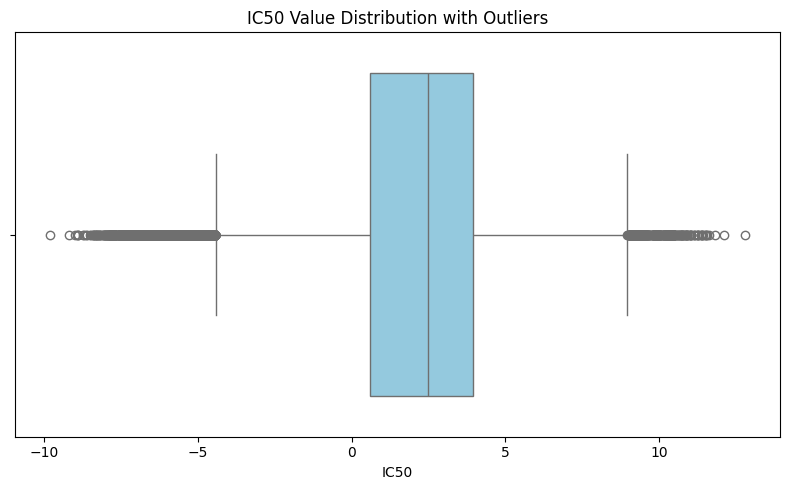

In [9]:
# Wrap arrays into a temporary DataFrame for inspection
df_check = pd.DataFrame({
    'IC50': pd.Series(ic50_values_array_X.flatten())
})

# --- Detect Outliers in IC50 only (since it's numerical and critical) ---
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

ic50_series = df_check['IC50'].dropna()
ic50_outliers = detect_outliers_iqr(ic50_series)

if not ic50_outliers.empty:
    print(f"\nOutliers detected in IC50 values: {len(ic50_outliers)}")
else:
    print("\nNo significant outliers detected in IC50 values.")

percent_outliers = (len(ic50_outliers) / len(ic50_series)) * 100
print(f"Outliers: {len(ic50_outliers)} / {len(ic50_series)} = {percent_outliers:.2f}%")

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=ic50_series, color='skyblue')
plt.title("IC50 Value Distribution with Outliers")
plt.xlabel("IC50")
plt.tight_layout()
plt.savefig("ic50_distribution_with_outliers.png")
plt.show()

Finding thresholds as drug response sensitivity (relative measure only, not standard) for gradio app

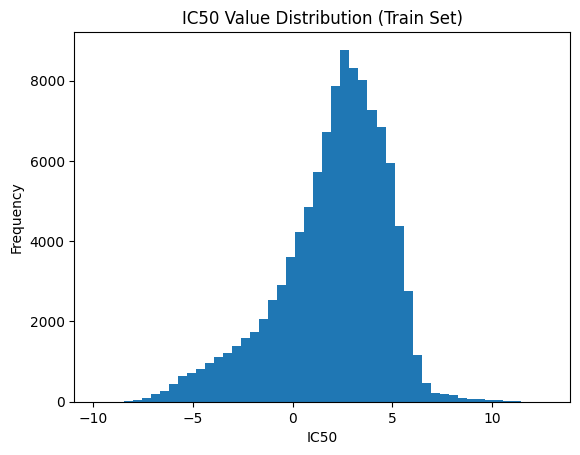

In [10]:
import matplotlib.pyplot as plt
plt.hist(ic50_train_X, bins=50)
plt.title('IC50 Value Distribution (Train Set)')
plt.xlabel('IC50')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Finding thresholds
low_th = np.percentile(ic50_train_X, 33)   # ~ bottom third
high_th = np.percentile(ic50_train_X, 66)  # ~ top third

print(low_th)
print(high_th)

1.3409970328000005
3.3844027788


In [12]:
print("Unique drugs in training set:", len(set(dnm_train_X)))
print("Unique cell lines in training set:", len(set(cl_train_X)))


Unique drugs in training set: 223
Unique cell lines in training set: 695


In [19]:
from collections import Counter
drug_counts = Counter(dnm_train_X)
cell_counts = Counter(cl_train_X)

# Top 10 most common drugs
print("Top 10 most frequent drugs:", drug_counts.most_common(10))


Top 10 most frequent drugs: [('UNC0638', 1035), ('JQ1', 1025), ('AKT inhibitor VIII', 1021), ('Avagacestat', 1016), ('CHIR-99021', 1011), ('Afatinib', 999), ('Bicalutamide', 991), ('PLX-4720', 987), ('AZD6482', 986), ('Refametinib', 971)]


In [15]:
# Basic Statistics of target variable
ic50_series = pd.Series(ic50_train_X)
print(ic50_series.describe())

count    106569.000000
mean          2.018615
std           2.724127
min          -9.826863
25%           0.588649
50%           2.476305
75%           3.939417
max          12.802280
dtype: float64


In [18]:
# Calculating drug and cell coverage across the dataset
from collections import defaultdict
import pandas as pd

df = pd.DataFrame({'drug': dnm_train_X, 'cell_line': cl_train_X})
drug_coverage = df.groupby('drug')['cell_line'].nunique()
cell_coverage = df.groupby('cell_line')['drug'].nunique()


In [20]:
drug_coverage

drug
(5Z)-7-Oxozeaenol    369
5-Fluorouracil       363
681640               329
A-443654             163
A-770041             170
                    ... 
YM201636             366
Z-LLNle-CHO          168
ZM447439             323
ZSTK474              362
Zibotentan           353
Name: cell_line, Length: 223, dtype: int64

In [21]:
cell_coverage

cell_line
1240121    104
1240122    106
1240123    104
1240124     62
1240125    103
          ... 
949093     112
949179     126
971774      69
998184      59
998189     112
Name: drug, Length: 695, dtype: int64

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


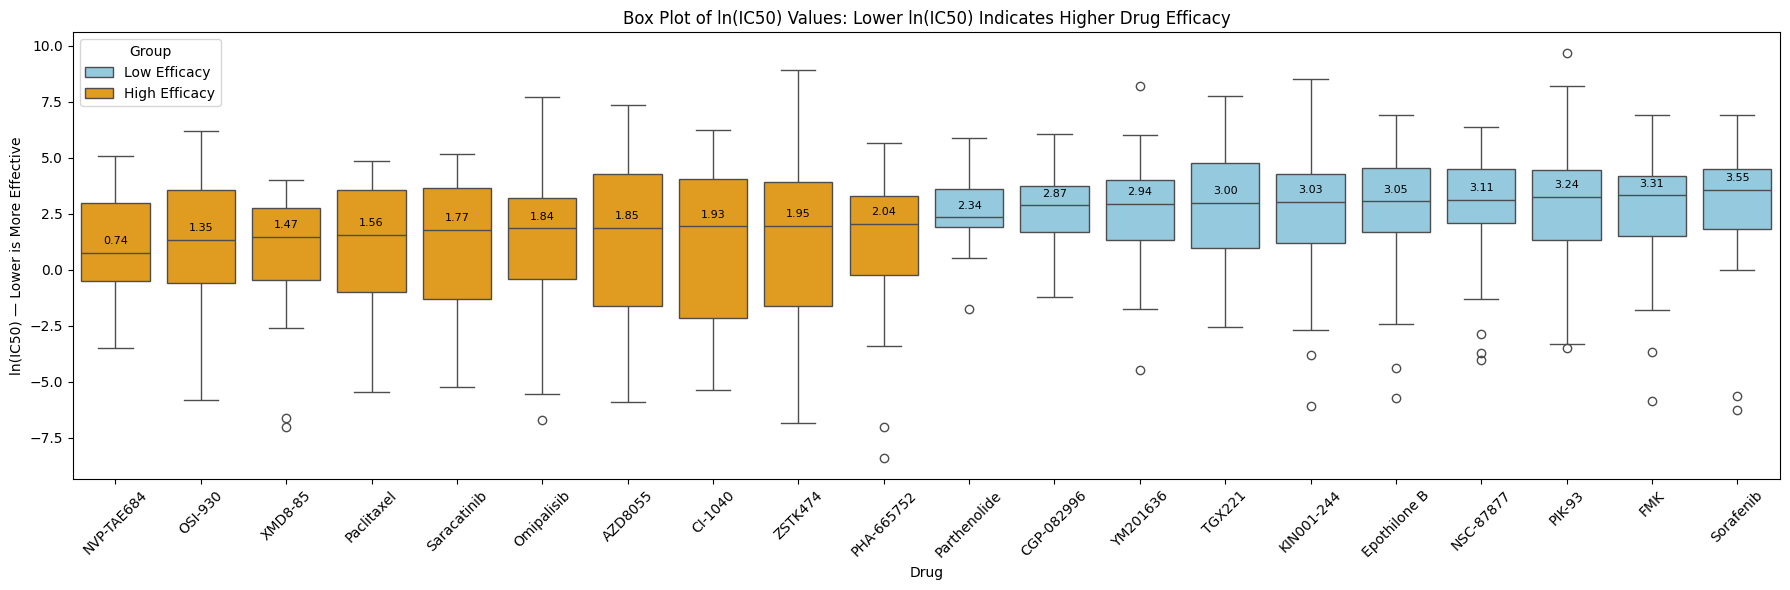

In [23]:
# -------------------------------
# Per-Drug Evaluation Statistics
# -------------------------------
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import pickle

# Load the saved scaler
with open("/content/scaler_ic50.pkl", "rb") as f:
    scaler = pickle.load(f)



def evaluate_per_drug(data_loader, device):

    results = []

    with torch.no_grad():
        for batch in data_loader:
            batch = batch.to(device)
            #x, x_cell, edge_idx, batch_drug, edge_feat = batch.x, batch.target, batch.edge_index.long(), batch.batch, batch.edge_features
            #outputs = model(x,edge_idx, batch_drug,x_cell, edge_feat)

            for i in range(len(batch.y)):
                # Use the mapping to get drug name
                drug_name = batch.drug_name[i] if isinstance(batch.drug_name[i], str) else batch.drug_name[i].item()

                results.append({
                    'drug': drug_name,
                    'true': batch.y[i].item()
                })

    df = pd.DataFrame(results)
    grouped = df.groupby('drug')
    return df

# Evaluate
val_data_loader= DataLoader(val_data, batch_size=32, shuffle=True)
df2 = evaluate_per_drug(val_data_loader, device)

# Step : Inverse transform standardized 'true' values to ln(IC50)
df2['true_raw_ln'] = df2['true'] * scaler.scale_[0] + scaler.mean_[0]

# Step 3: Get mean ln(IC50) per drug
drug_means = df2.groupby('drug')['true_raw_ln'].mean().sort_values()

# Step 4: Select top 10 lowest (high efficacy) and highest (low efficacy) mean IC50 drugs
lowest_drugs = drug_means.head(10).index.tolist()
highest_drugs = drug_means.tail(10).index.tolist()

# Step 5: Filter full df2 for those drugs
top10_low = df2[df2['drug'].isin(lowest_drugs)].copy()
top10_low['group'] = 'High Efficacy'

top10_high = df2[df2['drug'].isin(highest_drugs)].copy()
top10_high['group'] = 'Low Efficacy'

# Step 6: Combine for plotting
top_bottom = pd.concat([top10_high, top10_low])

# Step 7: Sort drugs by median ln(IC50) for consistent x-axis order
drug_order = top_bottom.groupby('drug')['true_raw_ln'].median().sort_values().index

plt.figure(figsize=(18, 6))

# Boxplot with drugs on x-axis (vertical boxplot)
sns.boxplot(
    x='drug', y='true_raw_ln', hue='group', data=top_bottom,
    palette={'High Efficacy': 'orange', 'Low Efficacy': 'skyblue'},
    order=drug_order
)

# Title & axis labels
plt.title('Box Plot of ln(IC50) Values: Lower ln(IC50) Indicates Higher Drug Efficacy')
plt.ylabel('ln(IC50) — Lower is More Effective')
plt.xlabel('Drug')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper left')
plt.tight_layout()

# Annotate means just above the median line
grouped_means = top_bottom.groupby('drug')['true_raw_ln'].median()
for i, drug in enumerate(drug_order):
    y = grouped_means[drug]
    plt.text(i, y + 0.3, f"{y:.2f}", ha='center', va='bottom', fontsize=8)

# Save before plt.show()
plt.savefig('val_boxplot_lnIC50.png', dpi=300, bbox_inches='tight')
plt.show()


#**Step II: Defining the Deep Learning Model**

### **Overview**
This model is a **Graph Convolutional Network (GCN) with Multi-Head Attention**, designed to integrate **molecular graph features** with **gene expression data** for predicting **drug response in cancer cells**.

### **Model Architecture**
The model consists of three main components:
1. **GCN for Drug Feature Extraction**
2. **CNN for Gene Expression Analysis**
3. **Attention-Based Feature Fusion and Prediction**

### **1. Drug Feature Extraction (Graph Neural Network)**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `GCNConv` (1) | Extracts molecular graph features | `in_features=334`, `out_features=334` |
| `GCNConv` (2) | Expands learned features | `in_features=334`, `out_features=668` |
| `GCNConv` (3) | Captures high-level features | `in_features=668`, `out_features=1336` |
| `Global Max Pooling` | Aggregates features | - |

### **2. Gene Expression Feature Extraction (1D CNN)**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `Conv1D` | Extracts spatial gene expression patterns | `in_channels=1`, `out_channels=32`, `kernel_size=8` |
| `MaxPool1D` | Downsamples | `kernel_size=3` |

### **3. Attention-Based Feature Fusion**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `Multi-Head Attention` (1) | Drug attends to Gene Features | `embed_dim=128`, `num_heads=8` |
| `Multi-Head Attention` (2) | Gene Expression attends to Drug Features | `embed_dim=128`, `num_heads=8` |

### **Baseline Model Hyperparameter Selection**
| Hyperparameter | Value | Rationale |
|--------------|--------|-----------|
| **GCN Layers** | 3 | Hierarchical feature learning |
| **Attention Heads** | 8 | Captures diverse feature interactions |
| **Dropout** | 0.5 | Prevents overfitting |

### **Summary**
This model efficiently integrates **drug and gene expression features** using **GCN, CNN, and Attention Mechanisms**, ensuring **high accuracy** in predicting drug response.


## **Implementation**

In [24]:
class DrugResponseModel(torch.nn.Module):
    def __init__(self, output_size=1, conv_filters=32, embedding_dim=128, drug_feat_dim=334, output_dim=128, dropout_rate=0.5):  # qwe

        super(DrugResponseModel, self).__init__()

        self.output_size = output_size

        # Graph Convolutional Network layers for drug SMILES representation
        self.gcn_layer1 = GCNConv(drug_feat_dim, drug_feat_dim)
        self.gcn_layer2 = GCNConv(drug_feat_dim, drug_feat_dim*2)
        self.gcn_layer3 = GCNConv(drug_feat_dim*2, drug_feat_dim * 4)

        self.fc_gcn1 = torch.nn.Linear(drug_feat_dim*4, 1024)
        self.fc_gcn2 = torch.nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

        # 1D CNN layers for cell line feature extraction
        self.cell_conv1 = nn.Conv1d(
            in_channels=1, out_channels=conv_filters, kernel_size=8)
        self.cell_pool1 = nn.MaxPool1d(3)

        self.cell_conv2 = nn.Conv1d(
            in_channels=conv_filters, out_channels=conv_filters*2, kernel_size=8)
        self.cell_pool2 = nn.MaxPool1d(3)

        self.cell_conv3 = nn.Conv1d(
            in_channels=conv_filters*2, out_channels=conv_filters*4, kernel_size=8)
        self.cell_pool3 = nn.MaxPool1d(3)

        self.fc_cell = nn.Linear(4096, output_dim)

        # Cross-attention layers to fuse drug and cell features
        self.cross_attention1 = nn.MultiheadAttention(output_dim, num_heads=8, dropout=dropout_rate)
        self.cross_attention2 = nn.MultiheadAttention(output_dim, num_heads=8, dropout=dropout_rate)

        self.norm_attn1 = nn.LayerNorm(output_dim)
        self.norm_attn2 = nn.LayerNorm(output_dim)

        # Fully connected layers for final prediction
        self.fc_combined = nn.Linear(2*output_dim, 128)
        self.output_layer = nn.Linear(128, self.output_size)

    def forward(self, x, edge_idx, batch, cell_x, edge_weight=None):

        # GCN branch for drug input
        x = self.gcn_layer1(x, edge_idx, edge_weight)
        x = self.relu(x)

        x = self.gcn_layer2(x, edge_idx, edge_weight)
        x = self.relu(x)

        x = self.gcn_layer3(x, edge_idx, edge_weight)
        x = self.relu(x)

        # Global Max Pooling across graph nodes
        x = gmp(x, batch)

        # Fully connected layers for drug features
        x = self.relu(self.fc_gcn1(x))
        x = self.dropout(x)
        x = self.fc_gcn2(x)
        x = self.dropout(x)


        # 1D CNN branch for cell line features
        cell_feat = self.cell_conv1(cell_x)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool1(cell_feat)

        cell_feat = self.cell_conv2(cell_feat)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool2(cell_feat)

        cell_feat = self.cell_conv3(cell_feat)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool3(cell_feat)

        # Flatten and apply fully connected layer
        xt = cell_feat.view(-1, cell_feat.shape[1] * cell_feat.shape[2])
        xt = self.fc_cell(xt)

        # Cross-attention mechanism
        attn_out1, _ = self.cross_attention1(x, xt, xt)
        attn_out1 = attn_out1 + x
        attn_out1 = self.norm_attn1(attn_out1)

        attn_out2, _ = self.cross_attention2(xt, x, x)
        attn_out2 = attn_out2 + xt
        attn_out2 = self.norm_attn2(attn_out2)

        # Concatenate and classify
        combined = torch.cat((attn_out1, attn_out2), 1)
        combined = self.relu(combined)
        combined = self.dropout(combined)

        combined = self.fc_combined(combined)
        combined = self.relu(combined)
        combined = self.dropout(combined)

        output = self.output_layer(combined)
        # No activation function as it is regression problem

        return output

# **Step III: Training and Fine-Tuning the Model**

## **Model Training & Fine-Tuning**

### **Overview**
The training phase was carefully designed to optimise drug response prediction using IC50 values. Multiple configurations were systematically explored, including variations in optimizers, learning rates, and loss functions. The objective was to maximize predictive accuracy while ensuring model stability and generalization.

---
### **Training Pipeline Design**

The training pipeline was implemented with modularity and flexibility in mind, allowing different combinations of loss functions, optimizers, and learning rates to be tested efficiently.

-  Custom training loop allowed dynamic injection of optimizers and loss functions.
-  Early stopping was used to prevent overfitting based on validation loss.
-  Model checkpoints were saved for each run.
-  Loss curves and performance metrics were logged for comparison.
- Training was divided into 2 main parts
      i. Baseline Model Training (DrugResponseModel and DrugResponseModel_v2)
      ii. Fine-tuning to get the best Hyperparameters

#### **Training Logs Captured**
- Epoch-wise training and validation loss
- Pearson and Spearman correlation coefficients
- R² score and RMSE
- Output visualizations: `loss.png`, `pearson.png`
- Result files: CSV summaries named using the format `optimizer_loss_lr_runID_dataset.csv`

---

### **Evaluation Metrics Tracked**

| Metric       | Purpose |
|--------------|---------|
| **MSE**      | Measures squared error between predicted and actual IC50 values |
| **RMSE**     | Square root of MSE; provides scale-interpretable error |
| **Pearson**  | Measures linear correlation between predictions and targets |
| **Spearman** | Measures monotonic relationship between rankings |
| **R² Score** | Explains variance captured by the model's predictions |

---




### **Hyperparameter Tuning Strategy**

The model chosen for hyperparameter tuning was `DrugResponseModel` due to its slightly better performance in terms of lower MSE for validation data.

#### **Optimisers Explored**
1. Adam
2. AdamW
3. RMSProp
4. RAdam

#### **Loss-Functions Explored**
1. MSELoss
2. SmoothL1Loss
3. HuberLoss(delta=0.5)


#### **Learning Rates Tested**
- `1e-4`
- `5e-4`

#### **Batch Sizes**
- Tuned manually (batch size= 32) and kept constant across most experiments for consistency.

---



### **Results Logging & Selection**

Each hyperparameter tuning run was tracked meticulously. For every configuration tested (optimizer + loss function + learning rate), the following actions were taken:

- Results were logged in CSV files with clear naming conventions
- Training and validation metrics were plotted and saved
- Best performing run was selected based on **lowest validation MSE** and **highest Pearson correlation**

---

### **Summary of Tuning Results**


Below is a ranked summary of the top-performing configurations based on **validation MSE**:

 ### Sorted Hyperparameter Results

| Rank | Optimiser | Loss Function | Learning Rate | Best MSE       | Pearson  | Spearman |
|------|-----------|----------------|----------------|----------------|----------|----------|
| 1    | RAdam     | MSELoss        | 0.0001         | 0.9999994      | 0.008003 | 0.007746 |
| 2    | AdamW     | MSELoss        | 0.0001         | 0.99999946     | 0.005534 | 0.002337 |
| 3    | Adam (baseline)  | MSELoss              | 0.0001             | 0.9999999      | 0.001007 | 0.008489 |
| 4    | Adam      | MSELoss        | 0.0001         | 1.0000000      | 0.000476 | 0.001940 |
| 5    | RAdam     | MSELoss        | 0.0005         | 1.0000001      | -0.001665| -0.000339|
| 6    | Adam      | MSELoss        | 0.0005         | 1.0000005      | 0.002622 | 0.004783 |
| 7    | RMSprop   | MSELoss        | 0.0005         | 1.0000005      | NaN      | NaN      |
| 8    | AdamW     | MSELoss        | 0.0005         | 1.0000018      | -0.005457| -0.006069|
| 9    | RMSprop   | MSELoss        | 0.0001         | 1.0000056      | 0.002553 | -0.001235|
| 10   | RMSprop   | SmoothL1Loss   | 0.0001         | 1.0035968      | 0.001340 | 0.004555 |

**Best Configuration** 🏆  
→ **Run:** RAdam  
→ **Loss:** MSELoss  
→ **Learning Rate:** 0.0001  
→ **MSE:** 0.9999994  
→ **Pearson:** 0.008003  
→ **Spearman:** 0.007746


> ⚠️ **Note:** Pearson and Spearman values sometimes result in `NaN`.  
> This occurs due to **extremely low variance in IC50 values**, where the **standard deviation is nearly zero**, making correlation metrics undefined.

>
>  **What are IC50 values?**
>
> IC50 (half maximal inhibitory concentration) represents the concentration of a drug required to inhibit a biological process by 50%. In datasets like **GDSC**, **CCLE**, or **NCI60**, IC50 values are typically:
>
> - **Log-transformed** (e.g., log(IC50) or -log10(IC50))
>
>
> These preprocessing steps often compress the range of IC50 values, resulting in **low variance**.
>
>
>
> **Implications of Low IC50 Variance**
>
>
> - **Pearson/Spearman** may return **NaN**
> - **R2 Score**  becomes unreliable


## **Implementation**

Training - Baseline Model

In [25]:
#Setting Folder information

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

save_name = 'baseline'
branch = 'root_1'
branch_folder = "root_folder/" + branch
result_folder = branch_folder + "/results/"
model_folder = branch_folder + '/models/'
os.makedirs(result_folder, exist_ok=True)
os.makedirs(model_folder, exist_ok=True)

In [26]:
#Setting Parameters for baseline training


modeling = DrugResponseModel
train_batch = 32
val_batch = 32
test_batch = 32

lr = 1e-4 # 1e-4 baseline
num_epoch = 30
log_interval = 20
cuda_name = 'cuda'


d_feat_size = train_data[0].x.shape[1]
print(f"Detected input feature size: {d_feat_size}")


Detected input feature size: 78


In [27]:
def print_initial_info(lr, num_epoch, modeling, dataset='Data'):
    print('Learning rate:', lr)
    print('Epochs:', num_epoch)
    print('\nrunning on', f"{modeling.__name__}_{dataset}")


def prepare_data_files(br_fol, dataset):
    processed_files = {
        "train": f"{br_fol}/processed/{dataset}_train_set.pt",
        "val": f"{br_fol}/processed/{dataset}_val_set.pt"
    }
    for file in processed_files.values():
        if not os.path.isfile(file):
            print('Please run create_data.py to prepare data in PyTorch format!')
            return None
    return processed_files


def load_datasets(br_fol, dataset):
    return {
        "train": DrugGeneDataset(root=br_fol, dataset_name=f"{dataset}_train_set"),
        "val": DrugGeneDataset(root=br_fol, dataset_name=f"{dataset}_val_set"),
    }


def get_data_loaders(datasets, batch_sizes):
    return {
        "train": DataLoader(datasets["train"], batch_size=batch_sizes["train"], shuffle=True),
        "val": DataLoader(datasets["val"], batch_size=batch_sizes["val"], shuffle=False),
    }


def train_and_evaluate_model(
        modeling, data_loaders, device, num_epoch, optimizer_params, log_interval,
        model_folder, result_folder, save_name, do_save, dataset="Data"
):
    """
    Orchestrates model training, evaluation, logging, and saving.

    Args:
        modeling: Model class to instantiate.
        data_loaders: Dictionary of train/val/test DataLoaders.
        device: 'cuda' or 'cpu'.
        num_epoch: Number of training epochs.
        optimizer_params: Dict of optimizer hyperparameters (e.g., lr).
        log_interval: Interval for logging (unused).
        model_folder: Folder to save model weights.
        result_folder: Folder to save results.
        save_name: Name prefix for saved files.
        do_save: Bool flag whether to save model/results.
        dataset: Dataset name

    Returns:
        None
    """
    model = modeling(drug_feat_dim=d_feat_size).to(device)
    optimizer = torch.optim.Adam(model.parameters(), **optimizer_params)
    best_mse, best_pearson, best_epoch = float('inf'), float('-inf'), -1
    train_losses, val_losses, val_pearsons = [], [], []
    total_time = 0
    early_stopping_patience = 5  # Number of epochs with no improvement after which training will stop
    no_improve_epochs = 0  # Counter for early stopping


    for epoch in range(num_epoch):
        start_time = time.time()
        print(f"Epoch: {epoch + 1}/{num_epoch}")

        # NVIDIA SMI monitoring
        nvidia_smi.nvmlInit()
        device_count = nvidia_smi.nvmlDeviceGetCount()
        for i in range(device_count):
            handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
            info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
            # Optionally: print available GPU memory
        nvidia_smi.nvmlShutdown()

        # Training and evaluation
        train_loss = train(model, device, data_loaders["train"], optimizer, epoch + 1, log_interval)
        val_metrics = predicting_and_evaluate(model, device, data_loaders["val"])

        # Record performance
        train_losses.append(train_loss)
        val_losses.append(val_metrics["mse"])
        val_pearsons.append(val_metrics["pearson"])

        # Update best model
        if val_metrics["mse"] < best_mse:
            if do_save:
                save_model_and_results(model, model_folder, result_folder, save_name, dataset, val_metrics)
            best_epoch, best_mse, best_pearson = epoch + 1, val_metrics["mse"], val_metrics["pearson"]
            no_improve_epochs = 0  # Reset the counter if improvement
            print(f"Improved: Epoch {best_epoch}, Best MSE: {best_mse}")
        else:
            no_improve_epochs += 1  # Increment the counter if no improvement
            if no_improve_epochs >= early_stopping_patience:
                print(f"Early stopping triggered. No improvement in {early_stopping_patience} epochs.")
                break
            print(f"No improvement: Best Epoch {best_epoch}, Best MSE: {best_mse}")

        # Time estimates
        total_time += time.time() - start_time
        est_remaining_time = (num_epoch - epoch - 1) * total_time / (epoch + 1)
        print_time_estimate(epoch + 1, est_remaining_time)

    # Visualization
    plot_training_and_test_loss(train_losses, val_losses, f"Loss_plot_{save_name}")



def train(model, device, train_loader, optimizer, epoch, log_interval):
    """
    Trains the model for one epoch using the training DataLoader.

    Args:
        model: The neural network model.
        device: 'cuda' or 'cpu'.
        train_loader: DataLoader for training data.
        optimizer: Optimizer instance (Adam, RMSProp, etc.).
        epoch: Current epoch number (for logging).
        log_interval: Frequency of logging (not used currently).

    Returns:
        Average training loss for the epoch.
    """
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()

    #nn.MSELoss()
    #loss_fn = nn.HuberLoss(delta=0.5) #done for getting best model

    avg_loss = []
    for data in tqdm(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        x, x_cell, edge_idx, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features

        output = model(x, edge_idx, batch_drug, x_cell, edge_feat)

        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())

    return sum(avg_loss)/len(avg_loss)


def predicting_and_evaluate(model, device, data_loader):
    """
    Performs prediction on a dataset and computes evaluation metrics.

    Args:
        model: Trained model.
        device: 'cuda' or 'cpu'.
        data_loader: DataLoader for validation or test.

    Returns:
        Dictionary containing rmse, mse, pearson, spearman and r2 scores.
    """
    predictions, ground_truth = predict(model, device, data_loader)
    return {
        "rmse": compute_rmse(ground_truth, predictions),
        "mse": compute_mse(ground_truth, predictions),
        "pearson": compute_pearson_correlation(ground_truth, predictions),
        "spearman": compute_spearman_correlation(ground_truth, predictions)
    }

def predict(model, device, loader):
    """
    Performs inference using the trained model on the given DataLoader.

    Args:
        model: Trained PyTorch model.
        device: 'cuda' or 'cpu'.
        loader: DataLoader for validation or test data.

    Returns:
        Tuple of (ground truth labels, predicted values) as flattened NumPy arrays.
    """
    model.eval()
    total_predictions = torch.Tensor()
    total_labels = torch.Tensor()
    print(f" Making predictions for {len(loader.dataset)} samples...")

    with torch.no_grad():
        for data in loader:
            data = data.to(device)

            x, x_cell, edge_idx, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features

            output = model(x, edge_idx, batch_drug, x_cell, edge_feat)

            total_predictions = torch.cat((total_predictions, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    torch.cuda.empty_cache()

    return total_labels.numpy().flatten(), total_predictions.numpy().flatten()



def compute_rmse(y_true, y_pred):
    """Compute Root Mean Squared Error."""
    return sqrt(((y_true - y_pred)**2).mean(axis=0))


def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error."""
    return ((y_true - y_pred)**2).mean(axis=0)


def compute_pearson_correlation(y_true, y_pred):
    """Compute Pearson correlation coefficient."""
    return np.corrcoef(y_true, y_pred)[0, 1]


def compute_spearman_correlation(y_true, y_pred):
    """Compute Spearman rank correlation coefficient."""
    return stats.spearmanr(y_true, y_pred)[0]


def compute_r2_score(y_true, y_pred):
    """Compute coefficient of determination (R² score)."""
    return r2_score(y_true, y_pred)


def plot_training_and_test_loss(train_losses, test_losses, title):
    """Plot training and test loss curves across epochs."""
    plt.figure()
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{title}.png", dpi=300)


def print_time_estimate(epoch, remaining_time):
    hours, minutes, seconds = int(remaining_time // 3600), int((remaining_time // 60) % 60), int(remaining_time % 60)
    print(f"End of Epoch {epoch}; {hours} hours, {minutes} minutes, and {seconds} seconds remaining")


def save_model_and_results(model, model_folder, result_folder, save_name, dataset, val_metrics):
    model_file_name = f"model_{save_name}_{dataset}.model"
    result_file_name = f"result_{save_name}_{dataset}.csv"
    torch.save(model.state_dict(), f"{model_folder}/{model_file_name}")
    with open(f"{result_folder}/val_{result_file_name}", 'w') as f:
        f.write(','.join(map(str, val_metrics.values())))

In [28]:
def baseline_training(
        modeling, train_batch, val_batch, lr, num_epoch, log_interval,
        cuda_name, branch_dir, result_folder, model_folder, save_name, do_save=True
):
    print_initial_info(lr, num_epoch, modeling)
    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")

    # Prepare and load data
    processed_files = prepare_data_files(branch_dir, dataset="Data")
    if not processed_files:
        return

    datasets = load_datasets(branch_dir, dataset="Data")
    batch_sizes = {"train": train_batch, "val": val_batch}
    data_loaders = get_data_loaders(datasets, batch_sizes)

    # Train and evaluate model
    train_and_evaluate_model(
        modeling=modeling, data_loaders=data_loaders, device=device, num_epoch=num_epoch,
        optimizer_params={"lr": lr}, log_interval=log_interval,
        model_folder=model_folder, result_folder=result_folder,
        save_name=save_name, do_save=do_save
    )


branch_folder = root_folder/root_1
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1/30
Training on 106569 samples...


  0%|          | 0/3331 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 3331/3331 [01:10<00:00, 47.01it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0024161338806152
End of Epoch 1; 0 hours, 37 minutes, and 58 seconds remaining
Epoch: 2/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.95it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0001832246780396
End of Epoch 2; 0 hours, 31 minutes, and 45 seconds remaining
Epoch: 3/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.21it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0001832246780396
End of Epoch 3; 0 hours, 29 minutes, and 0 seconds remaining
Epoch: 4/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.73it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0001832246780396
End of Epoch 4; 0 hours, 27 minutes, and 12 seconds remaining
Epoch: 5/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.27it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 1.0000804662704468
End of Epoch 5; 0 hours, 25 minutes, and 46 seconds remaining
Epoch: 6/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 60.90it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 1.0000312328338623
End of Epoch 6; 0 hours, 24 minutes, and 31 seconds remaining
Epoch: 7/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 60.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000312328338623
End of Epoch 7; 0 hours, 23 minutes, and 21 seconds remaining
Epoch: 8/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.02it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000312328338623
End of Epoch 8; 0 hours, 22 minutes, and 13 seconds remaining
Epoch: 9/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.52it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000312328338623
End of Epoch 9; 0 hours, 21 minutes, and 6 seconds remaining
Epoch: 10/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.11it/s]


 Making predictions for 13322 samples...
Improved: Epoch 10, Best MSE: 1.0000011920928955
End of Epoch 10; 0 hours, 20 minutes, and 0 seconds remaining
Epoch: 11/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.19it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 1.0000011920928955
End of Epoch 11; 0 hours, 18 minutes, and 55 seconds remaining
Epoch: 12/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.09it/s]


 Making predictions for 13322 samples...
Improved: Epoch 12, Best MSE: 0.9999998807907104
End of Epoch 12; 0 hours, 17 minutes, and 52 seconds remaining
Epoch: 13/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.03it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 0.9999998807907104
End of Epoch 13; 0 hours, 16 minutes, and 50 seconds remaining
Epoch: 14/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.05it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 0.9999998807907104
End of Epoch 14; 0 hours, 15 minutes, and 48 seconds remaining
Epoch: 15/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.26it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 0.9999998807907104
End of Epoch 15; 0 hours, 14 minutes, and 47 seconds remaining
Epoch: 16/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.04it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 0.9999998807907104
End of Epoch 16; 0 hours, 13 minutes, and 46 seconds remaining
Epoch: 17/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.93it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


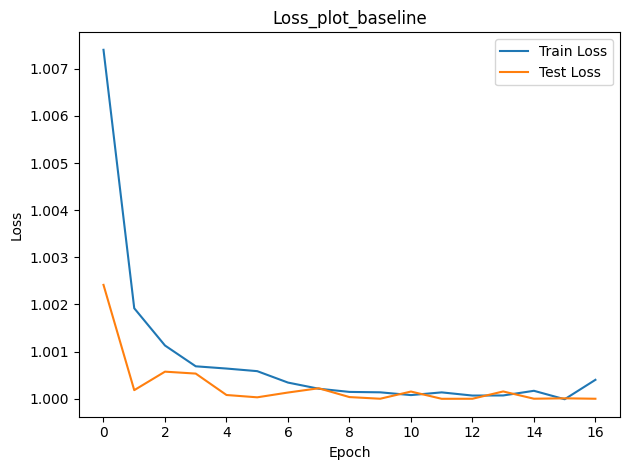

In [96]:
print(f"branch_folder = {branch_folder}")
baseline_training(modeling, train_batch, val_batch, lr, num_epoch, log_interval, cuda_name,
        branch_dir=branch_folder, result_folder=result_folder, model_folder=model_folder,
        save_name=save_name,do_save=True)

Fine-Tuning Model: To find the best hyperparameter configurations

In [33]:
# Model for further finetuning

modeling = DrugResponseModel


===== Run 1: Adam + MSELoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1/30
[Adam/MSELoss] Training on 106569 samples...


  0%|          | 0/3331 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 3331/3331 [01:17<00:00, 43.17it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0001813173294067
End of Epoch 1; 0 hours, 40 minutes, and 6 seconds remaining
Epoch: 2/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.70it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0001813173294067
End of Epoch 2; 0 hours, 34 minutes, and 30 seconds remaining
Epoch: 3/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.01it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0001813173294067
End of Epoch 3; 0 hours, 31 minutes, and 52 seconds remaining
Epoch: 4/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.02it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 1.000083327293396
End of Epoch 4; 0 hours, 30 minutes, and 0 seconds remaining
Epoch: 5/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.000083327293396
End of Epoch 5; 0 hours, 28 minutes, and 28 seconds remaining
Epoch: 6/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 56.39it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 1.00007963180542
End of Epoch 6; 0 hours, 26 minutes, and 57 seconds remaining
Epoch: 7/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.64it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.00007963180542
End of Epoch 7; 0 hours, 25 minutes, and 39 seconds remaining
Epoch: 8/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.83it/s]


 Making predictions for 13322 samples...
Improved: Epoch 8, Best MSE: 1.000000238418579
End of Epoch 8; 0 hours, 24 minutes, and 26 seconds remaining
Epoch: 9/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 8, Best MSE: 1.000000238418579
End of Epoch 9; 0 hours, 23 minutes, and 15 seconds remaining
Epoch: 10/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.70it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 8, Best MSE: 1.000000238418579
End of Epoch 10; 0 hours, 22 minutes, and 5 seconds remaining
Epoch: 11/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.81it/s]


 Making predictions for 13322 samples...
Improved: Epoch 11, Best MSE: 1.0
End of Epoch 11; 0 hours, 20 minutes, and 56 seconds remaining
Epoch: 12/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.93it/s]


 Making predictions for 13322 samples...


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-98-f913af03fd4a>:220: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return stats.spearmanr(y_true, y_pred)[0]


No improvement: Best Epoch 11, Best MSE: 1.0
End of Epoch 12; 0 hours, 19 minutes, and 48 seconds remaining
Epoch: 13/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.77it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 11, Best MSE: 1.0
End of Epoch 13; 0 hours, 18 minutes, and 40 seconds remaining
Epoch: 14/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.75it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 11, Best MSE: 1.0
End of Epoch 14; 0 hours, 17 minutes, and 33 seconds remaining
Epoch: 15/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.18it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 11, Best MSE: 1.0
End of Epoch 15; 0 hours, 16 minutes, and 26 seconds remaining
Epoch: 16/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.79it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 2: Adam + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:13<00:00, 45.07it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.000077724456787
End of Epoch 1; 0 hours, 38 minutes, and 34 seconds remaining
Epoch: 2/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0000183582305908
End of Epoch 2; 0 hours, 33 minutes, and 46 seconds remaining
Epoch: 3/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.58it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.000016689300537
End of Epoch 3; 0 hours, 31 minutes, and 28 seconds remaining
Epoch: 4/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.000016689300537
End of Epoch 4; 0 hours, 29 minutes, and 44 seconds remaining
Epoch: 5/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 1.0000159740447998
End of Epoch 5; 0 hours, 28 minutes, and 16 seconds remaining
Epoch: 6/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.83it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 1.0000004768371582
End of Epoch 6; 0 hours, 26 minutes, and 55 seconds remaining
Epoch: 7/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.70it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000004768371582
End of Epoch 7; 0 hours, 25 minutes, and 40 seconds remaining
Epoch: 8/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.76it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000004768371582
End of Epoch 8; 0 hours, 24 minutes, and 27 seconds remaining
Epoch: 9/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.74it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000004768371582
End of Epoch 9; 0 hours, 23 minutes, and 16 seconds remaining
Epoch: 10/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000004768371582
End of Epoch 10; 0 hours, 22 minutes, and 6 seconds remaining
Epoch: 11/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.98it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 3: Adam + SmoothL1Loss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.42it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.004517912864685
End of Epoch 1; 0 hours, 40 minutes, and 45 seconds remaining
Epoch: 2/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 57.30it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.004517912864685
End of Epoch 2; 0 hours, 34 minutes, and 7 seconds remaining
Epoch: 3/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:56<00:00, 59.12it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.004517912864685
End of Epoch 3; 0 hours, 30 minutes, and 56 seconds remaining
Epoch: 4/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.90it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.004517912864685
End of Epoch 4; 0 hours, 29 minutes, and 15 seconds remaining
Epoch: 5/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.004517912864685
End of Epoch 5; 0 hours, 27 minutes, and 54 seconds remaining
Epoch: 6/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.68it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 4: Adam + SmoothL1Loss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.37it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0086939334869385
End of Epoch 1; 0 hours, 40 minutes, and 49 seconds remaining
Epoch: 2/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.81it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.00766921043396
End of Epoch 2; 0 hours, 34 minutes, and 50 seconds remaining
Epoch: 3/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.59it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.00766921043396
End of Epoch 3; 0 hours, 32 minutes, and 9 seconds remaining
Epoch: 4/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.71it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.00766921043396
End of Epoch 4; 0 hours, 30 minutes, and 15 seconds remaining
Epoch: 5/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.11it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.00766921043396
End of Epoch 5; 0 hours, 28 minutes, and 38 seconds remaining
Epoch: 6/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.00766921043396
End of Epoch 6; 0 hours, 27 minutes, and 13 seconds remaining
Epoch: 7/30
[Adam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.00it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 5: Adam + HuberLoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.29it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0108733177185059
End of Epoch 1; 0 hours, 40 minutes, and 53 seconds remaining
Epoch: 2/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.77it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0108733177185059
End of Epoch 2; 0 hours, 34 minutes, and 52 seconds remaining
Epoch: 3/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.59it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0108733177185059
End of Epoch 3; 0 hours, 32 minutes, and 10 seconds remaining
Epoch: 4/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.47it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0108733177185059
End of Epoch 4; 0 hours, 30 minutes, and 18 seconds remaining
Epoch: 5/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0108733177185059
End of Epoch 5; 0 hours, 28 minutes, and 42 seconds remaining
Epoch: 6/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.69it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 6: Adam + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.40it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0193133354187012
End of Epoch 1; 0 hours, 40 minutes, and 47 seconds remaining
Epoch: 2/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.23it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0189608335494995
End of Epoch 2; 0 hours, 34 minutes, and 42 seconds remaining
Epoch: 3/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 56.74it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0189608335494995
End of Epoch 3; 0 hours, 31 minutes, and 43 seconds remaining
Epoch: 4/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.86it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0189608335494995
End of Epoch 4; 0 hours, 29 minutes, and 55 seconds remaining
Epoch: 5/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.00it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0189608335494995
End of Epoch 5; 0 hours, 28 minutes, and 23 seconds remaining
Epoch: 6/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.68it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0189608335494995
End of Epoch 6; 0 hours, 27 minutes, and 3 seconds remaining
Epoch: 7/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.86it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 7: RMSprop + MSELoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:19<00:00, 42.01it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0001143217086792
End of Epoch 1; 0 hours, 41 minutes, and 9 seconds remaining
Epoch: 2/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.93it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0000056028366089
End of Epoch 2; 0 hours, 34 minutes, and 57 seconds remaining
Epoch: 3/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:57<00:00, 58.21it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0000056028366089
End of Epoch 3; 0 hours, 31 minutes, and 37 seconds remaining
Epoch: 4/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 56.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0000056028366089
End of Epoch 4; 0 hours, 29 minutes, and 36 seconds remaining
Epoch: 5/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.80it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0000056028366089
End of Epoch 5; 0 hours, 28 minutes, and 10 seconds remaining
Epoch: 6/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.65it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0000056028366089
End of Epoch 6; 0 hours, 26 minutes, and 52 seconds remaining
Epoch: 7/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.59it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 8: RMSprop + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:19<00:00, 42.12it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0000324249267578
End of Epoch 1; 0 hours, 41 minutes, and 1 seconds remaining
Epoch: 2/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.86it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0000324249267578
End of Epoch 2; 0 hours, 34 minutes, and 54 seconds remaining
Epoch: 3/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.73it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.000017523765564
End of Epoch 3; 0 hours, 32 minutes, and 10 seconds remaining
Epoch: 4/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.18it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 1.0000040531158447
End of Epoch 4; 0 hours, 30 minutes, and 20 seconds remaining
Epoch: 5/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.08it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000040531158447
End of Epoch 5; 0 hours, 28 minutes, and 48 seconds remaining
Epoch: 6/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.26it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000040531158447
End of Epoch 6; 0 hours, 27 minutes, and 24 seconds remaining
Epoch: 7/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.38it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000040531158447
End of Epoch 7; 0 hours, 26 minutes, and 5 seconds remaining
Epoch: 8/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.63it/s]


 Making predictions for 13322 samples...
Improved: Epoch 8, Best MSE: 1.000002145767212
End of Epoch 8; 0 hours, 24 minutes, and 49 seconds remaining
Epoch: 9/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.46it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 8, Best MSE: 1.000002145767212
End of Epoch 9; 0 hours, 23 minutes, and 35 seconds remaining
Epoch: 10/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.47it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 8, Best MSE: 1.000002145767212
End of Epoch 10; 0 hours, 22 minutes, and 23 seconds remaining
Epoch: 11/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.43it/s]


 Making predictions for 13322 samples...
Improved: Epoch 11, Best MSE: 1.0000016689300537
End of Epoch 11; 0 hours, 21 minutes, and 13 seconds remaining
Epoch: 12/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.73it/s]


 Making predictions for 13322 samples...
Improved: Epoch 12, Best MSE: 1.0000004768371582
End of Epoch 12; 0 hours, 20 minutes, and 3 seconds remaining
Epoch: 13/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.72it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 1.0000004768371582
End of Epoch 13; 0 hours, 18 minutes, and 53 seconds remaining
Epoch: 14/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 57.21it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 1.0000004768371582
End of Epoch 14; 0 hours, 17 minutes, and 41 seconds remaining
Epoch: 15/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.62it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 1.0000004768371582
End of Epoch 15; 0 hours, 16 minutes, and 34 seconds remaining
Epoch: 16/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.84it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 12, Best MSE: 1.0000004768371582
End of Epoch 16; 0 hours, 15 minutes, and 26 seconds remaining
Epoch: 17/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.80it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 9: RMSprop + SmoothL1Loss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:20<00:00, 41.43it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0035967826843262
End of Epoch 1; 0 hours, 41 minutes, and 39 seconds remaining
Epoch: 2/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0035967826843262
End of Epoch 2; 0 hours, 35 minutes, and 12 seconds remaining
Epoch: 3/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.62it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0035967826843262
End of Epoch 3; 0 hours, 32 minutes, and 22 seconds remaining
Epoch: 4/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 56.14it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0035967826843262
End of Epoch 4; 0 hours, 30 minutes, and 13 seconds remaining
Epoch: 5/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.84it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0035967826843262
End of Epoch 5; 0 hours, 28 minutes, and 33 seconds remaining
Epoch: 6/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.47it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 10: RMSprop + SmoothL1Loss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.27it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.014113426208496
End of Epoch 1; 0 hours, 40 minutes, and 55 seconds remaining
Epoch: 2/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.80it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0108214616775513
End of Epoch 2; 0 hours, 34 minutes, and 52 seconds remaining
Epoch: 3/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0108214616775513
End of Epoch 3; 0 hours, 32 minutes, and 9 seconds remaining
Epoch: 4/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.74it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0108214616775513
End of Epoch 4; 0 hours, 30 minutes, and 15 seconds remaining
Epoch: 5/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.01it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0108214616775513
End of Epoch 5; 0 hours, 28 minutes, and 39 seconds remaining
Epoch: 6/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0108214616775513
End of Epoch 6; 0 hours, 27 minutes, and 14 seconds remaining
Epoch: 7/30
[RMSprop/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 56.94it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 11: RMSprop + HuberLoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.21it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0215213298797607
End of Epoch 1; 0 hours, 40 minutes, and 57 seconds remaining
Epoch: 2/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.65it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0165276527404785
End of Epoch 2; 0 hours, 34 minutes, and 55 seconds remaining
Epoch: 3/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.53it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0165276527404785
End of Epoch 3; 0 hours, 32 minutes, and 0 seconds remaining
Epoch: 4/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 56.12it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0165276527404785
End of Epoch 4; 0 hours, 29 minutes, and 59 seconds remaining
Epoch: 5/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0165276527404785
End of Epoch 5; 0 hours, 28 minutes, and 27 seconds remaining
Epoch: 6/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.75it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0165276527404785
End of Epoch 6; 0 hours, 27 minutes, and 5 seconds remaining
Epoch: 7/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.92it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 12: RMSprop + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.46it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.014957308769226
End of Epoch 1; 0 hours, 41 minutes, and 54 seconds remaining
Epoch: 2/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 57.17it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.014957308769226
End of Epoch 2; 0 hours, 34 minutes, and 42 seconds remaining
Epoch: 3/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:56<00:00, 59.38it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.0147470235824585
End of Epoch 3; 0 hours, 31 minutes, and 17 seconds remaining
Epoch: 4/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.84it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0147470235824585
End of Epoch 4; 0 hours, 29 minutes, and 36 seconds remaining
Epoch: 5/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.79it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0147470235824585
End of Epoch 5; 0 hours, 28 minutes, and 10 seconds remaining
Epoch: 6/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0147470235824585
End of Epoch 6; 0 hours, 26 minutes, and 51 seconds remaining
Epoch: 7/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0147470235824585
End of Epoch 7; 0 hours, 25 minutes, and 36 seconds remaining
Epoch: 8/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 13: AdamW + MSELoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.55it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0003958940505981
End of Epoch 1; 0 hours, 41 minutes, and 31 seconds remaining
Epoch: 2/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0001853704452515
End of Epoch 2; 0 hours, 35 minutes, and 10 seconds remaining
Epoch: 3/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.07it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.0001554489135742
End of Epoch 3; 0 hours, 32 minutes, and 16 seconds remaining
Epoch: 4/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.84it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 1.0000847578048706
End of Epoch 4; 0 hours, 30 minutes, and 19 seconds remaining
Epoch: 5/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.76it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 0.999999463558197
End of Epoch 5; 0 hours, 28 minutes, and 44 seconds remaining
Epoch: 6/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.999999463558197
End of Epoch 6; 0 hours, 27 minutes, and 17 seconds remaining
Epoch: 7/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.999999463558197
End of Epoch 7; 0 hours, 25 minutes, and 58 seconds remaining
Epoch: 8/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.999999463558197
End of Epoch 8; 0 hours, 24 minutes, and 42 seconds remaining
Epoch: 9/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.64it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.999999463558197
End of Epoch 9; 0 hours, 23 minutes, and 29 seconds remaining
Epoch: 10/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.80it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 14: AdamW + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.24it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0001946687698364
End of Epoch 1; 0 hours, 42 minutes, and 5 seconds remaining
Epoch: 2/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.76it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0000183582305908
End of Epoch 2; 0 hours, 35 minutes, and 26 seconds remaining
Epoch: 3/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.79it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.0000183582305908
End of Epoch 3; 0 hours, 32 minutes, and 30 seconds remaining
Epoch: 4/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.99it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 1.0000017881393433
End of Epoch 4; 0 hours, 30 minutes, and 28 seconds remaining
Epoch: 5/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.96it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000017881393433
End of Epoch 5; 0 hours, 28 minutes, and 49 seconds remaining
Epoch: 6/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.97it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000017881393433
End of Epoch 6; 0 hours, 27 minutes, and 22 seconds remaining
Epoch: 7/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:57<00:00, 57.65it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000017881393433
End of Epoch 7; 0 hours, 25 minutes, and 51 seconds remaining
Epoch: 8/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:56<00:00, 59.01it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 1.0000017881393433
End of Epoch 8; 0 hours, 24 minutes, and 24 seconds remaining
Epoch: 9/30
[AdamW/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.08it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 15: AdamW + SmoothL1Loss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.26it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0084043741226196
End of Epoch 1; 0 hours, 40 minutes, and 55 seconds remaining
Epoch: 2/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.63it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0084043741226196
End of Epoch 2; 0 hours, 34 minutes, and 55 seconds remaining
Epoch: 3/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.83it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0084043741226196
End of Epoch 3; 0 hours, 32 minutes, and 9 seconds remaining
Epoch: 4/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0084043741226196
End of Epoch 4; 0 hours, 30 minutes, and 16 seconds remaining
Epoch: 5/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0084043741226196
End of Epoch 5; 0 hours, 28 minutes, and 41 seconds remaining
Epoch: 6/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.64it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 16: AdamW + SmoothL1Loss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:19<00:00, 42.15it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0143095254898071
End of Epoch 1; 0 hours, 41 minutes, and 1 seconds remaining
Epoch: 2/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.90it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.007978916168213
End of Epoch 2; 0 hours, 34 minutes, and 54 seconds remaining
Epoch: 3/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.72it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.007978916168213
End of Epoch 3; 0 hours, 32 minutes, and 10 seconds remaining
Epoch: 4/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.007978916168213
End of Epoch 4; 0 hours, 30 minutes, and 14 seconds remaining
Epoch: 5/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.68it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.007978916168213
End of Epoch 5; 0 hours, 28 minutes, and 40 seconds remaining
Epoch: 6/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.68it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.007978916168213
End of Epoch 6; 0 hours, 27 minutes, and 15 seconds remaining
Epoch: 7/30
[AdamW/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.90it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 17: AdamW + HuberLoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.32it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.005602240562439
End of Epoch 1; 0 hours, 40 minutes, and 49 seconds remaining
Epoch: 2/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.005602240562439
End of Epoch 2; 0 hours, 34 minutes, and 49 seconds remaining
Epoch: 3/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.46it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.005602240562439
End of Epoch 3; 0 hours, 32 minutes, and 10 seconds remaining
Epoch: 4/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.62it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.005602240562439
End of Epoch 4; 0 hours, 30 minutes, and 16 seconds remaining
Epoch: 5/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.005602240562439
End of Epoch 5; 0 hours, 28 minutes, and 41 seconds remaining
Epoch: 6/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.17it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 18: AdamW + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.40it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.022287368774414
End of Epoch 1; 0 hours, 40 minutes, and 35 seconds remaining
Epoch: 2/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.12it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.022287368774414
End of Epoch 2; 0 hours, 34 minutes, and 54 seconds remaining
Epoch: 3/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.28it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.019634485244751
End of Epoch 3; 0 hours, 32 minutes, and 15 seconds remaining
Epoch: 4/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.019634485244751
End of Epoch 4; 0 hours, 30 minutes, and 19 seconds remaining
Epoch: 5/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.64it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.019634485244751
End of Epoch 5; 0 hours, 28 minutes, and 44 seconds remaining
Epoch: 6/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.62it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.019634485244751
End of Epoch 6; 0 hours, 27 minutes, and 19 seconds remaining
Epoch: 7/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.84it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.019634485244751
End of Epoch 7; 0 hours, 25 minutes, and 59 seconds remaining
Epoch: 8/30
[AdamW/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 56.45it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 19: RAdam + MSELoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:15<00:00, 43.85it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0007482767105103
End of Epoch 1; 0 hours, 39 minutes, and 31 seconds remaining
Epoch: 2/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.72it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0005589723587036
End of Epoch 2; 0 hours, 34 minutes, and 14 seconds remaining
Epoch: 3/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.56it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.0000433921813965
End of Epoch 3; 0 hours, 31 minutes, and 45 seconds remaining
Epoch: 4/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.79it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0000433921813965
End of Epoch 4; 0 hours, 29 minutes, and 57 seconds remaining
Epoch: 5/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.88it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 1.0000048875808716
End of Epoch 5; 0 hours, 28 minutes, and 26 seconds remaining
Epoch: 6/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.95it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 1.0000008344650269
End of Epoch 6; 0 hours, 27 minutes, and 3 seconds remaining
Epoch: 7/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000008344650269
End of Epoch 7; 0 hours, 25 minutes, and 46 seconds remaining
Epoch: 8/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.56it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 1.0000008344650269
End of Epoch 8; 0 hours, 24 minutes, and 33 seconds remaining
Epoch: 9/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.01it/s]


 Making predictions for 13322 samples...
Improved: Epoch 9, Best MSE: 0.9999994039535522
End of Epoch 9; 0 hours, 23 minutes, and 20 seconds remaining
Epoch: 10/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.77it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 9, Best MSE: 0.9999994039535522
End of Epoch 10; 0 hours, 22 minutes, and 9 seconds remaining
Epoch: 11/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 9, Best MSE: 0.9999994039535522
End of Epoch 11; 0 hours, 21 minutes, and 0 seconds remaining
Epoch: 12/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 9, Best MSE: 0.9999994039535522
End of Epoch 12; 0 hours, 19 minutes, and 51 seconds remaining
Epoch: 13/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.92it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 9, Best MSE: 0.9999994039535522
End of Epoch 13; 0 hours, 18 minutes, and 43 seconds remaining
Epoch: 14/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:01<00:00, 54.37it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 20: RAdam + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.57it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0043843984603882
End of Epoch 1; 0 hours, 40 minutes, and 38 seconds remaining
Epoch: 2/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.96it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.0001896619796753
End of Epoch 2; 0 hours, 34 minutes, and 42 seconds remaining
Epoch: 3/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.61it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 1.0000001192092896
End of Epoch 3; 0 hours, 32 minutes, and 1 seconds remaining
Epoch: 4/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:57<00:00, 57.43it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0000001192092896
End of Epoch 4; 0 hours, 29 minutes, and 50 seconds remaining
Epoch: 5/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0000001192092896
End of Epoch 5; 0 hours, 28 minutes, and 21 seconds remaining
Epoch: 6/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0000001192092896
End of Epoch 6; 0 hours, 26 minutes, and 59 seconds remaining
Epoch: 7/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.86it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 1.0000001192092896
End of Epoch 7; 0 hours, 25 minutes, and 43 seconds remaining
Epoch: 8/30
[RAdam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.18it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 21: RAdam + SmoothL1Loss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.61it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0072914361953735
End of Epoch 1; 0 hours, 40 minutes, and 35 seconds remaining
Epoch: 2/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0072914361953735
End of Epoch 2; 0 hours, 34 minutes, and 40 seconds remaining
Epoch: 3/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0072914361953735
End of Epoch 3; 0 hours, 32 minutes, and 0 seconds remaining
Epoch: 4/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0072914361953735
End of Epoch 4; 0 hours, 30 minutes, and 7 seconds remaining
Epoch: 5/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.92it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0072914361953735
End of Epoch 5; 0 hours, 28 minutes, and 34 seconds remaining
Epoch: 6/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.89it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


<ipython-input-98-f913af03fd4a>:230: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()



===== Run 22: RAdam + SmoothL1Loss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:18<00:00, 42.34it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0094152688980103
End of Epoch 1; 0 hours, 40 minutes, and 50 seconds remaining
Epoch: 2/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0094152688980103
End of Epoch 2; 0 hours, 34 minutes, and 48 seconds remaining
Epoch: 3/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0094152688980103
End of Epoch 3; 0 hours, 32 minutes, and 4 seconds remaining
Epoch: 4/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0094152688980103
End of Epoch 4; 0 hours, 30 minutes, and 2 seconds remaining
Epoch: 5/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:59<00:00, 55.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0094152688980103
End of Epoch 5; 0 hours, 28 minutes, and 25 seconds remaining
Epoch: 6/30
[RAdam/SmoothL1Loss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.91it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 23: RAdam + HuberLoss + lr=0.0001 =====
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:17<00:00, 42.72it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0096241235733032
End of Epoch 1; 0 hours, 41 minutes, and 38 seconds remaining
Epoch: 2/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0096241235733032
End of Epoch 2; 0 hours, 35 minutes, and 13 seconds remaining
Epoch: 3/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.81it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0096241235733032
End of Epoch 3; 0 hours, 32 minutes, and 21 seconds remaining
Epoch: 4/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.97it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0096241235733032
End of Epoch 4; 0 hours, 30 minutes, and 22 seconds remaining
Epoch: 5/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.06it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 1.0096241235733032
End of Epoch 5; 0 hours, 28 minutes, and 43 seconds remaining
Epoch: 6/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:58<00:00, 57.11it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 24: RAdam + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:19<00:00, 41.75it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 1.0195138454437256
End of Epoch 1; 0 hours, 41 minutes, and 22 seconds remaining
Epoch: 2/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.87it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 1.019325613975525
End of Epoch 2; 0 hours, 35 minutes, and 4 seconds remaining
Epoch: 3/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.019325613975525
End of Epoch 3; 0 hours, 32 minutes, and 15 seconds remaining
Epoch: 4/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.86it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.019325613975525
End of Epoch 4; 0 hours, 30 minutes, and 18 seconds remaining
Epoch: 5/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.12it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.019325613975525
End of Epoch 5; 0 hours, 28 minutes, and 41 seconds remaining
Epoch: 6/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 54.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 1.019325613975525
End of Epoch 6; 0 hours, 27 minutes, and 15 seconds remaining
Epoch: 7/30
[RAdam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:00<00:00, 55.06it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


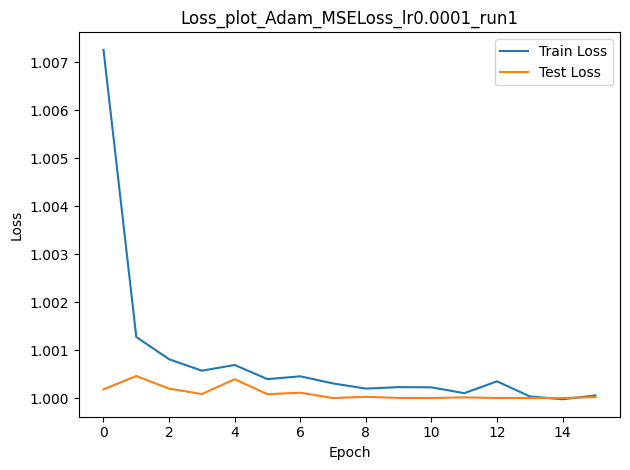

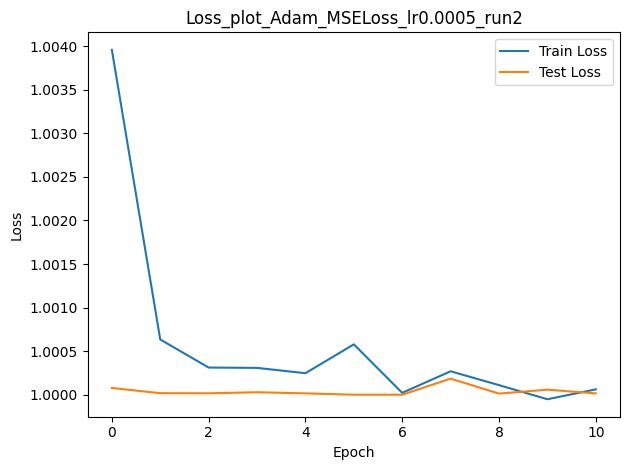

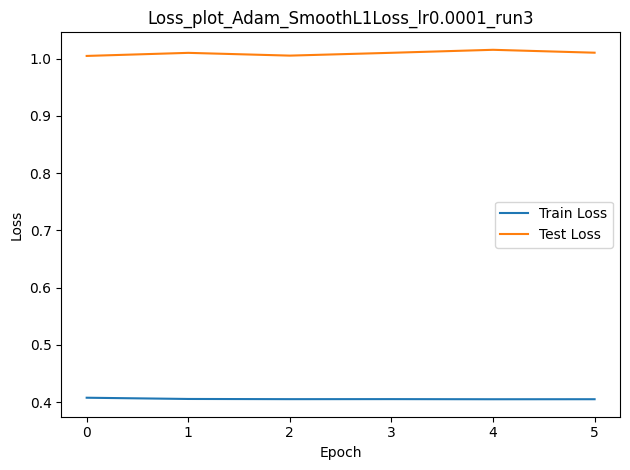

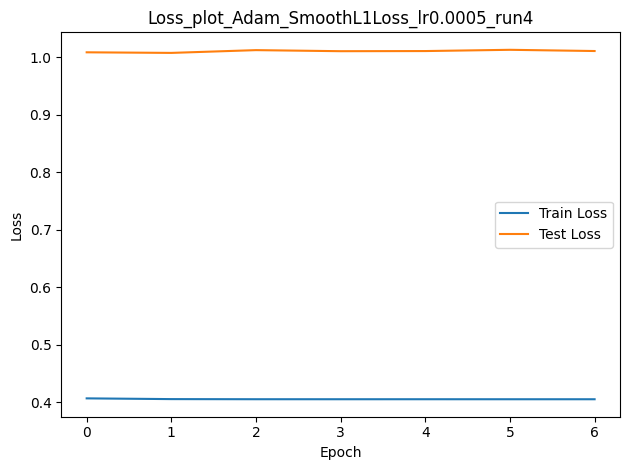

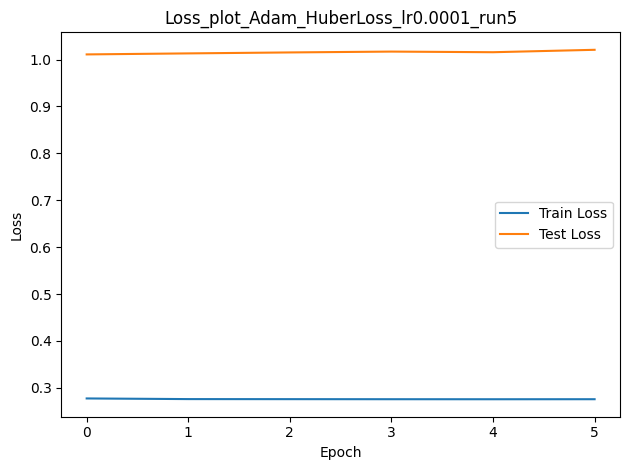

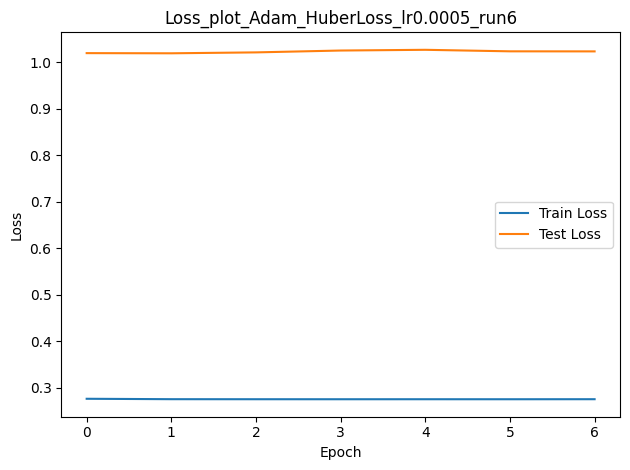

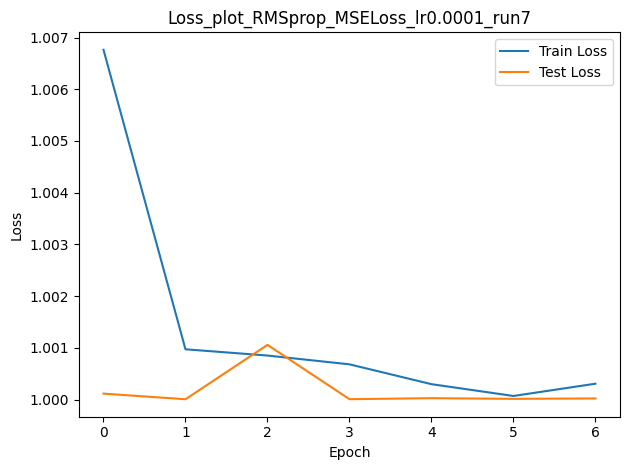

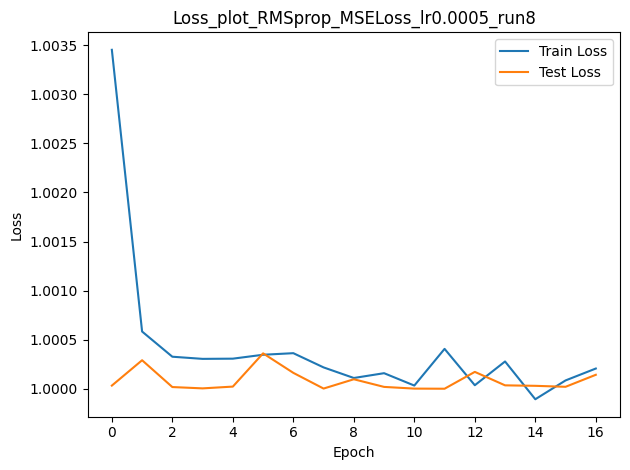

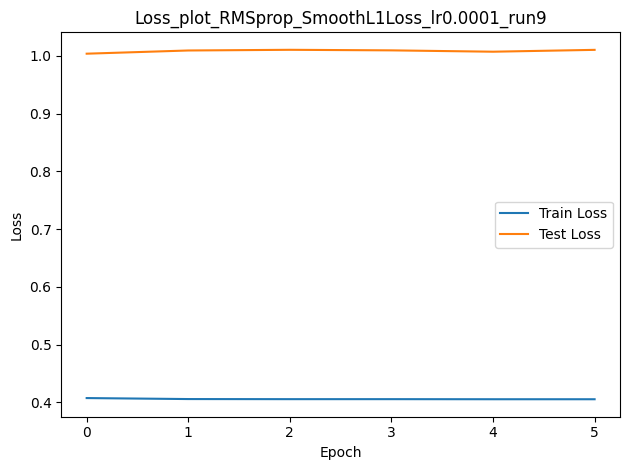

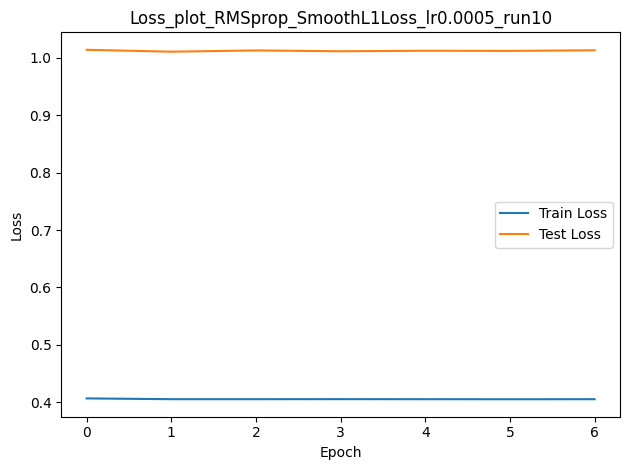

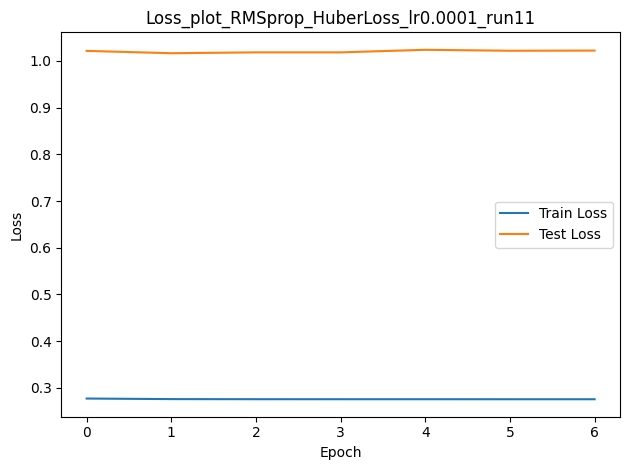

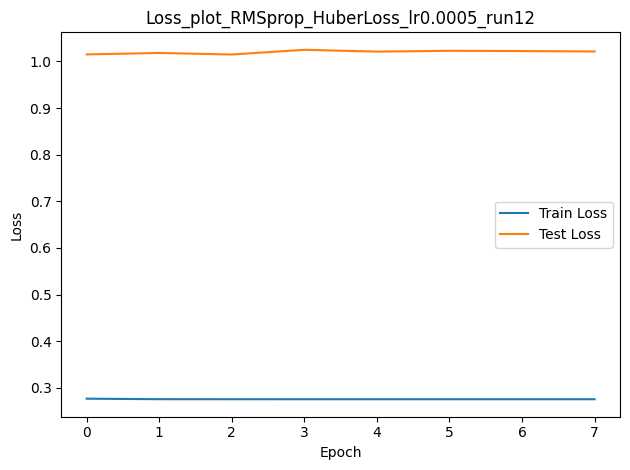

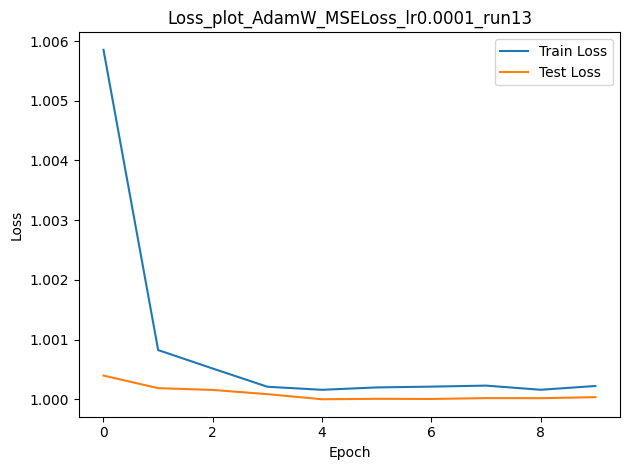

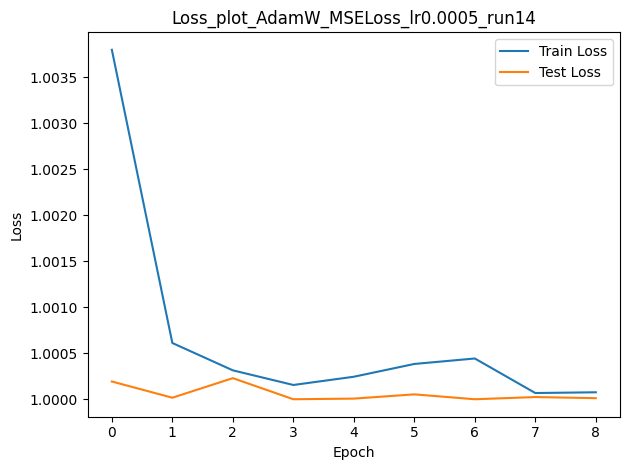

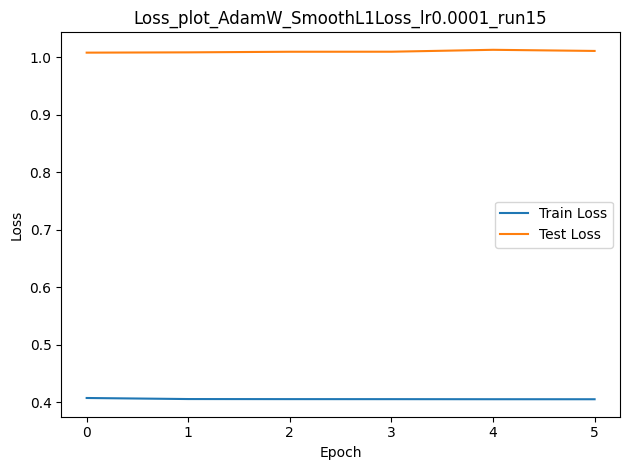

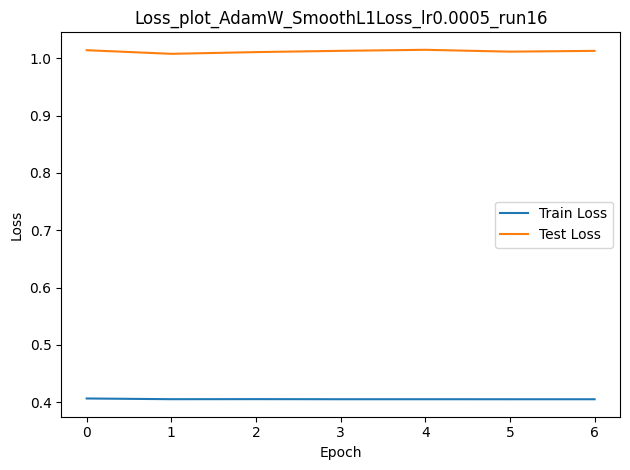

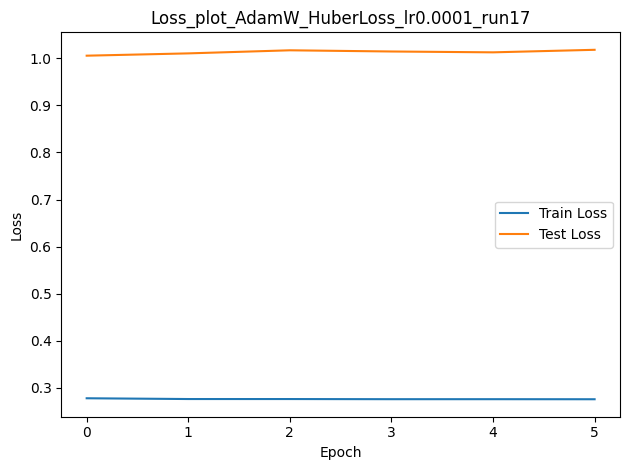

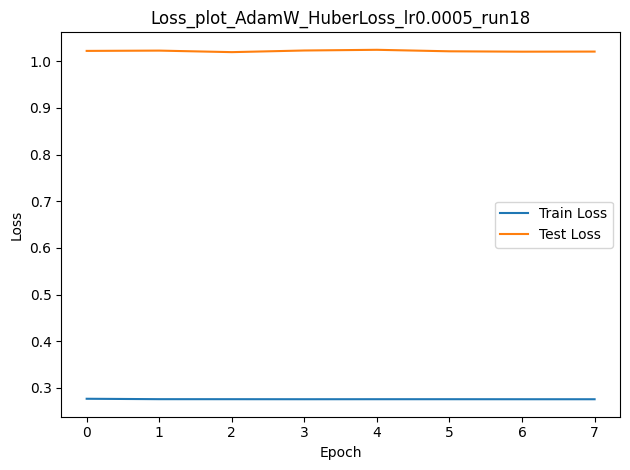

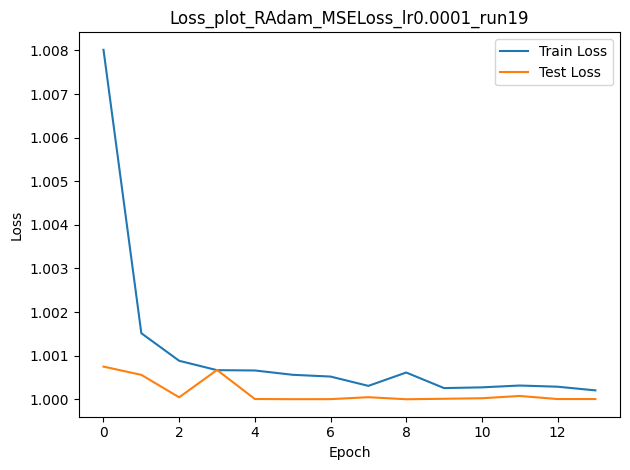

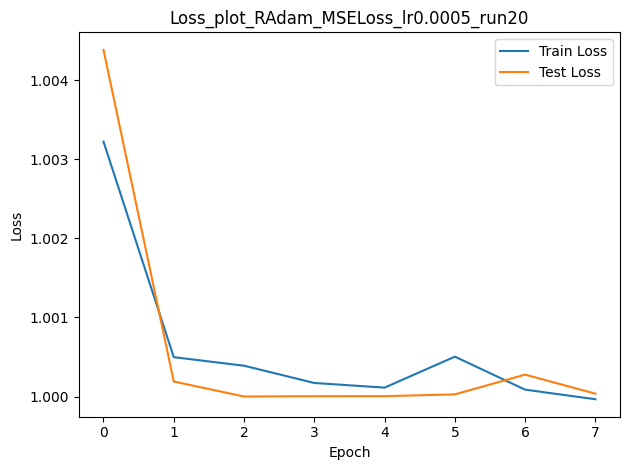

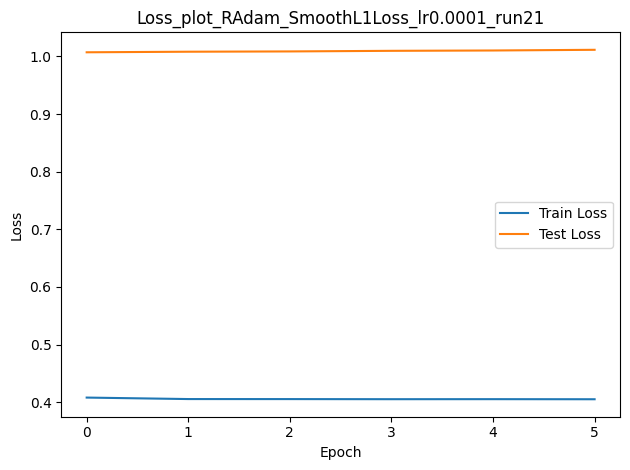

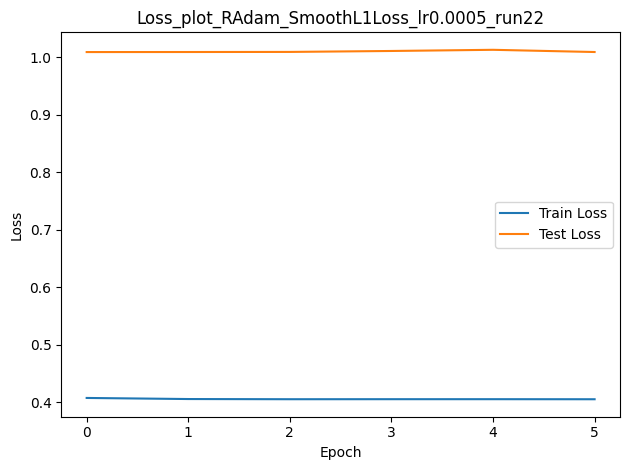

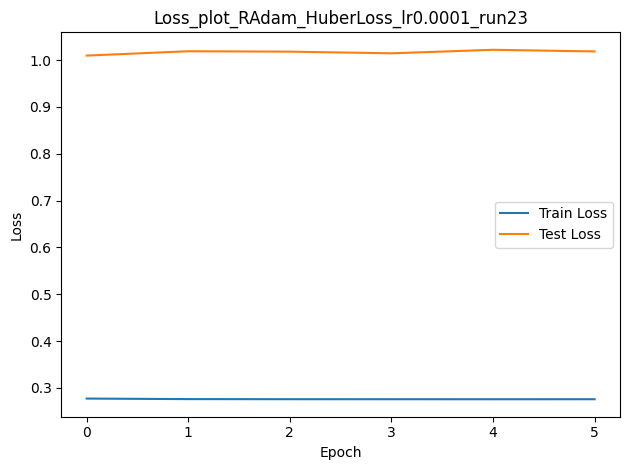

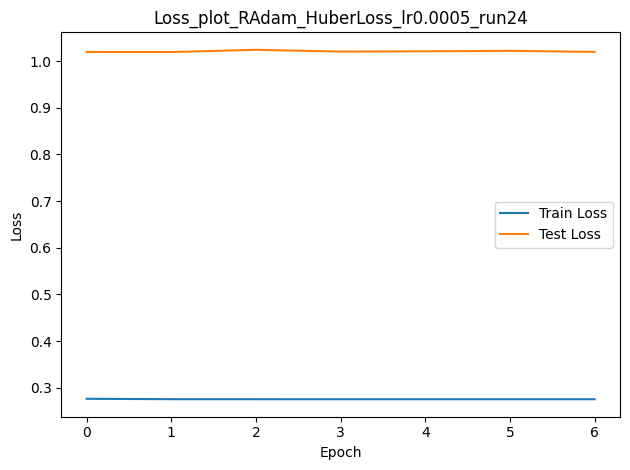

In [102]:
# === Hyperparameter tuning block ===
optimizers_to_try = {
    'Adam': torch.optim.Adam,
    'RMSprop': torch.optim.RMSprop,
    'AdamW': torch.optim.AdamW,
    'RAdam': lambda params, lr: torch_optimizer.RAdam(params, lr=lr)
}

loss_functions_to_try = {
    'MSELoss': nn.MSELoss(),
    'SmoothL1Loss': nn.SmoothL1Loss(),
    'HuberLoss': nn.HuberLoss(delta=0.5) #good for noisy data, outliers
}

learning_rates = [1e-4, 5e-4]
batch_combinations = [
    {"train": train_batch, "val": val_batch}
]

run_id = 0
for opt_name, opt_class in optimizers_to_try.items():
    for loss_name, loss_fn in loss_functions_to_try.items():
        for lr in learning_rates:
            for batch_sizes in batch_combinations:
                run_id += 1
                print(f"\n===== Run {run_id}: {opt_name} + {loss_name} + lr={lr} =====")
                save_name = f"{opt_name}_{loss_name}_lr{lr}_run{run_id}"

                def train_with_loss_override(
                    modeling, train_batch, val_batch, lr, num_epoch, log_interval,
                    cuda_name, br_fol, result_folder, model_folder, save_name, do_save=True
                ):
                    print_initial_info(lr, num_epoch, modeling)
                    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")

                    # Prepare and load data
                    processed_files = prepare_data_files(br_fol, dataset="Data")
                    if not processed_files:
                        return

                    datasets = load_datasets(br_fol, dataset="Data")
                    data_loaders = get_data_loaders(datasets, batch_sizes)

                    # Train model with chosen loss
                    def train_custom(model, device, train_loader, optimizer, epoch, log_interval):
                        print(f"[{opt_name}/{loss_name}] Training on {len(train_loader.dataset)} samples...")
                        model.train()
                        avg_loss = []
                        for data in tqdm(train_loader):
                            data = data.to(device)
                            optimizer.zero_grad()
                            x, x_cell_mut, edge_index, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features
                            output = model(x, edge_index, batch_drug, x_cell_mut, edge_feat)
                            loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
                            loss.backward()
                            optimizer.step()
                            avg_loss.append(loss.item())
                        return sum(avg_loss) / len(avg_loss)

                    # Override train function
                    global train
                    original_train = train
                    train = train_custom  # monkey patching

                    # Run training
                    train_and_evaluate_model(
                        modeling=modeling, data_loaders=data_loaders, device=device, num_epoch=num_epoch,
                        optimizer_params={"lr": lr}, log_interval=log_interval,
                        model_folder=model_folder, result_folder=result_folder,
                        save_name=save_name, do_save=do_save
                    )

                    train = original_train  # restore original

                train_with_loss_override(modeling, train_batch, val_batch, lr, num_epoch,
                                         log_interval, cuda_name, br_fol=branch_folder,
                                         result_folder=result_folder, model_folder=model_folder,
                                         save_name=save_name, do_save=True)


In [103]:
import pandas as pd
import os
import glob

def fetch_hyperparam_results(result_folder, prefix="val_result_", dataset="Data"):
    """
    Dynamically reads all validation result files and extracts hyperparameter performance.
    """
    result_files = glob.glob(os.path.join(result_folder, f"{prefix}*{dataset}.csv"))
    results = []

    for file_path in result_files:
        try:
            # Read the metrics (assuming CSV contains a single row)
            with open(file_path, "r") as f:
                line = f.readline().strip()
                rmse_val, mse_val, pearson_val, spearman_val = map(float, line.split(','))

            # Extract run number and parse settings (e.g., from filename)
            filename = os.path.basename(file_path)
            parts = filename.replace(".csv", "").split("_")
            run_id = parts[2] if len(parts) >= 3 else "NA"

            # Optional: add more parsing logic for optimizer/loss/lr from filename
            results.append({
                "Run": run_id,
                "File": filename,
                "RMSE": rmse_val,
                "MSE": mse_val,
                "Pearson": pearson_val,
                "Spearman": spearman_val
            })

        except Exception as e:
            print(f" Error reading {file_path}: {e}")

    return pd.DataFrame(results)

# Example usage:
result_folder = "/content/root_folder/root_1/results"
df_metrics = fetch_hyperparam_results(result_folder)

# Format and sort results
df_metrics["MSE_exp"] = df_metrics["MSE"].apply(lambda x: f"{x:.10e}")
df_sorted = df_metrics.sort_values(by="MSE").reset_index(drop=True)

print("\n Sorted Hyperparameter Results:")
print(df_sorted[["Run", "File", "MSE_exp","Pearson","Spearman"]])

# Show best config
best_row = df_sorted.iloc[0]
print(f"\n Best Config => Run {best_row['Run']} | MSE: {best_row['MSE_exp']} | Pearson: {best_row['Pearson']:.6f}")



 Sorted Hyperparameter Results:
         Run                                               File  \
0      RAdam   val_result_RAdam_MSELoss_lr0.0001_run19_Data.csv   
1      AdamW   val_result_AdamW_MSELoss_lr0.0001_run13_Data.csv   
2   baseline                       val_result_baseline_Data.csv   
3       Adam     val_result_Adam_MSELoss_lr0.0001_run1_Data.csv   
4      RAdam   val_result_RAdam_MSELoss_lr0.0005_run20_Data.csv   
5       Adam     val_result_Adam_MSELoss_lr0.0005_run2_Data.csv   
6    RMSprop  val_result_RMSprop_MSELoss_lr0.0005_run8_Data.csv   
7      AdamW   val_result_AdamW_MSELoss_lr0.0005_run14_Data.csv   
8    RMSprop  val_result_RMSprop_MSELoss_lr0.0001_run7_Data.csv   
9    RMSprop  val_result_RMSprop_SmoothL1Loss_lr0.0001_run9_...   
10      Adam  val_result_Adam_SmoothL1Loss_lr0.0001_run3_Dat...   
11     AdamW  val_result_AdamW_HuberLoss_lr0.0001_run17_Data...   
12     RAdam  val_result_RAdam_SmoothL1Loss_lr0.0001_run21_D...   
13      Adam  val_result_Adam

Downloading the models, plots and csv files

In [104]:
import zipfile
import os
from google.colab import files

def zip_folder(folder_path, output_path):
  zip_file = zipfile.ZipFile(output_path, 'w')
  for folder, subfolders, files in os.walk(folder_path):
    for file in files:
      zip_file.write(os.path.join(folder, file),
                     os.path.relpath(os.path.join(folder, file),
                                     folder_path))
  zip_file.close()

# Example usage
zip_folder('/content/root_folder/root_1/results', 'results.zip')
files.download('results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
# Example usage
zip_folder('/content/root_folder/root_1/models', 'models.zip')
files.download('models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plotting the Loss Plots for each run

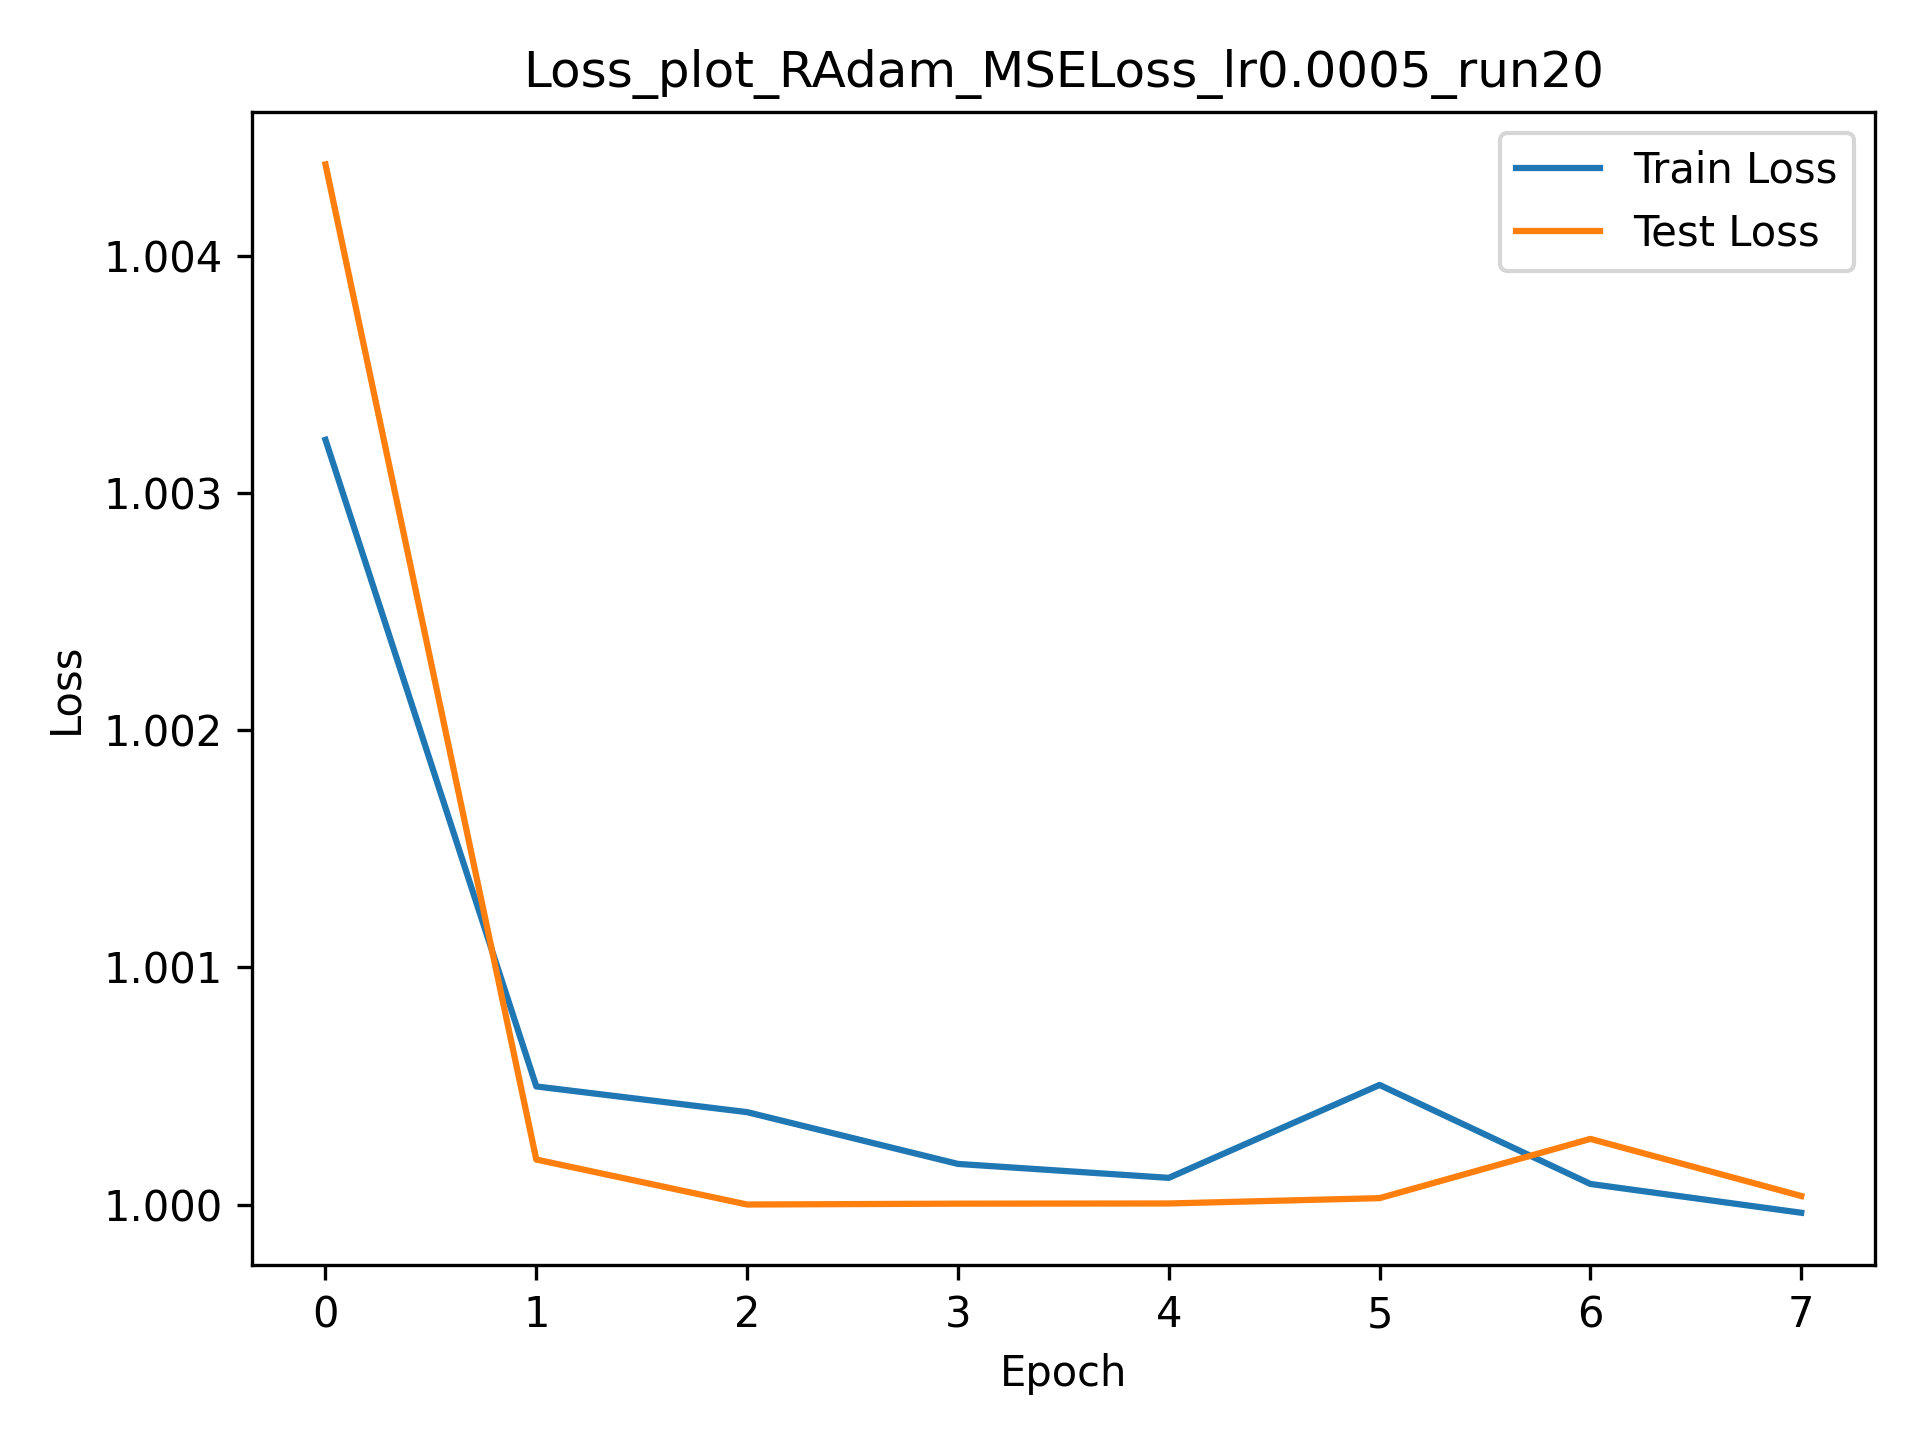

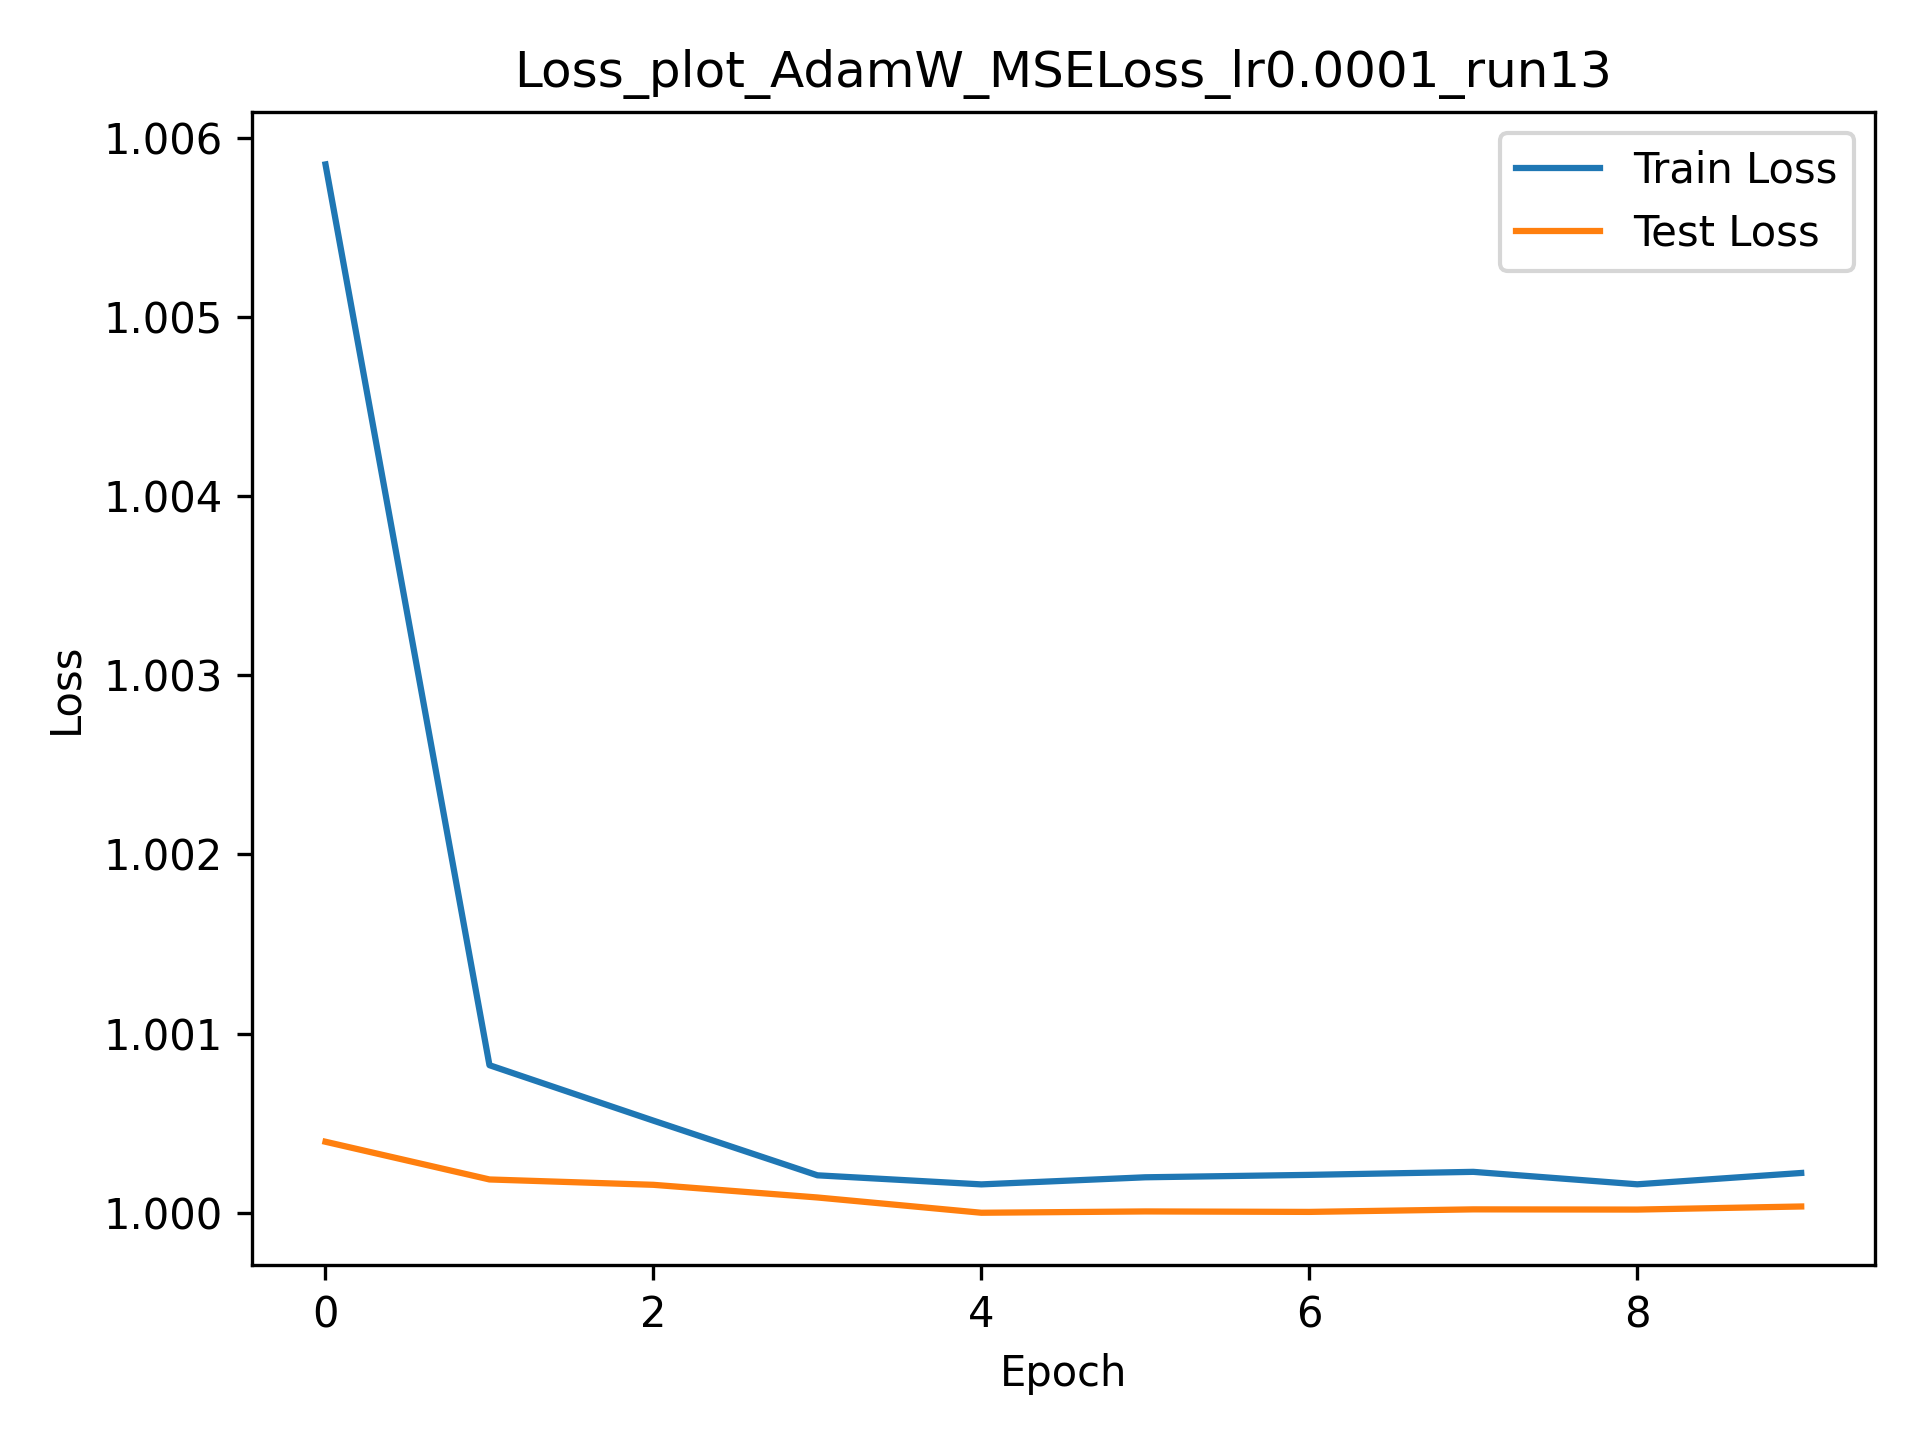

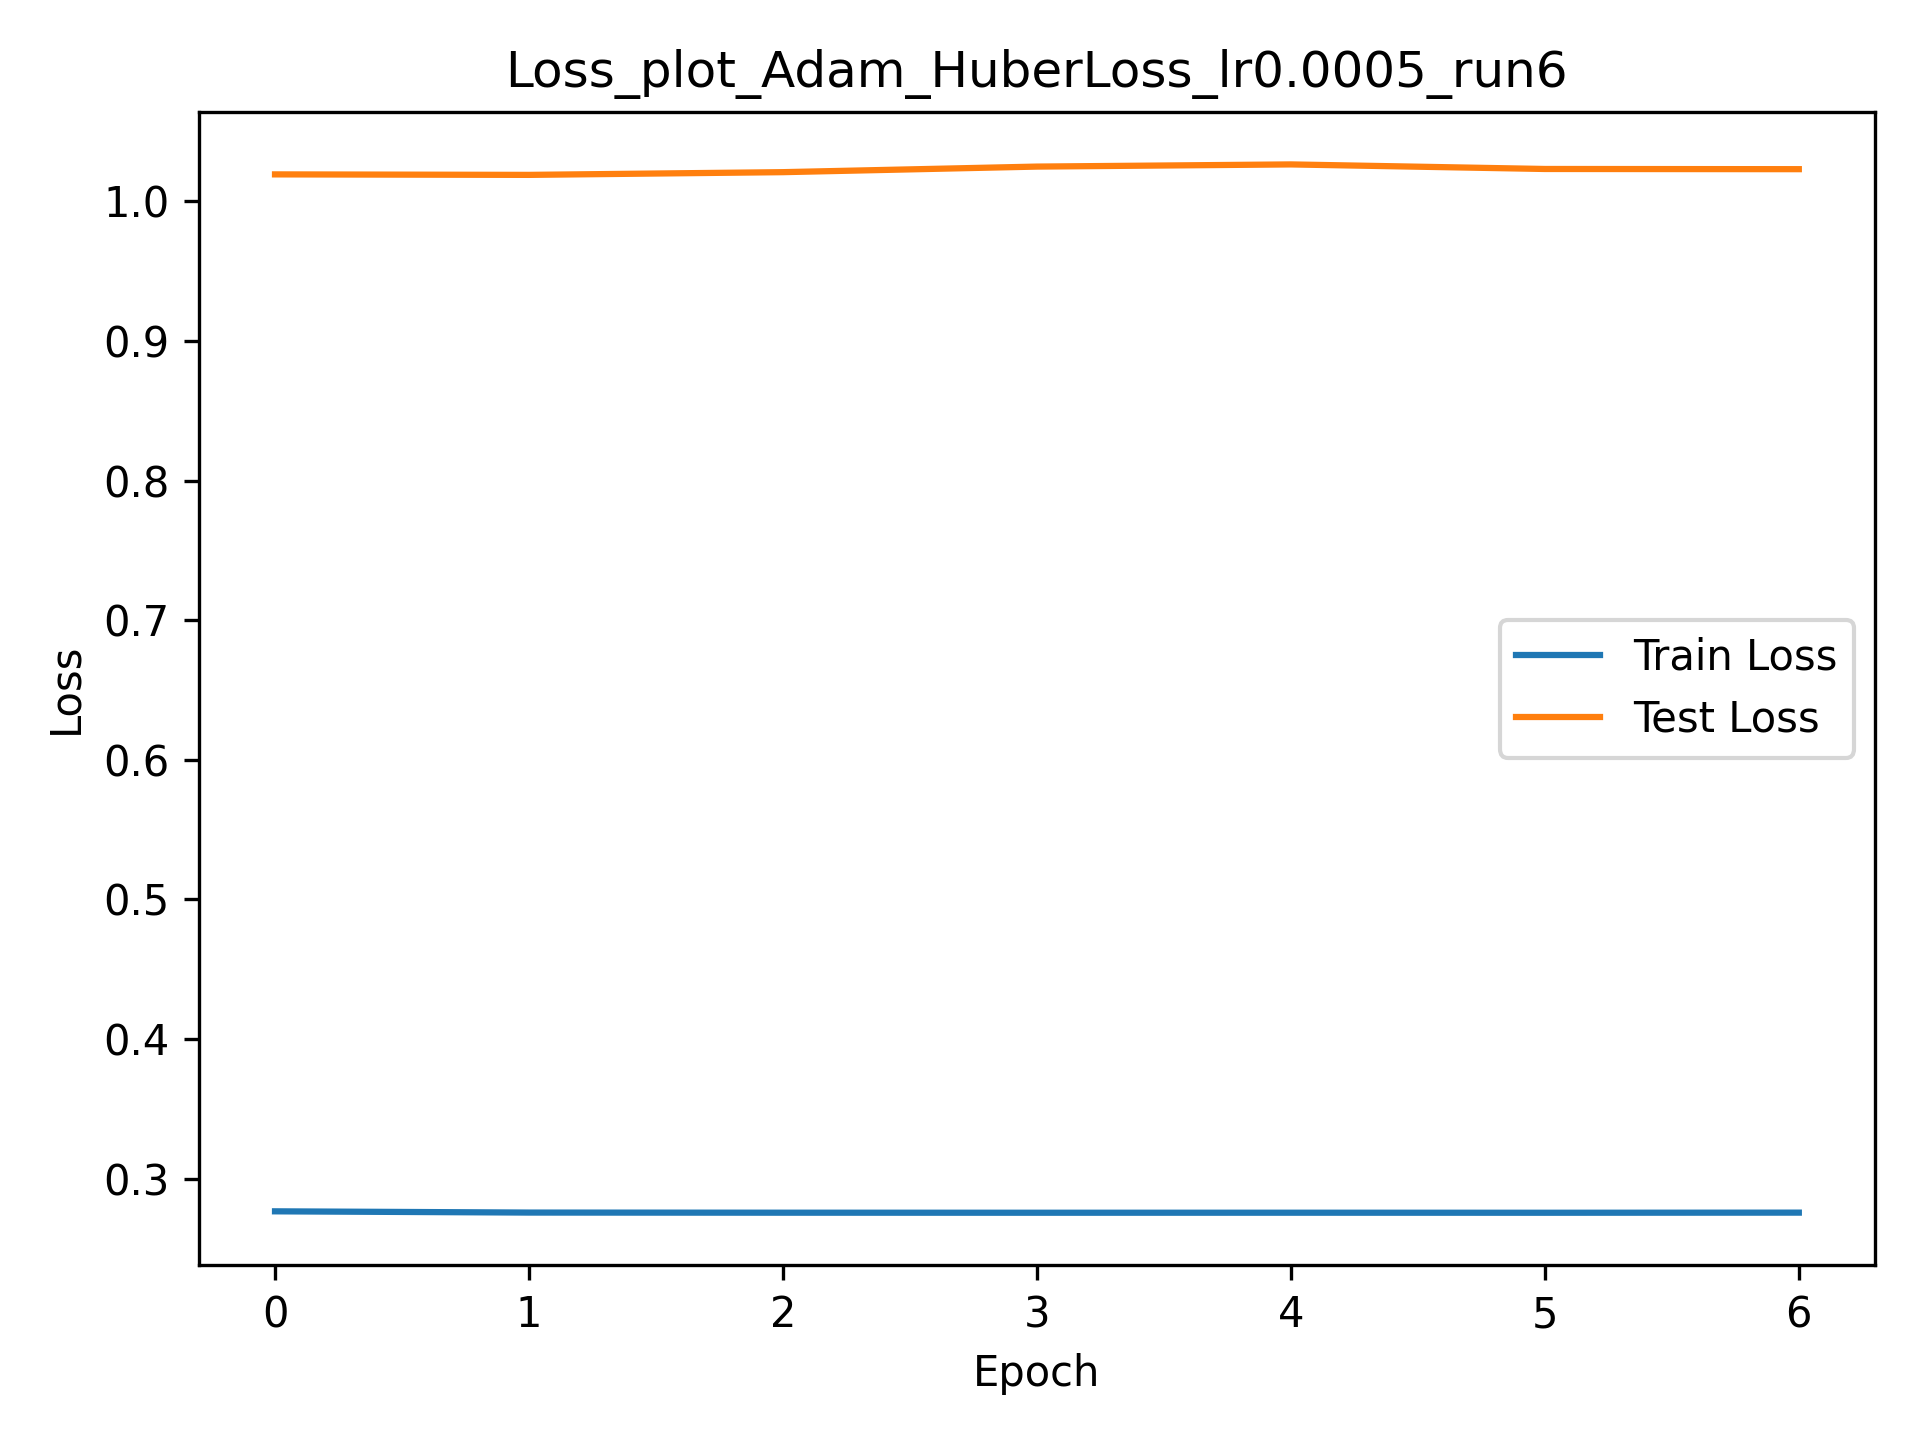

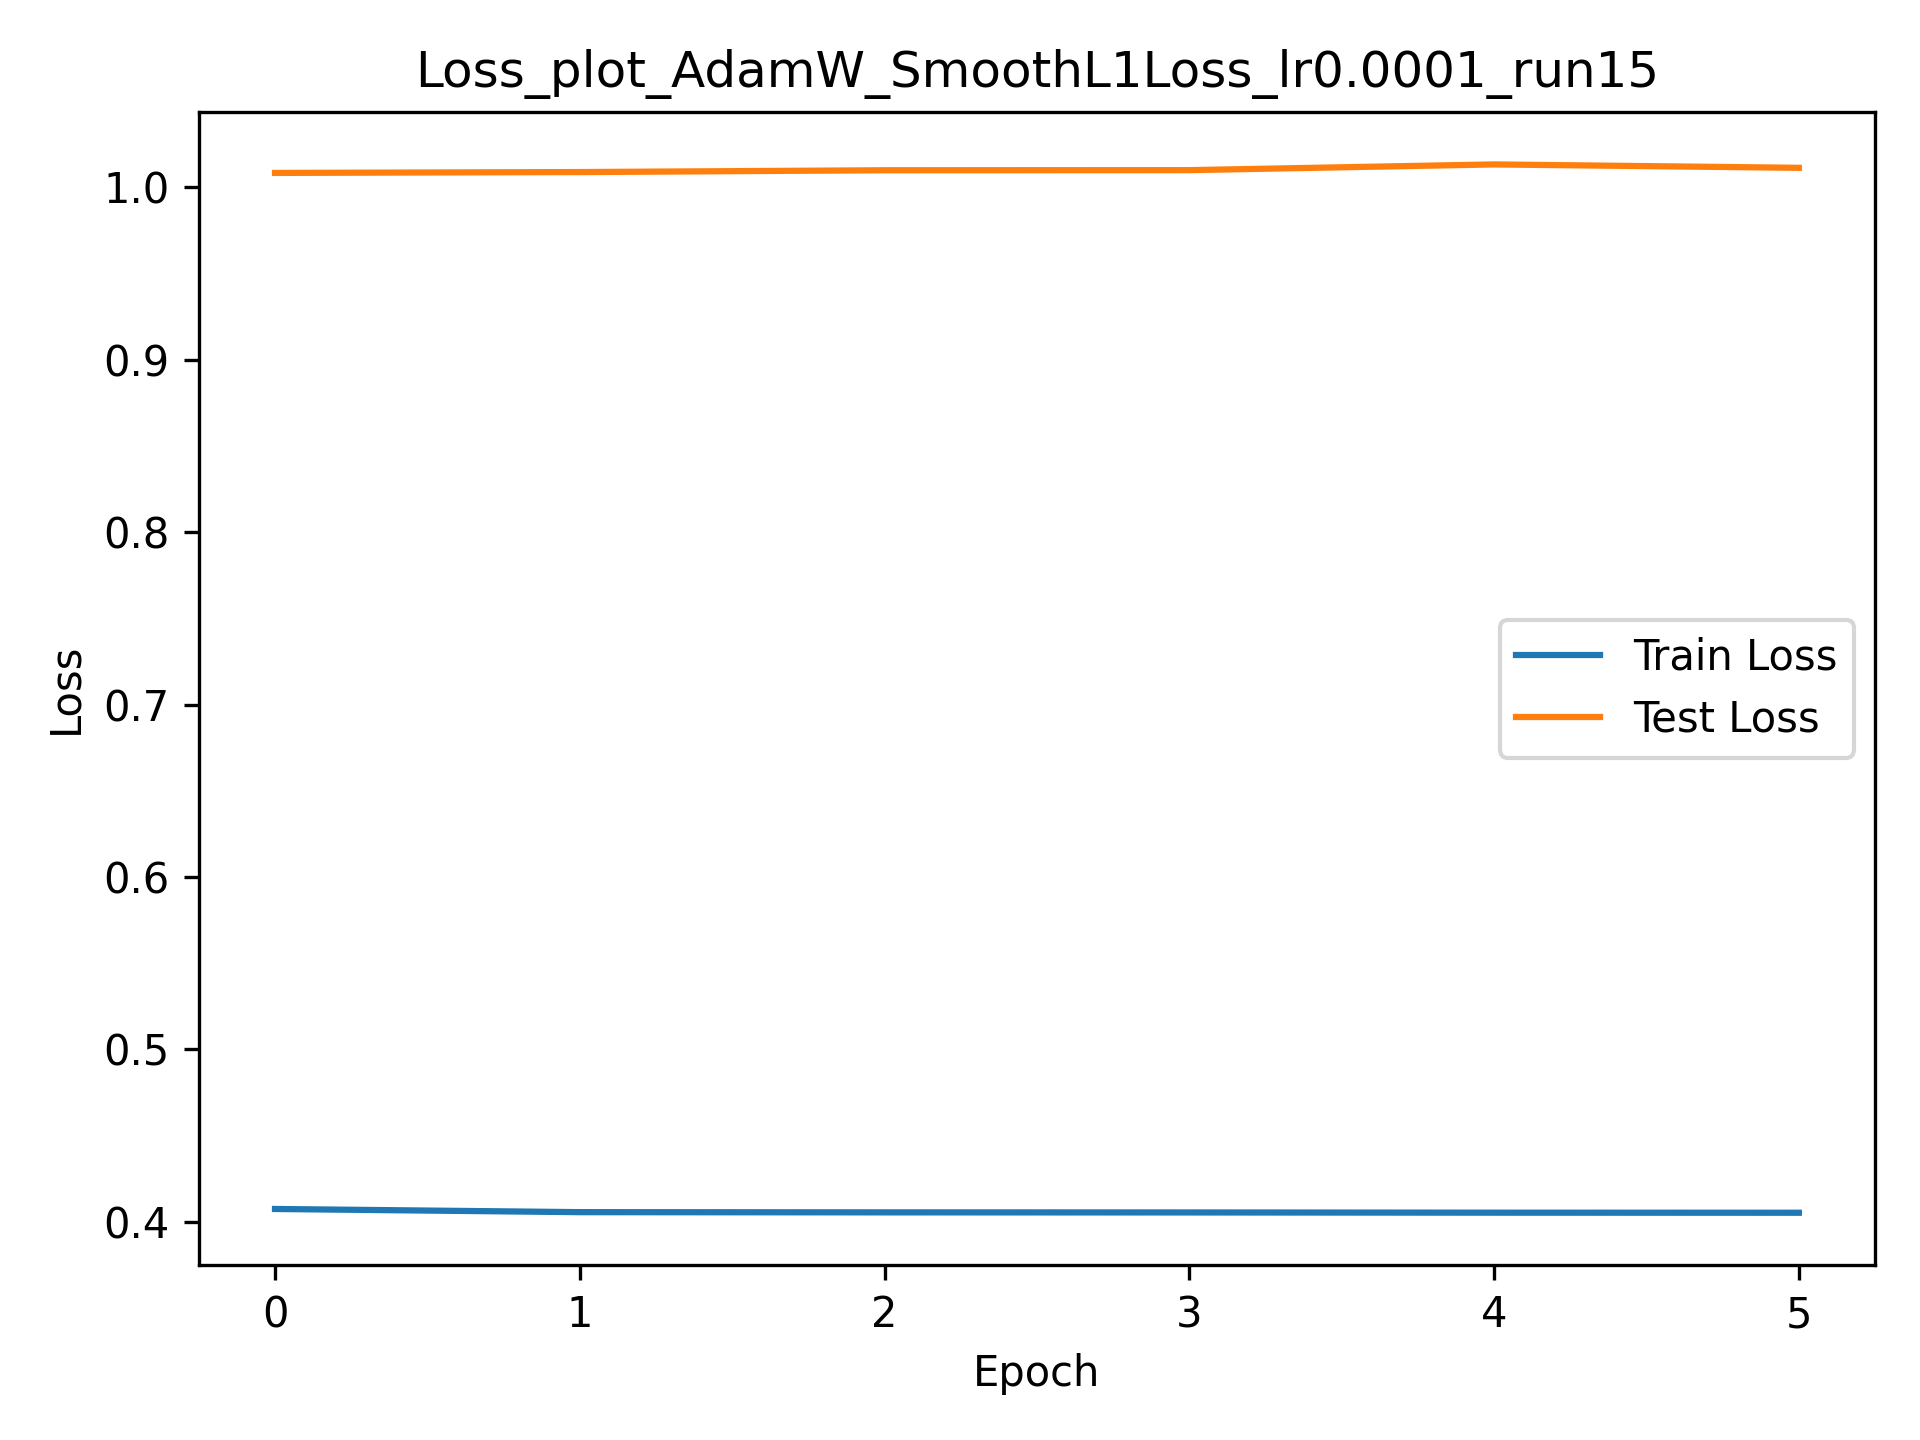

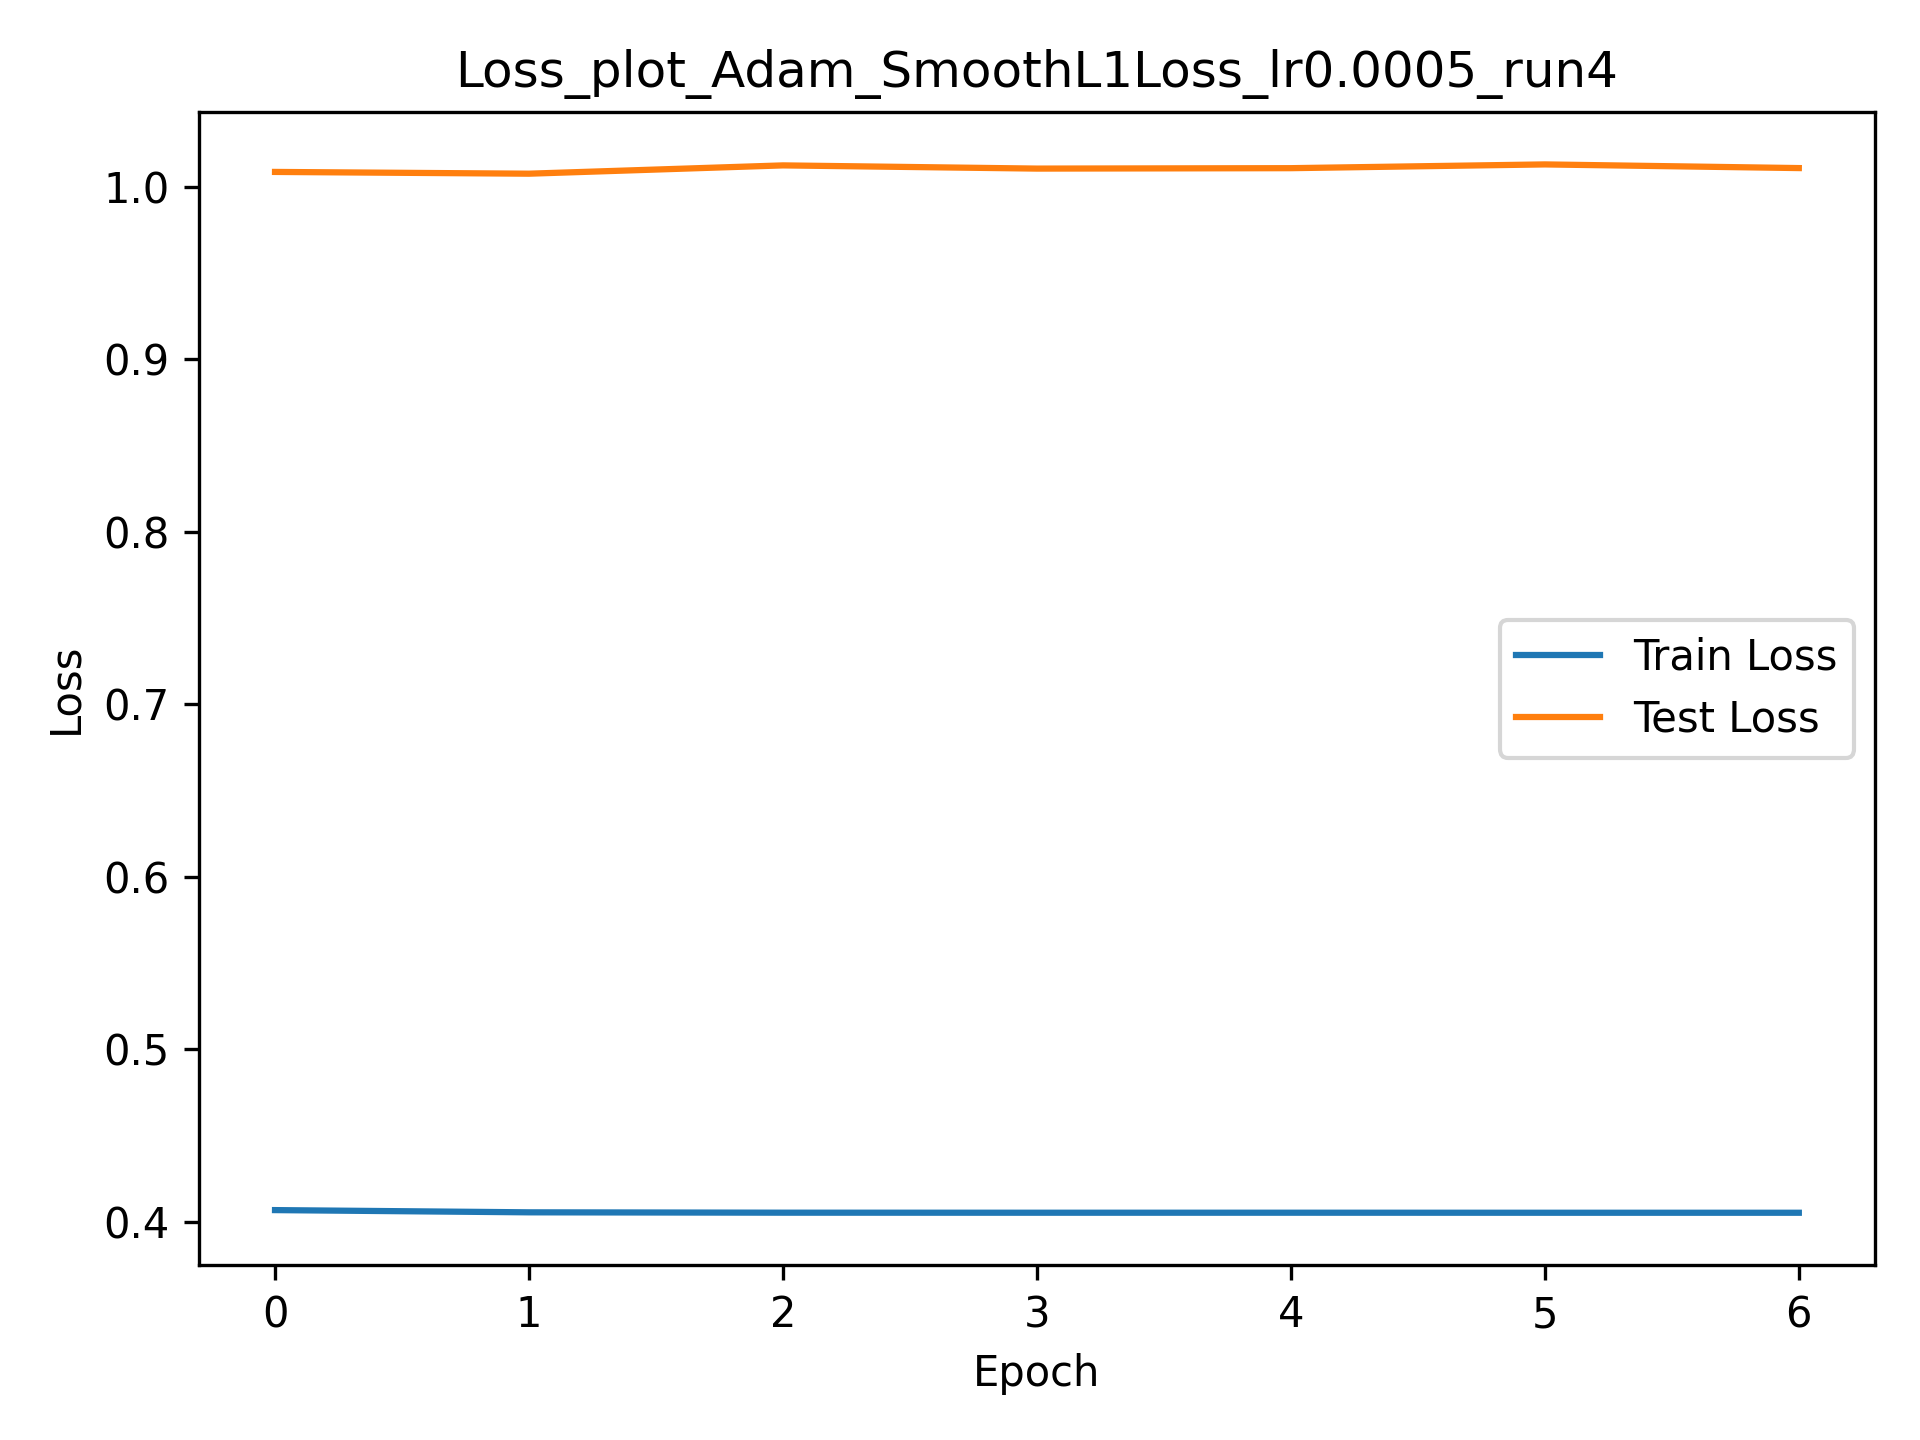

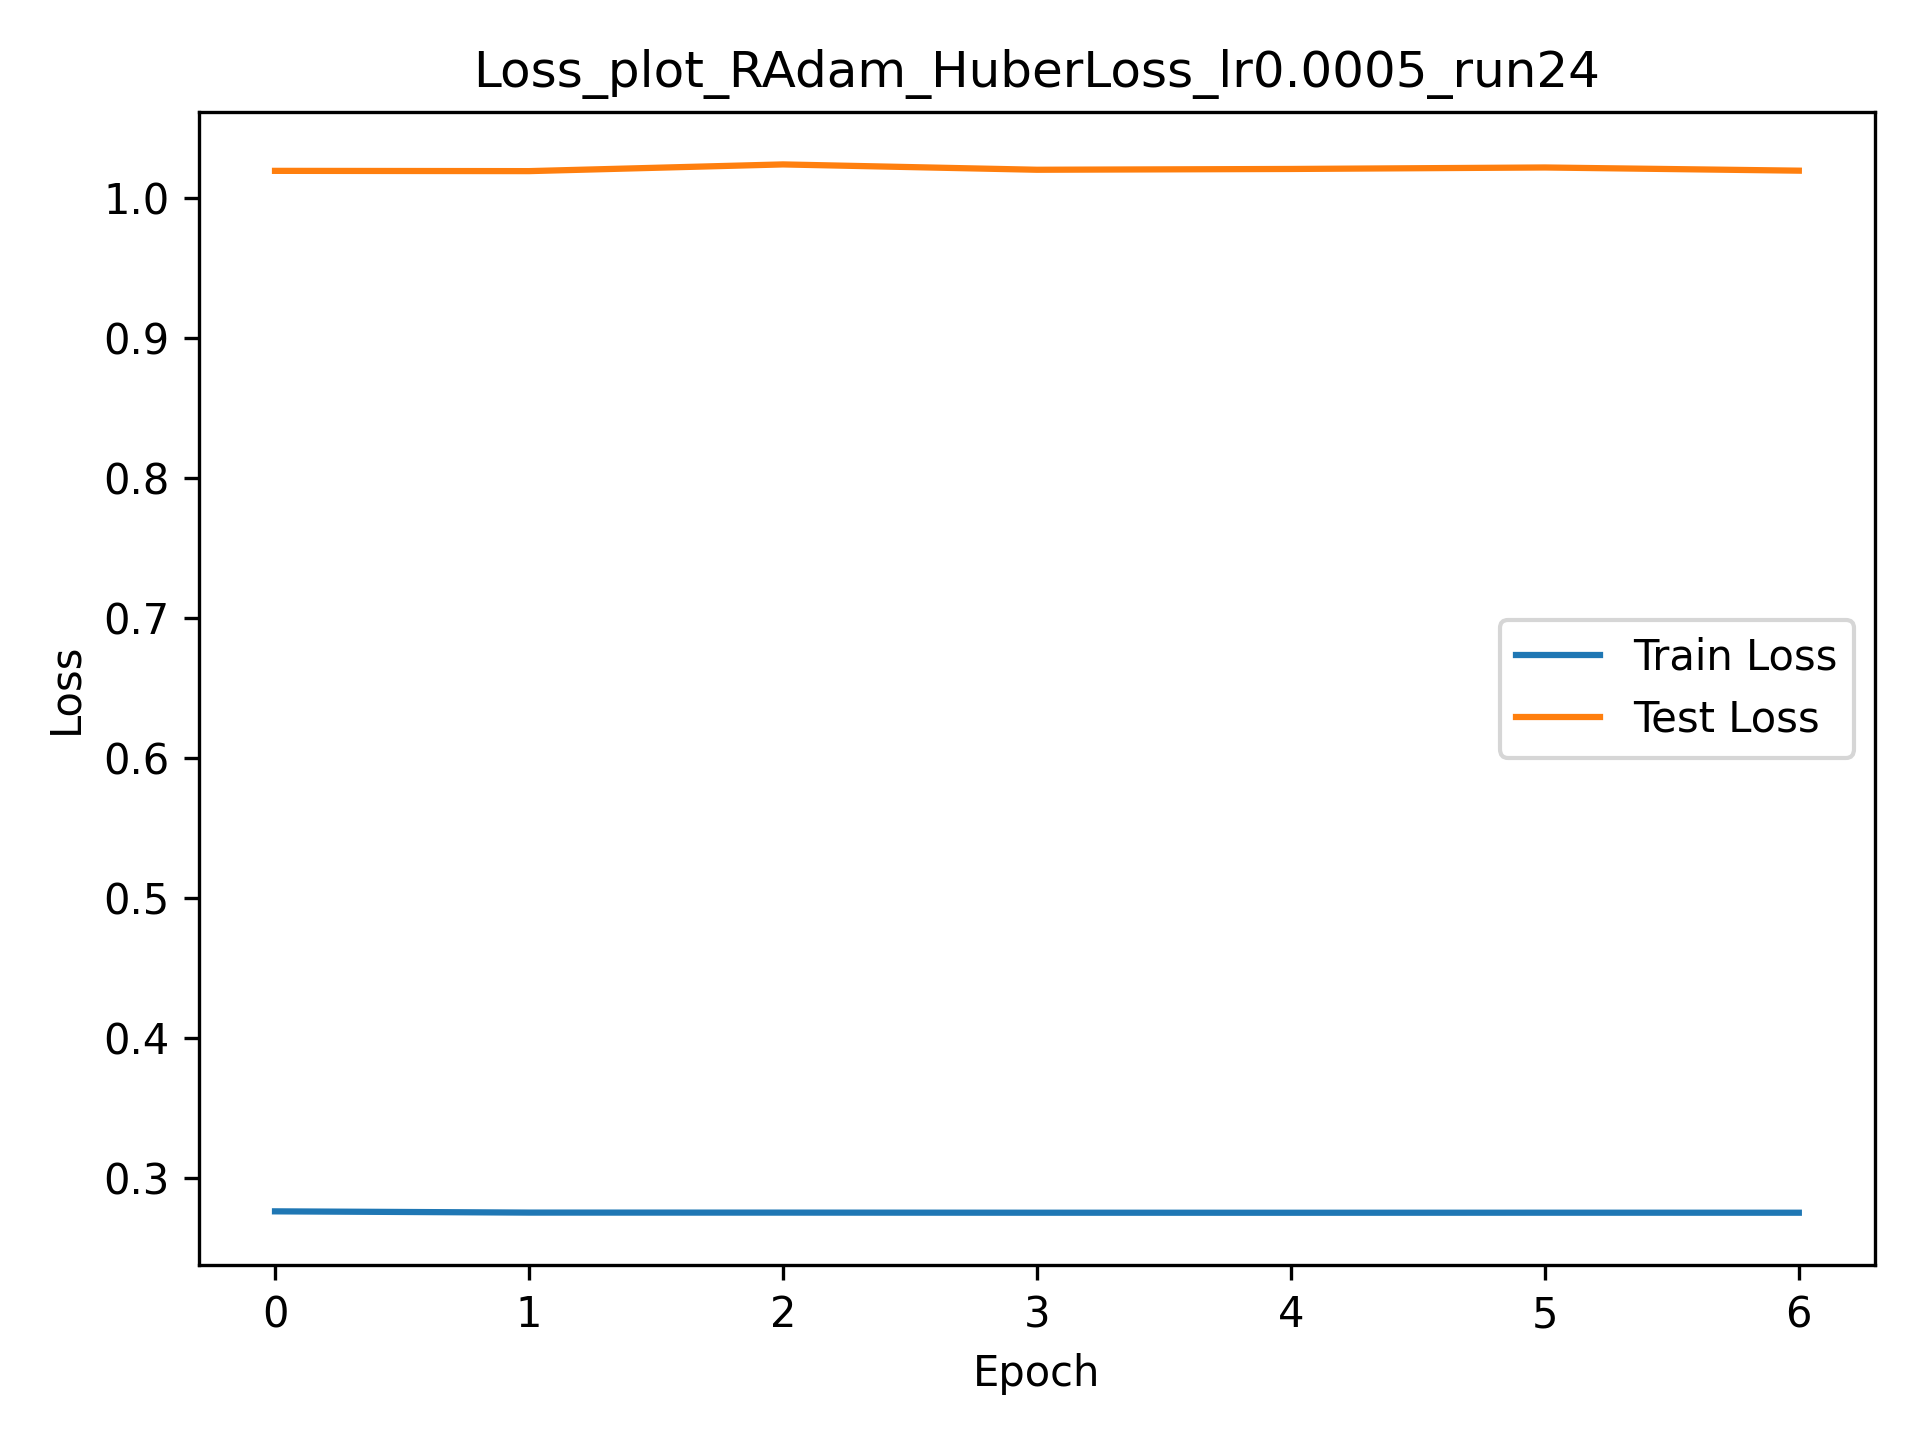

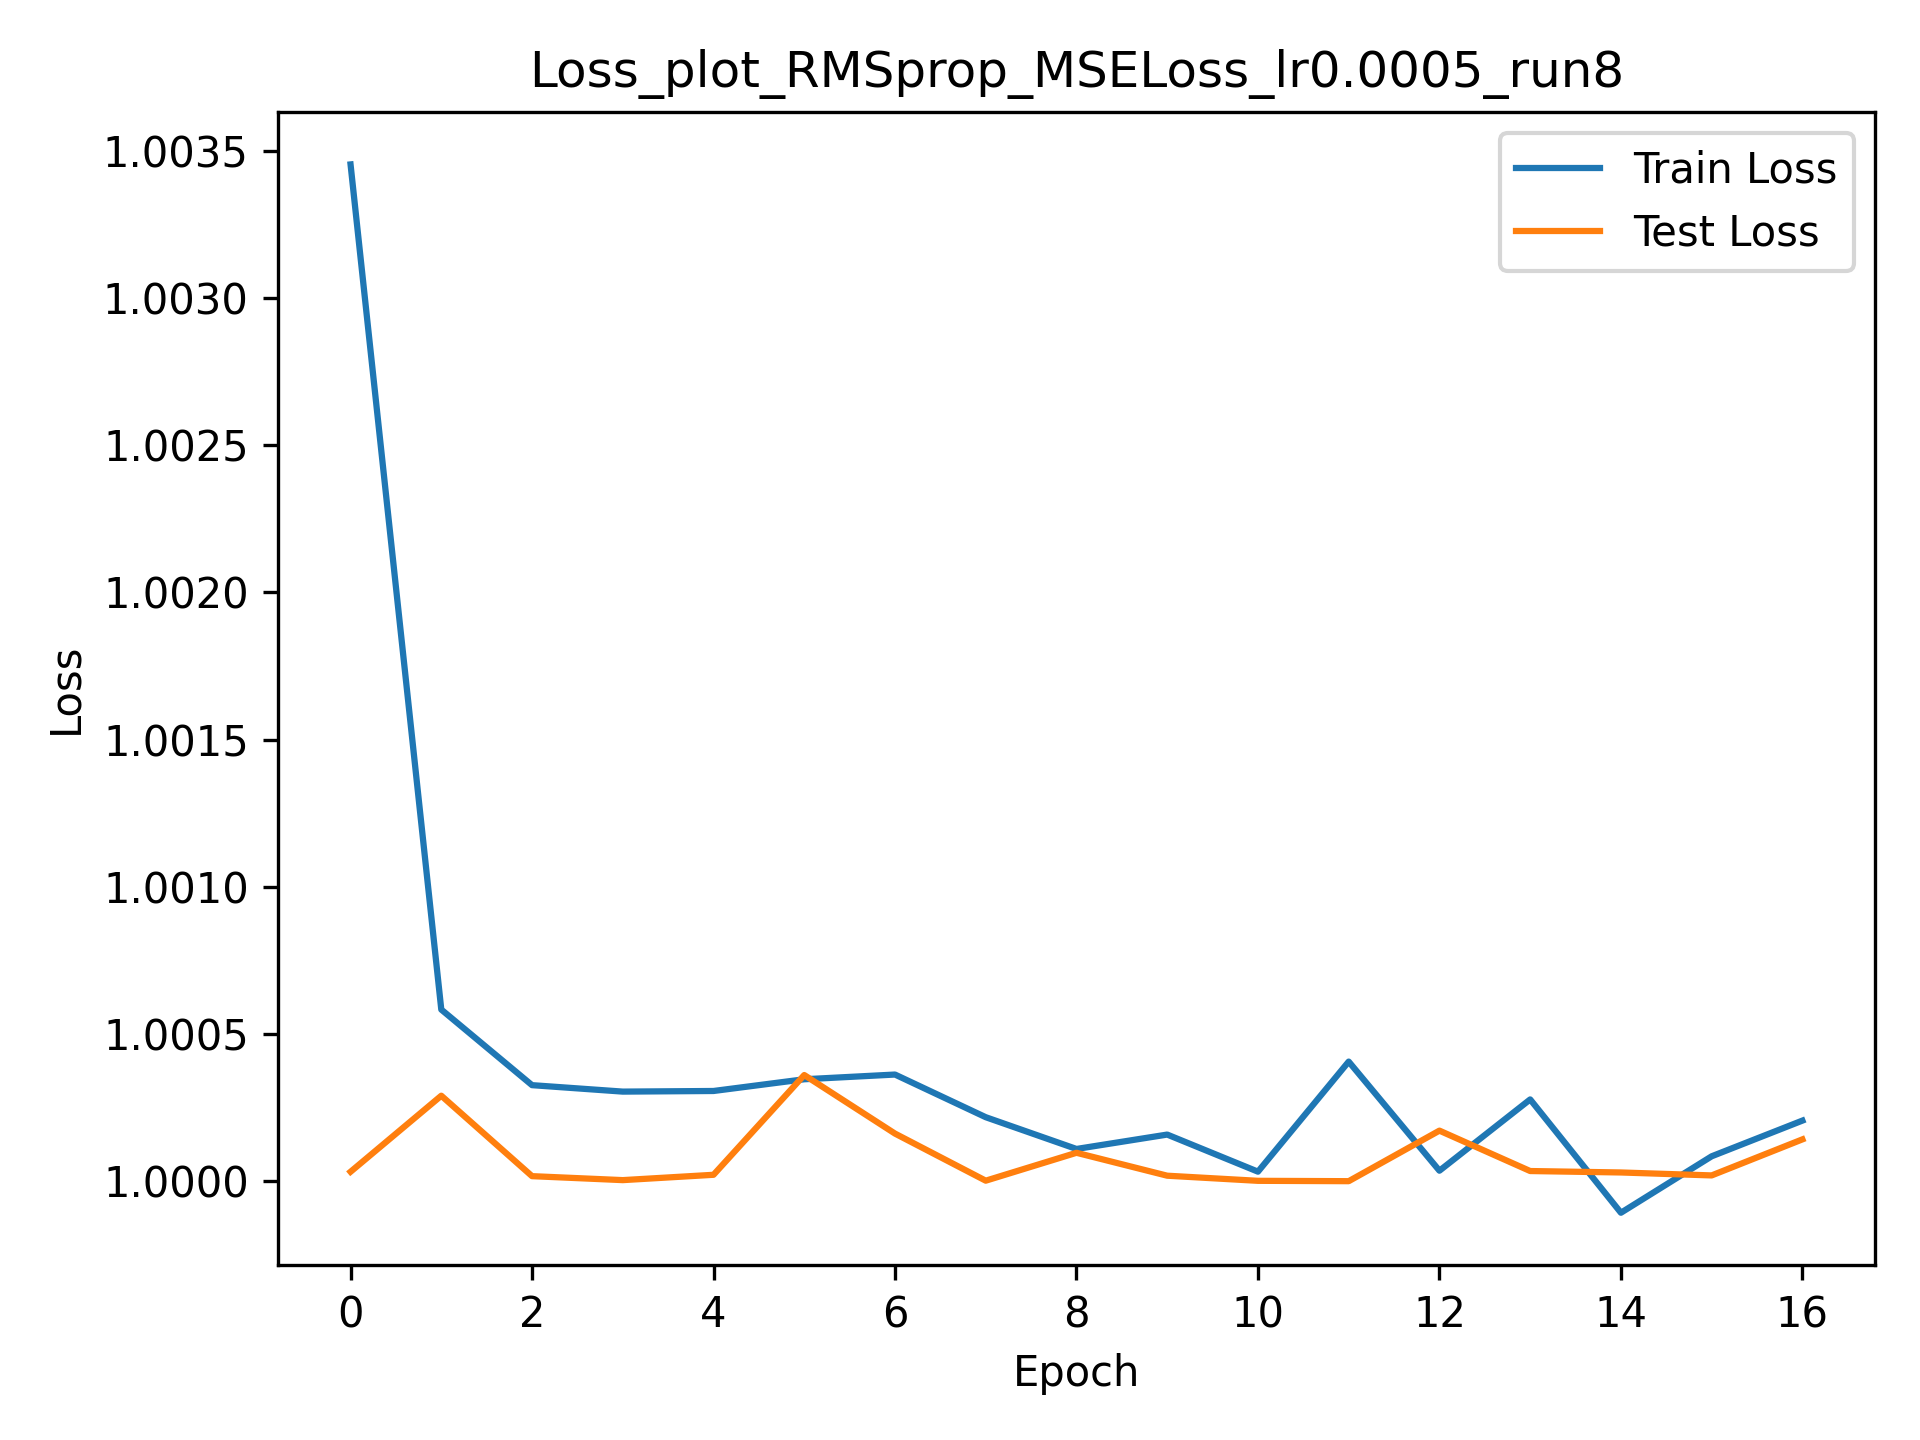

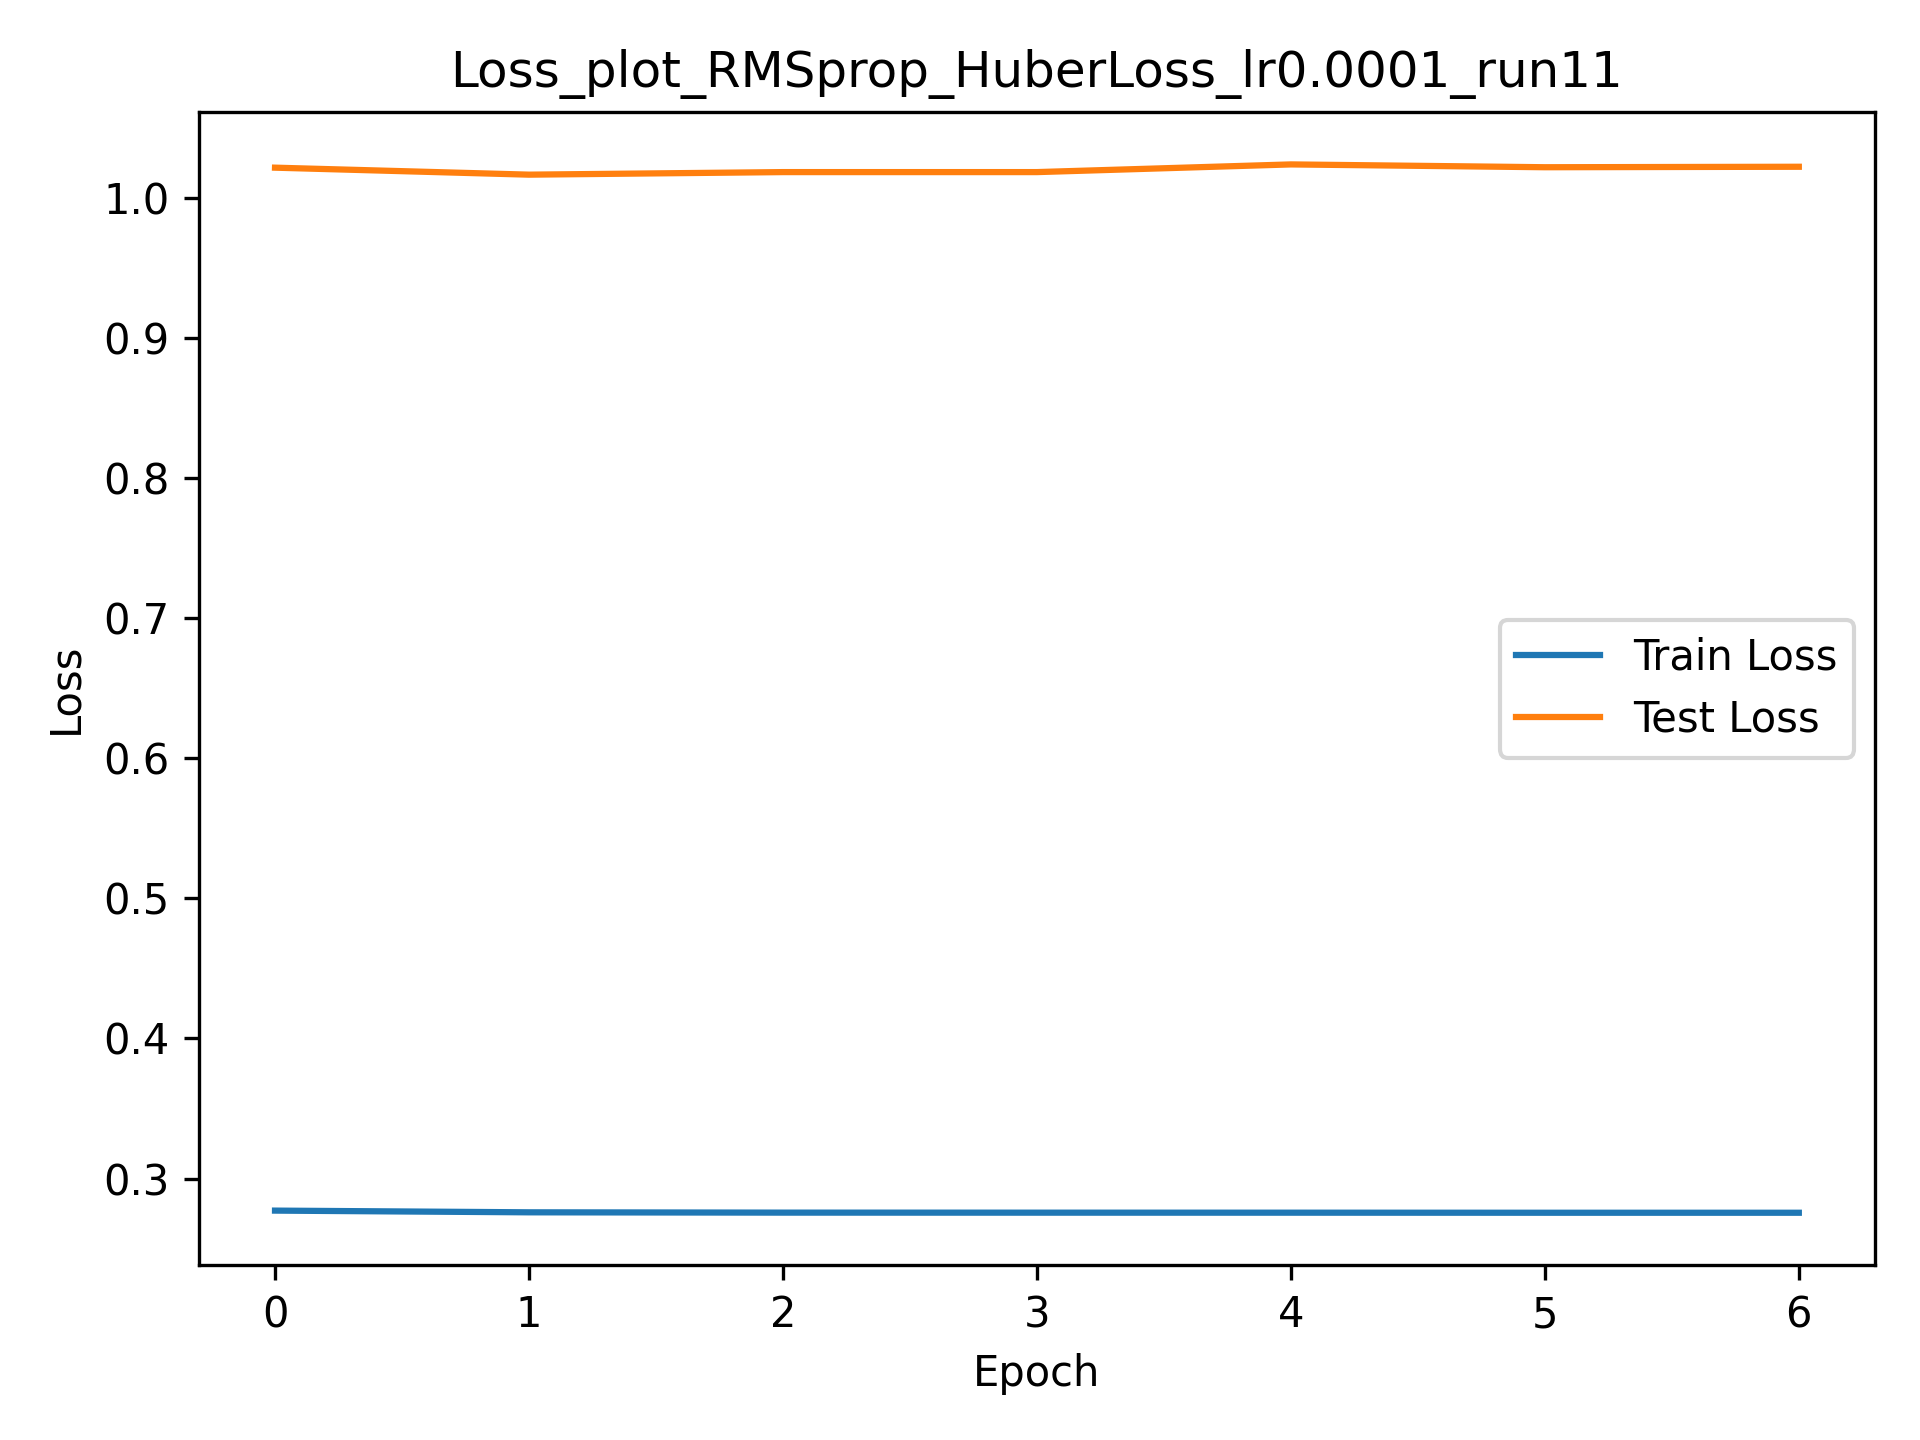

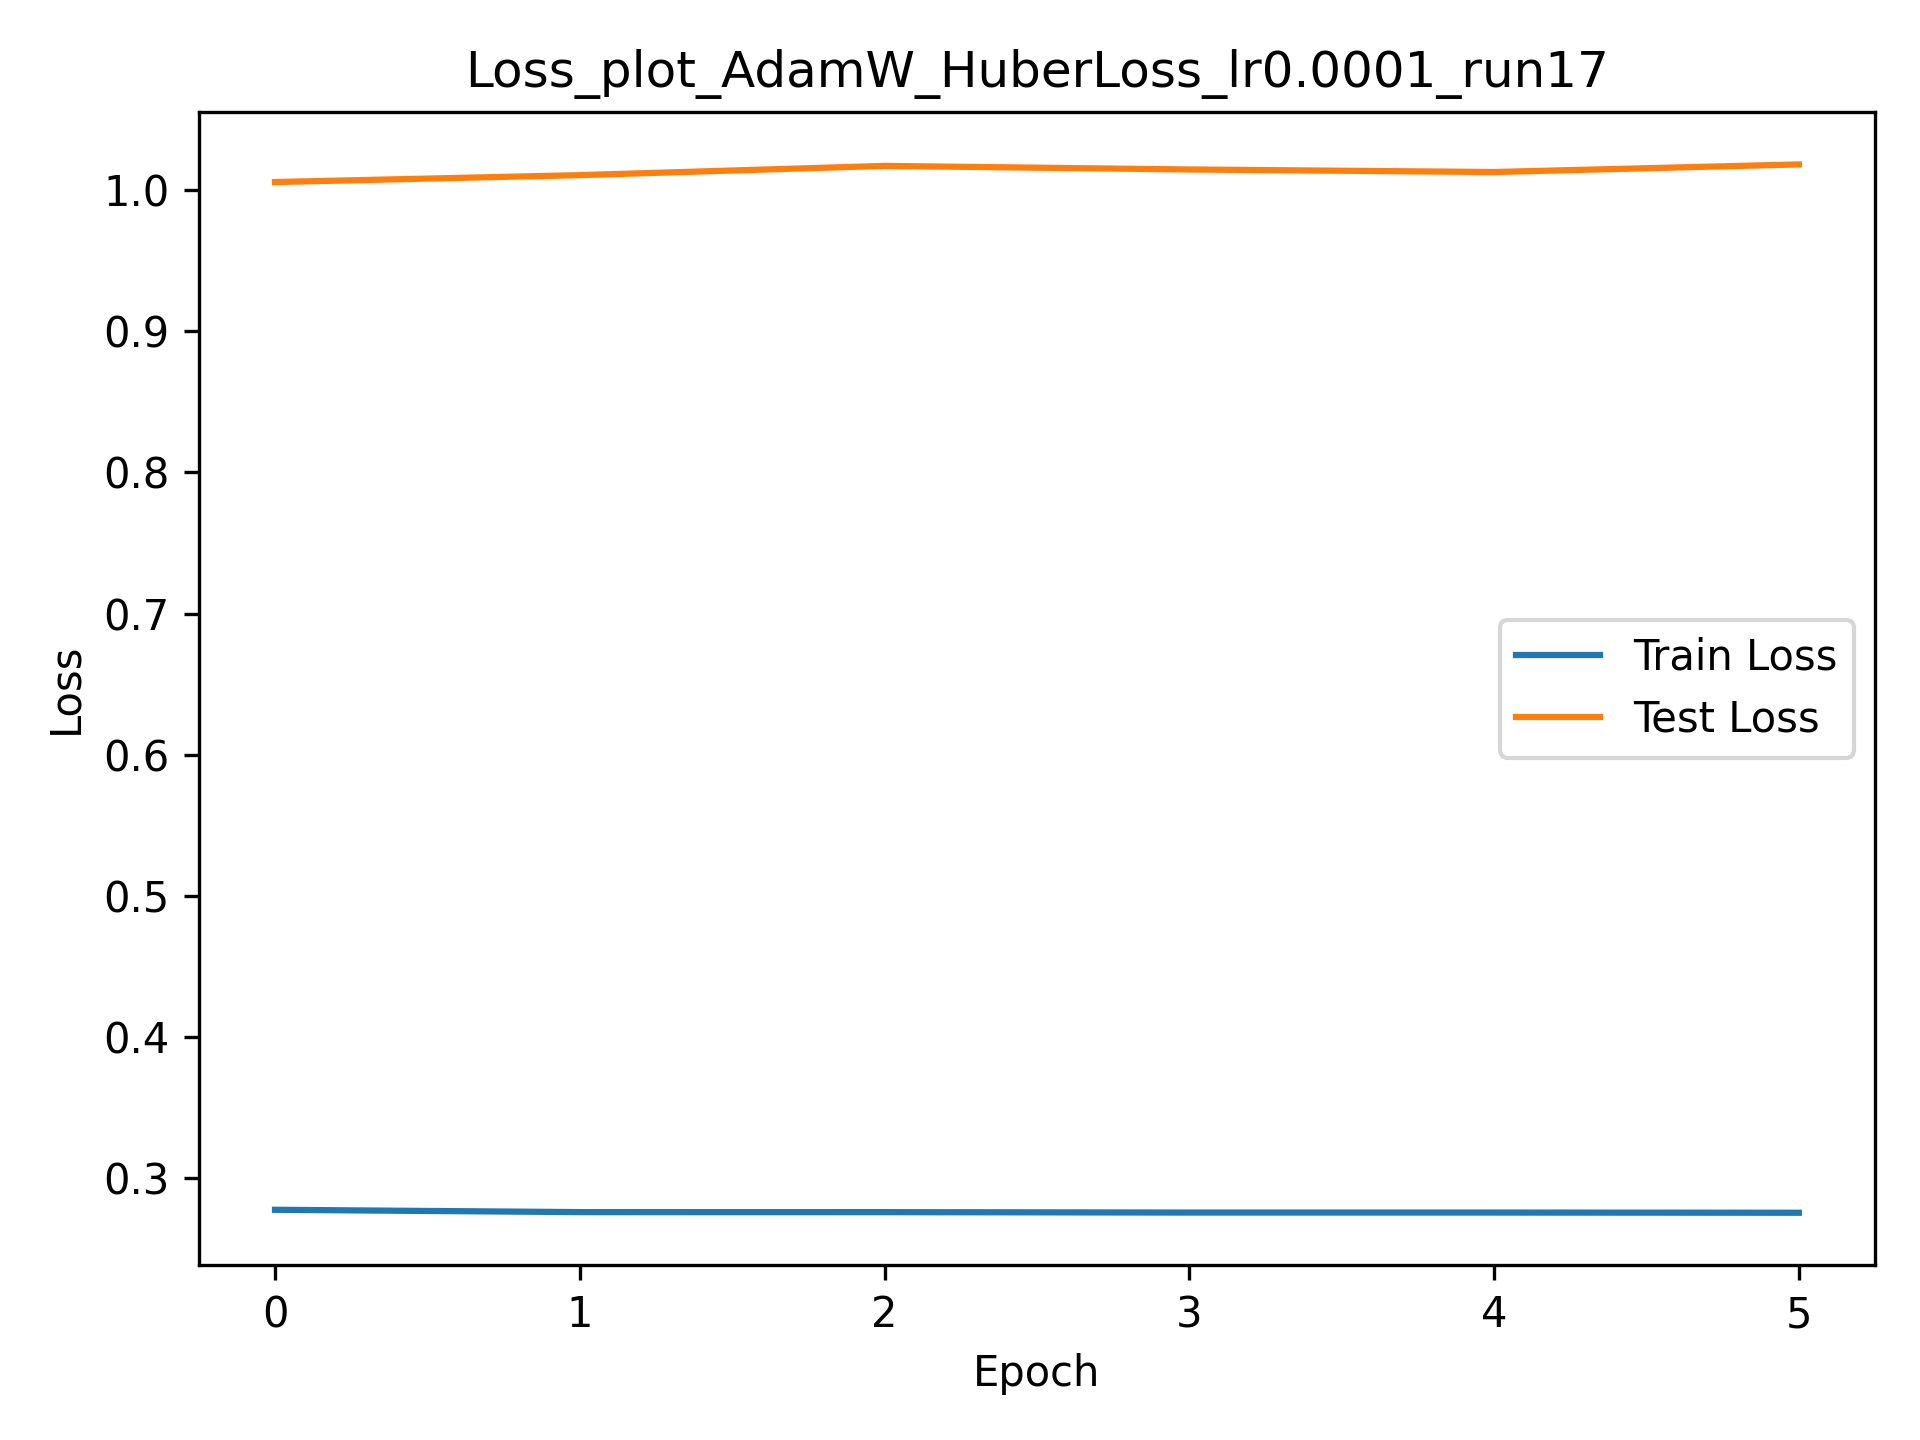

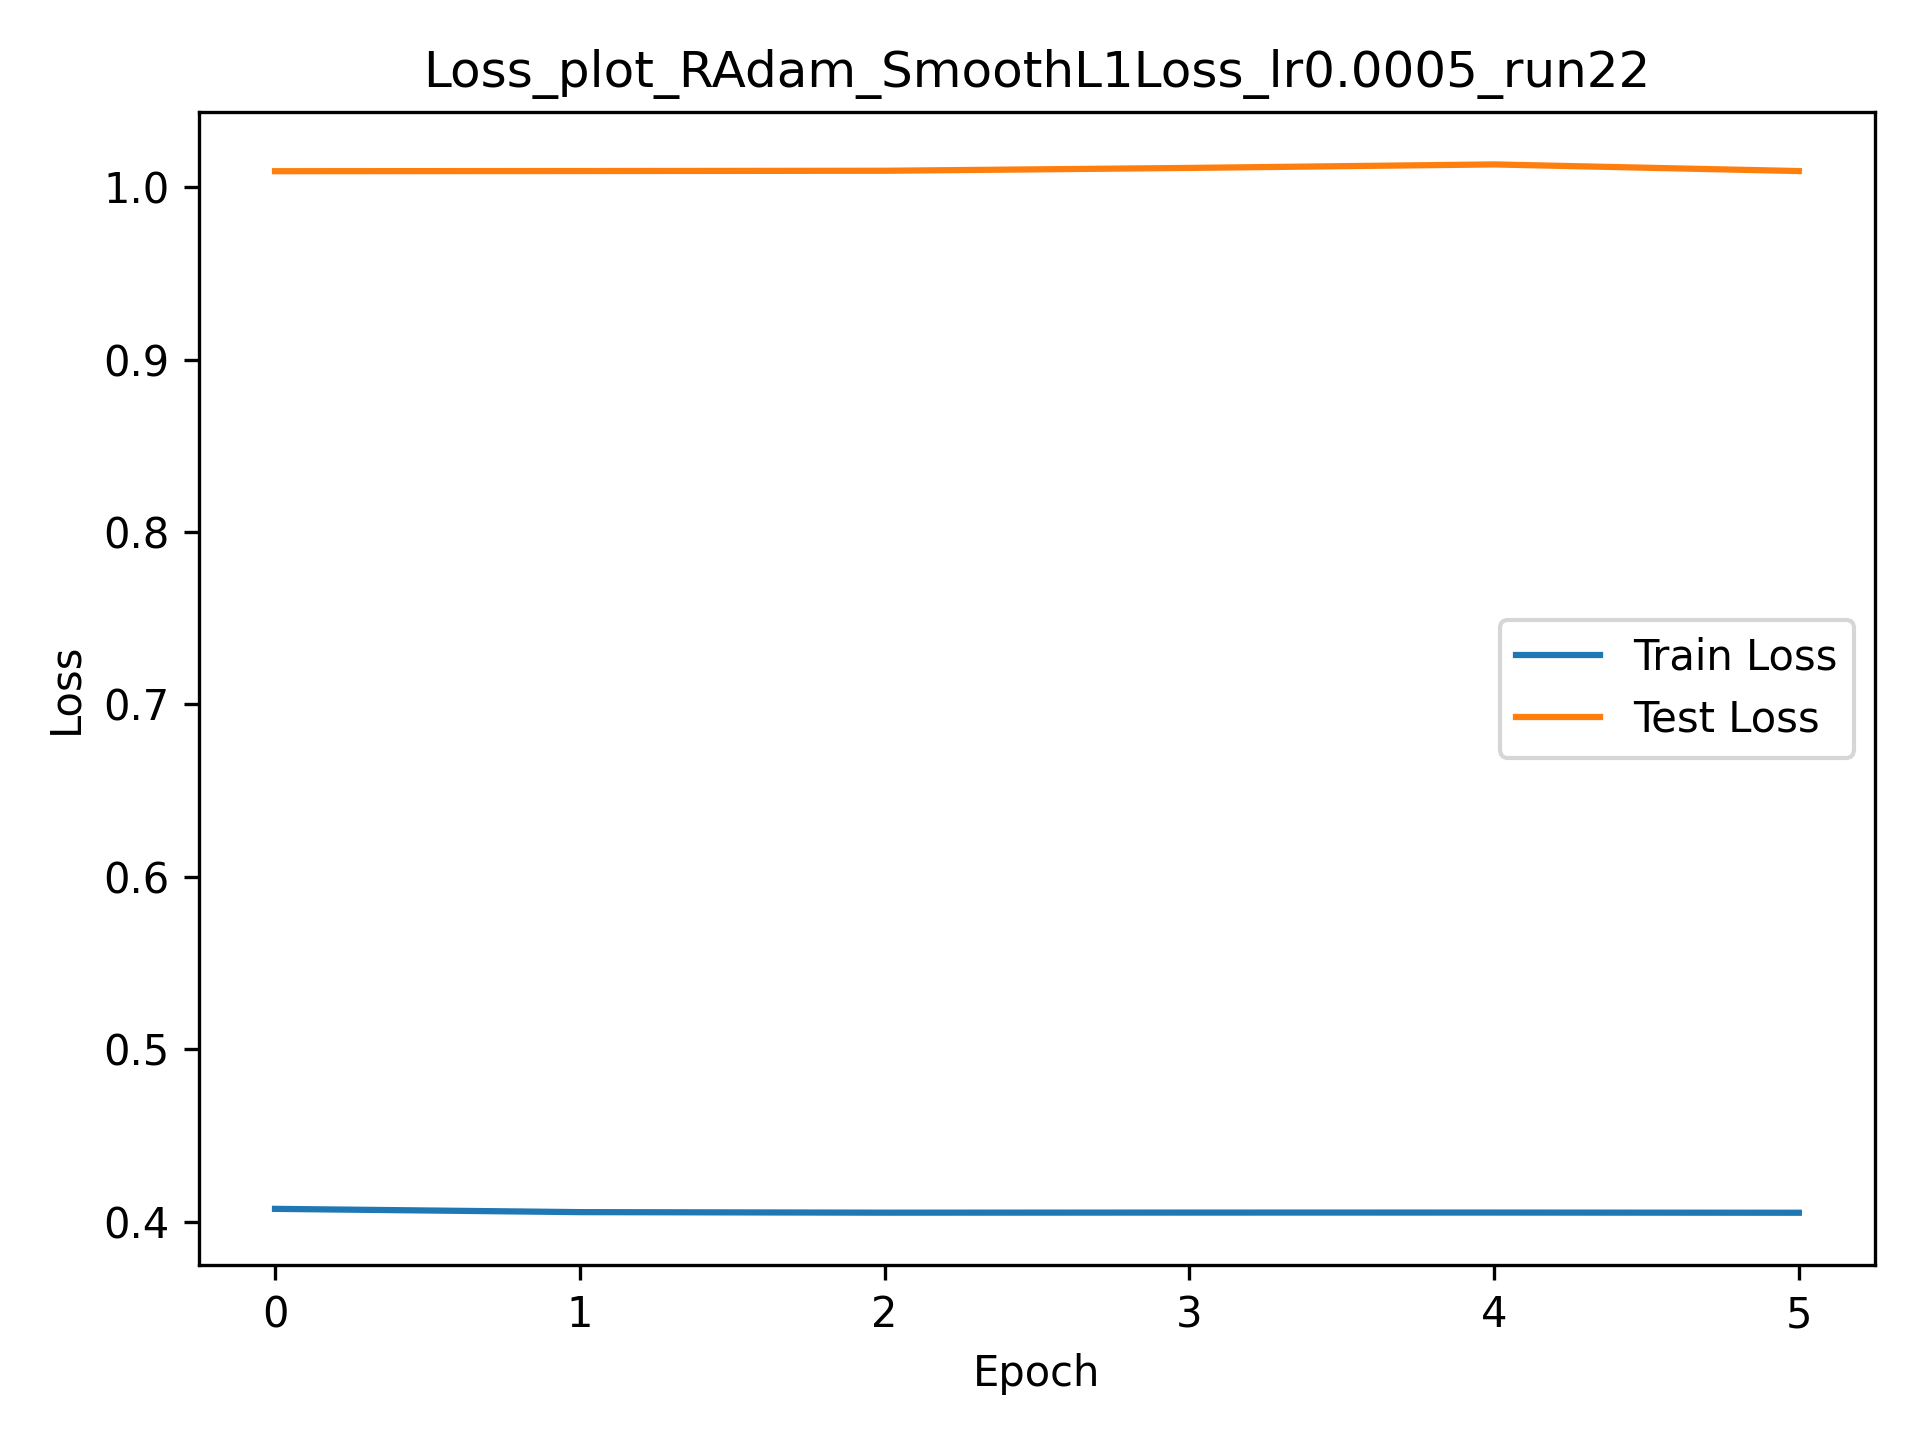

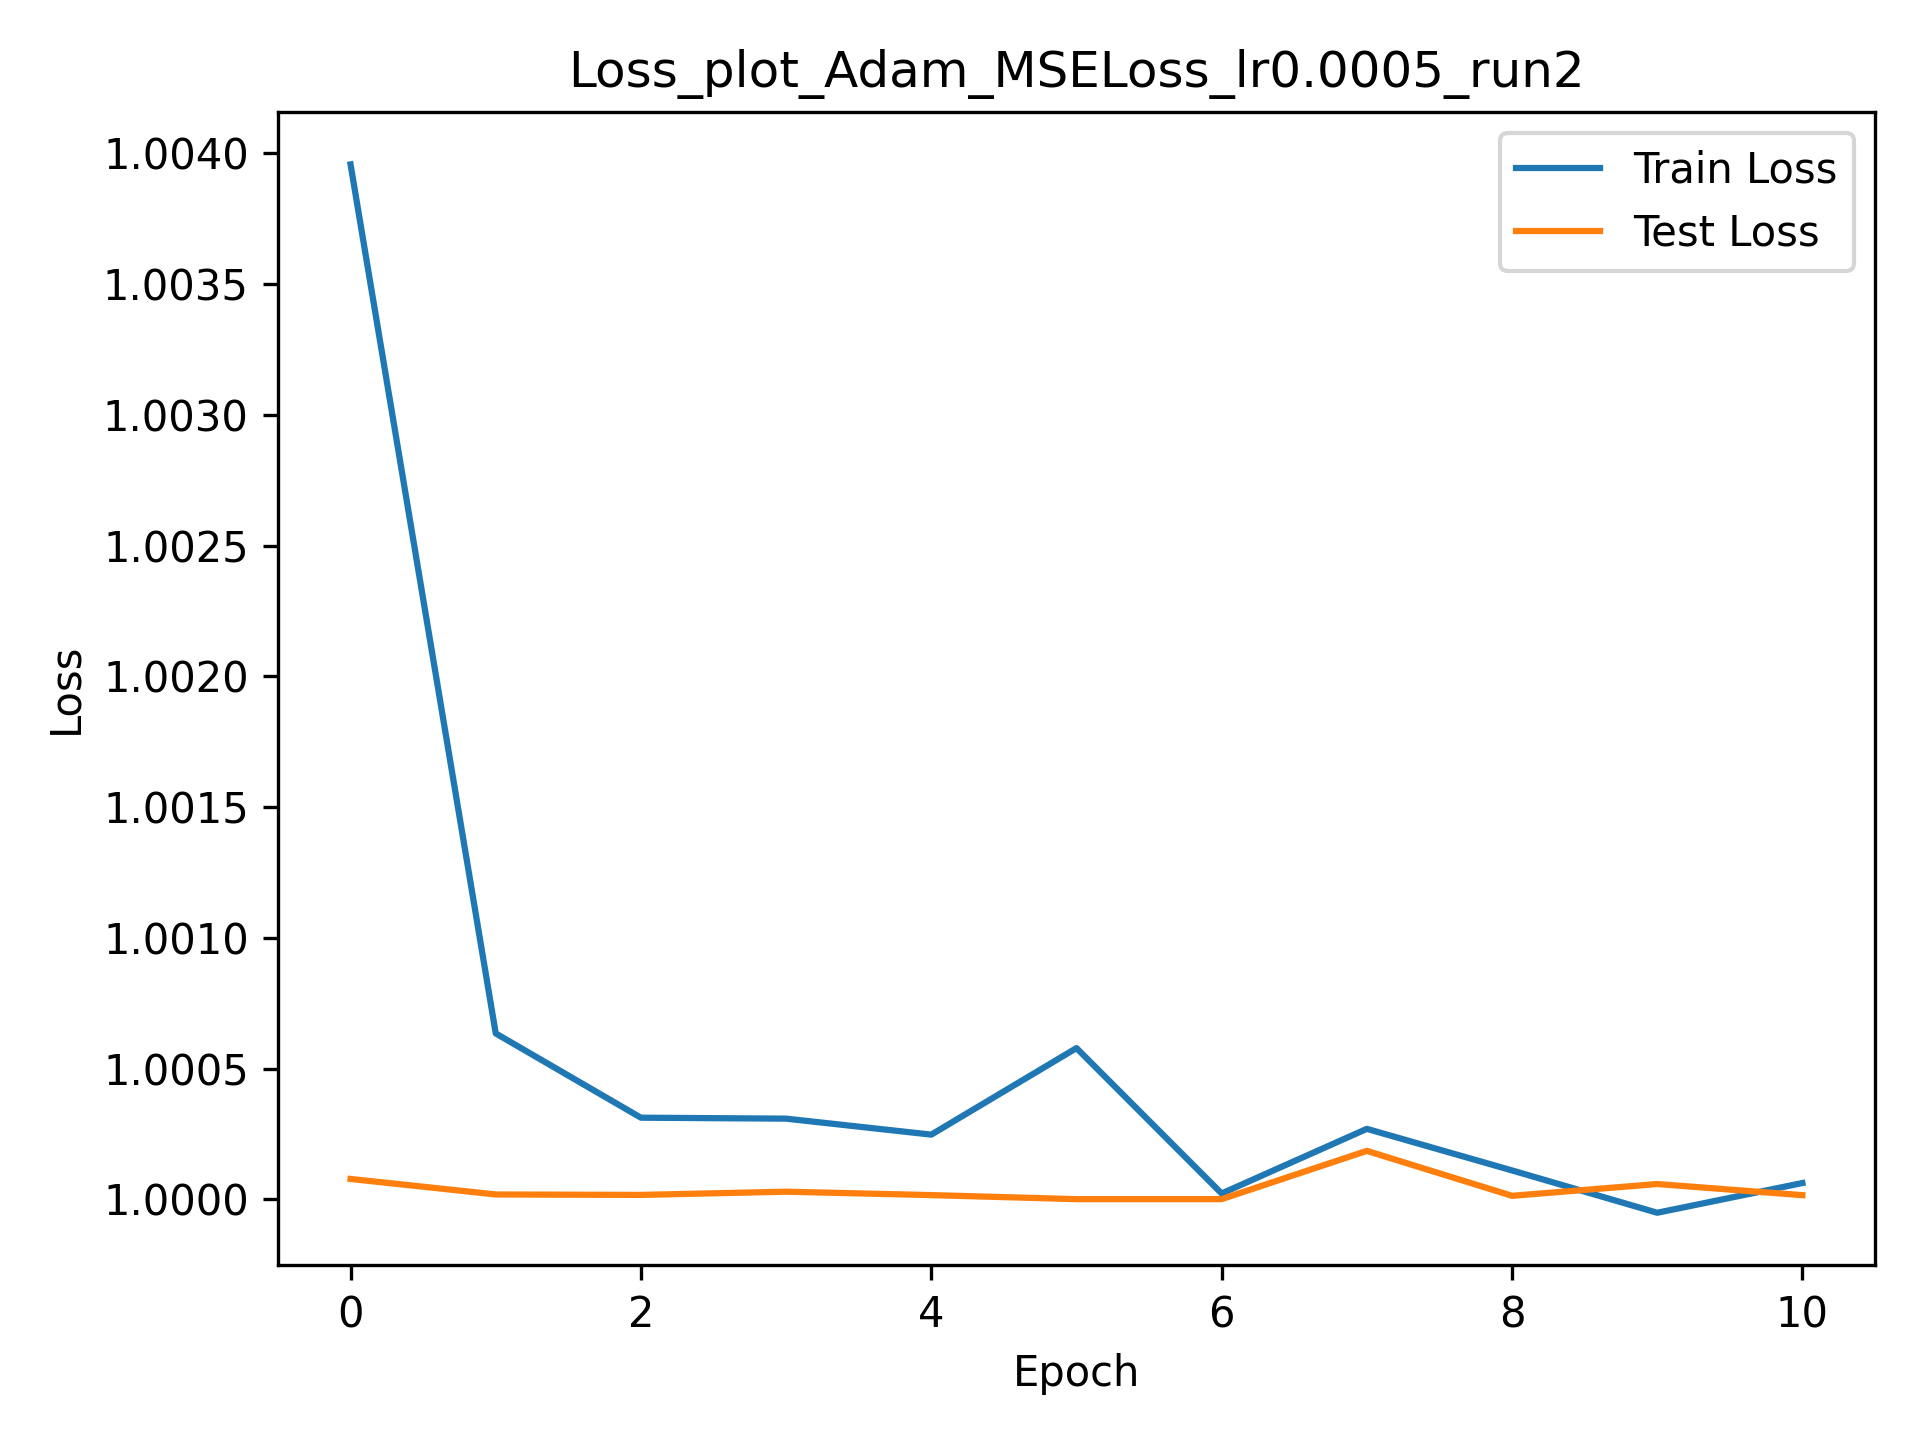

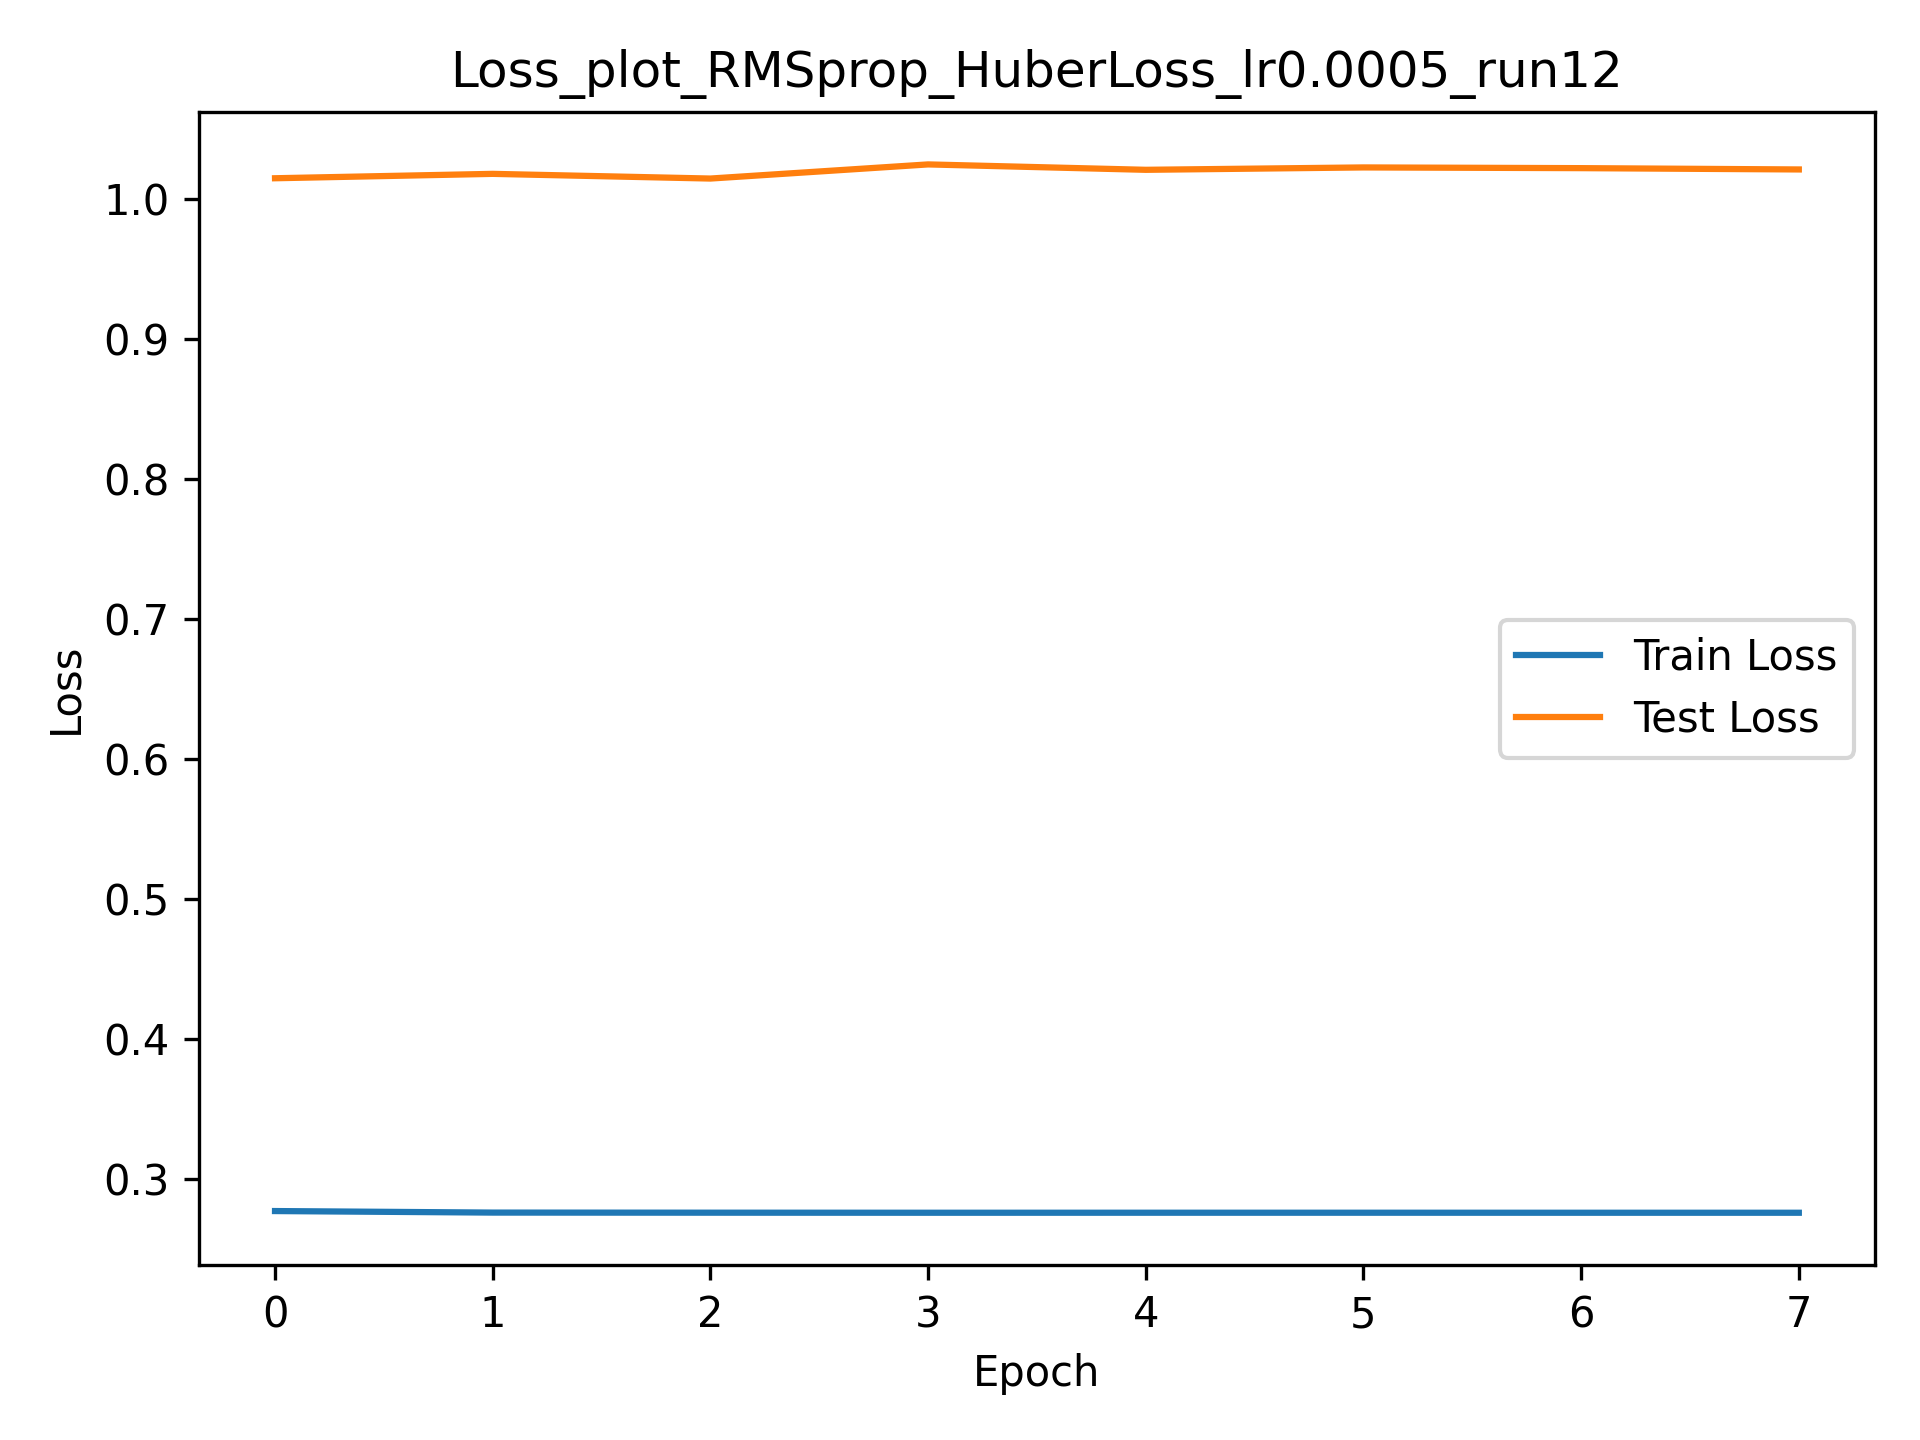

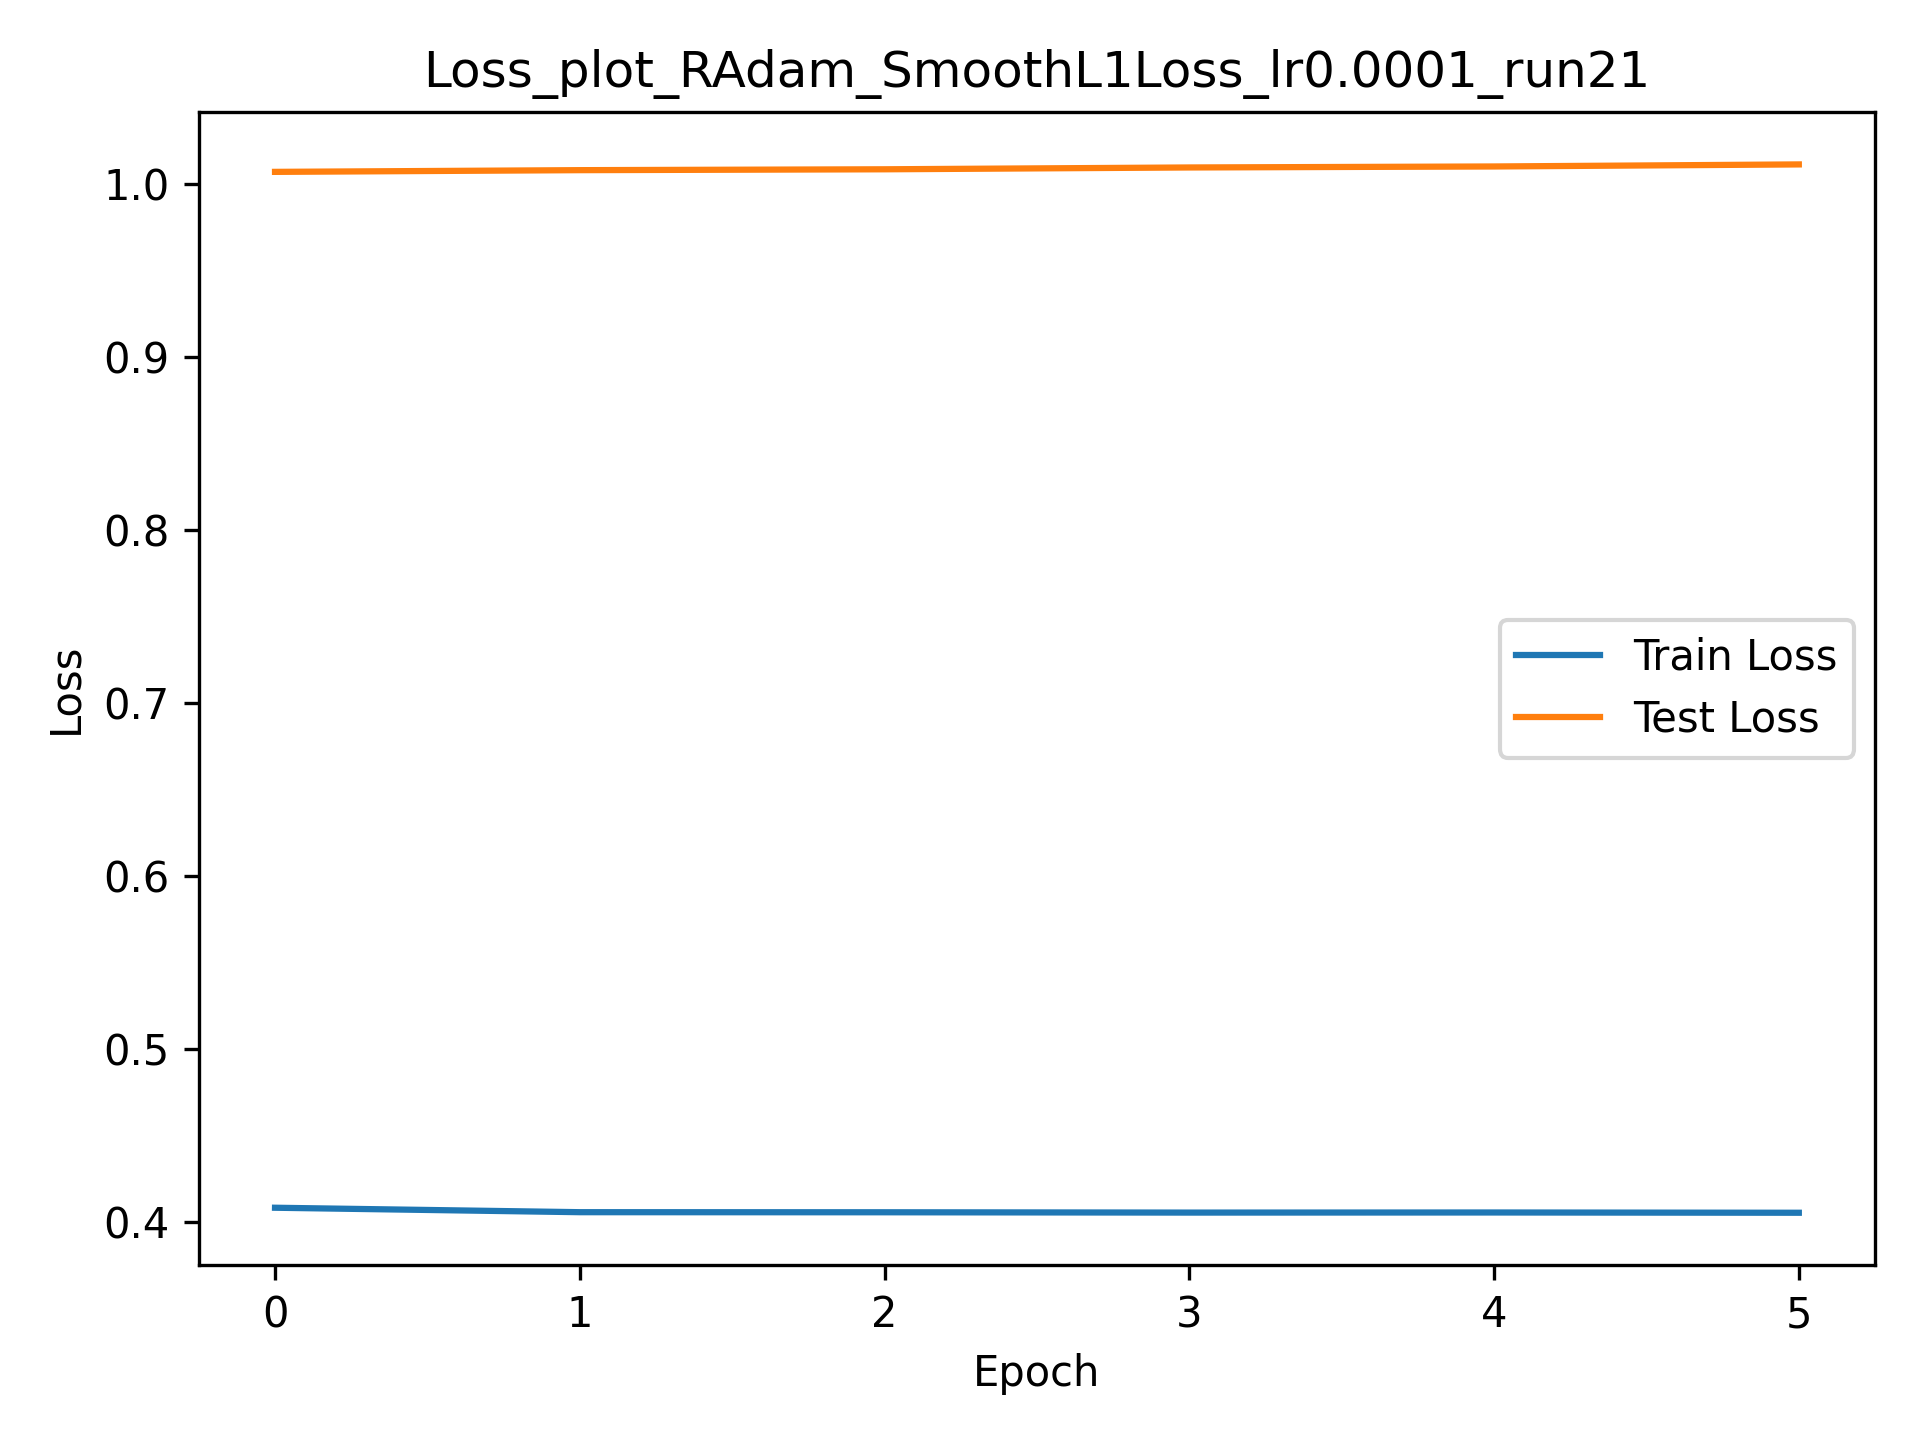

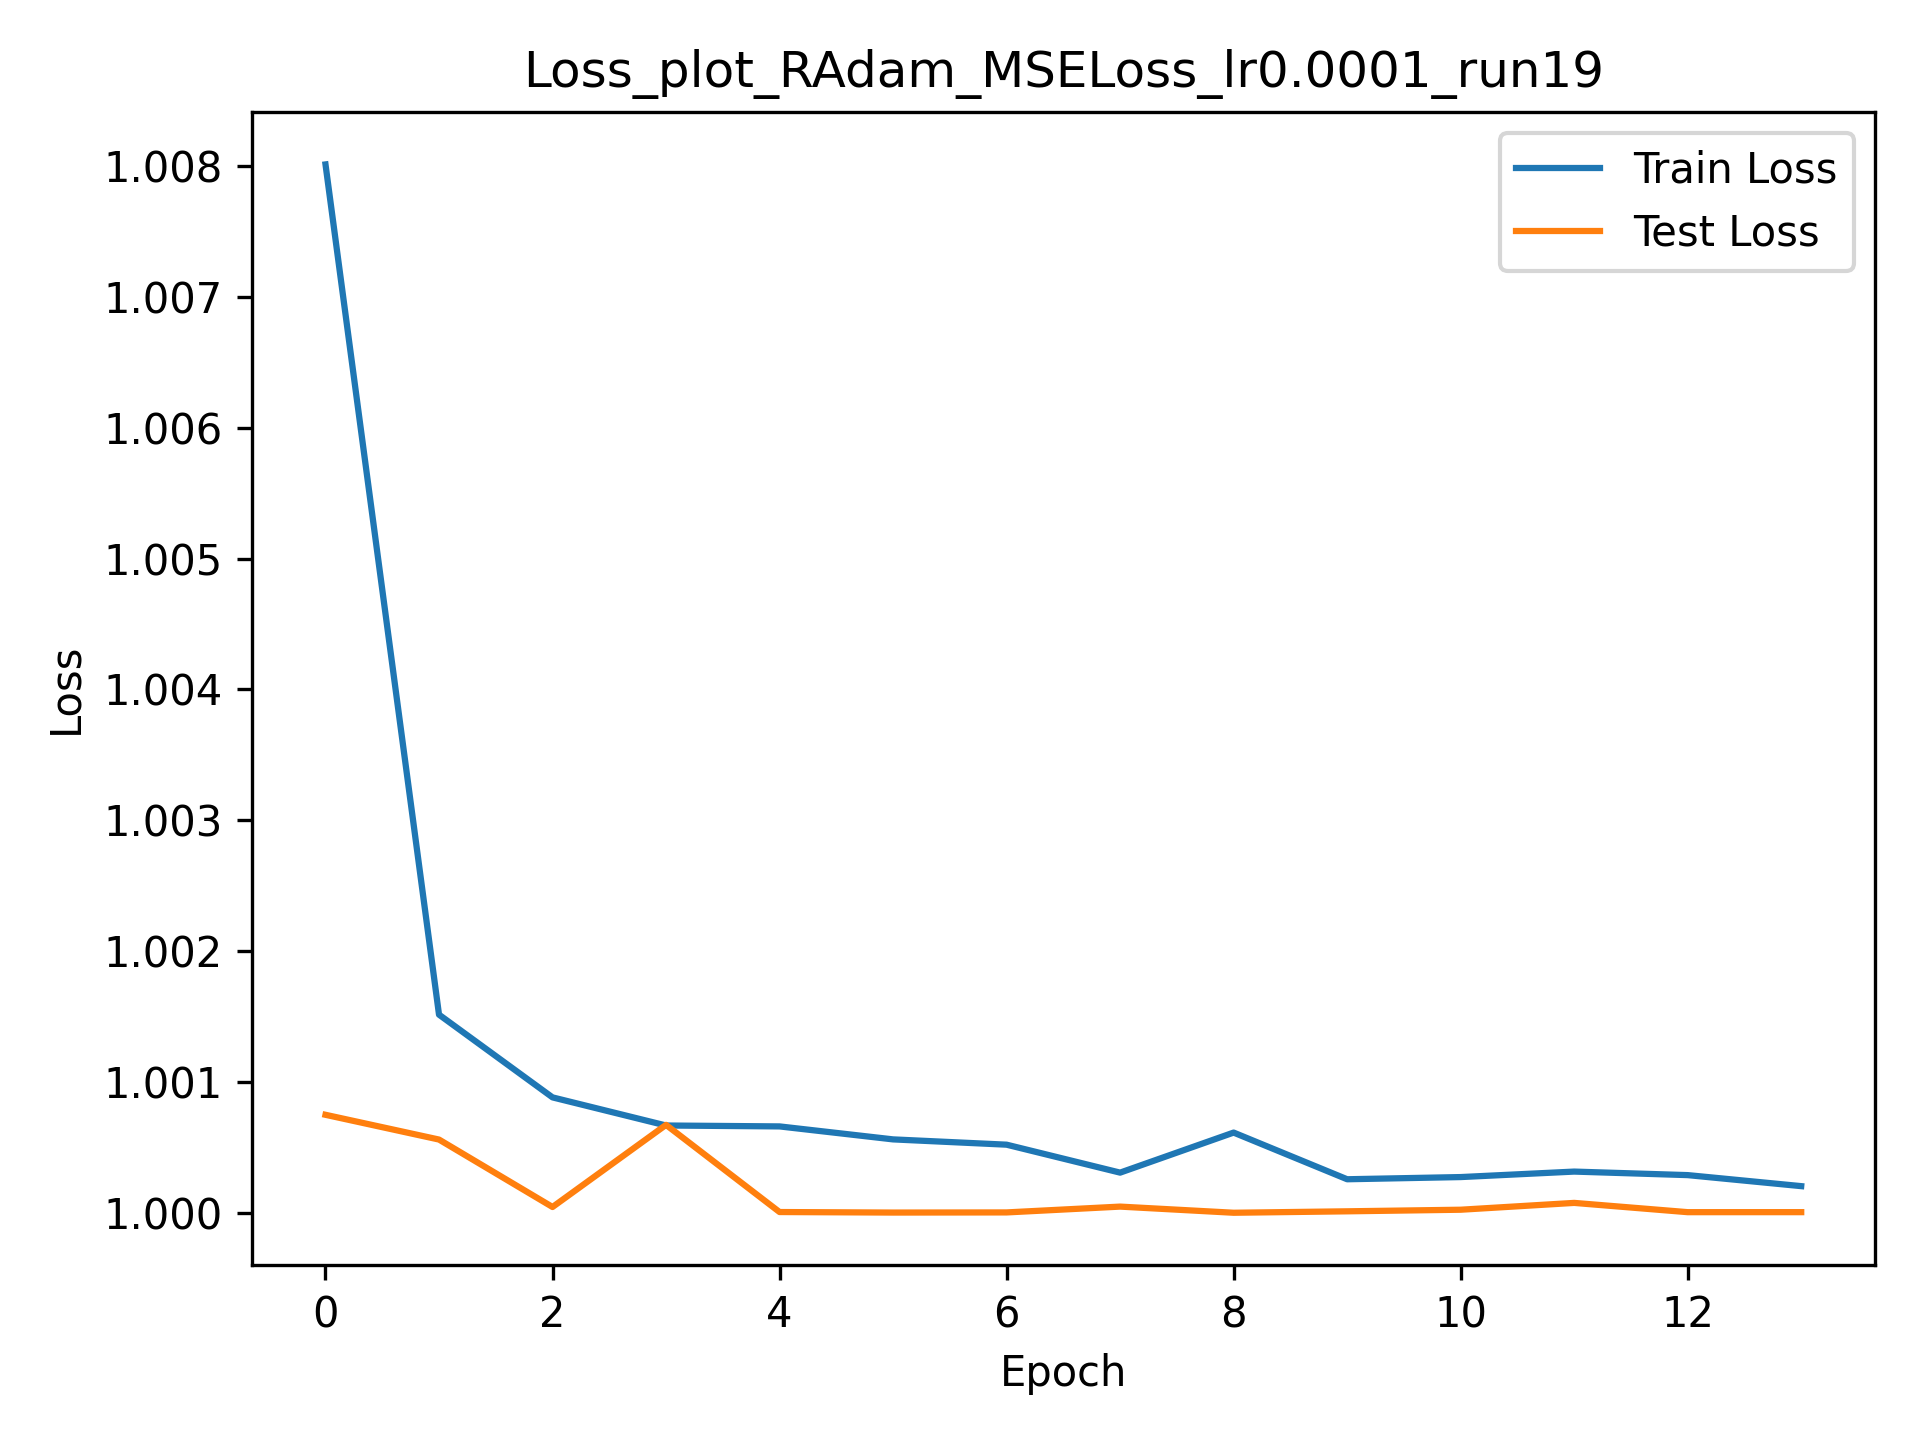

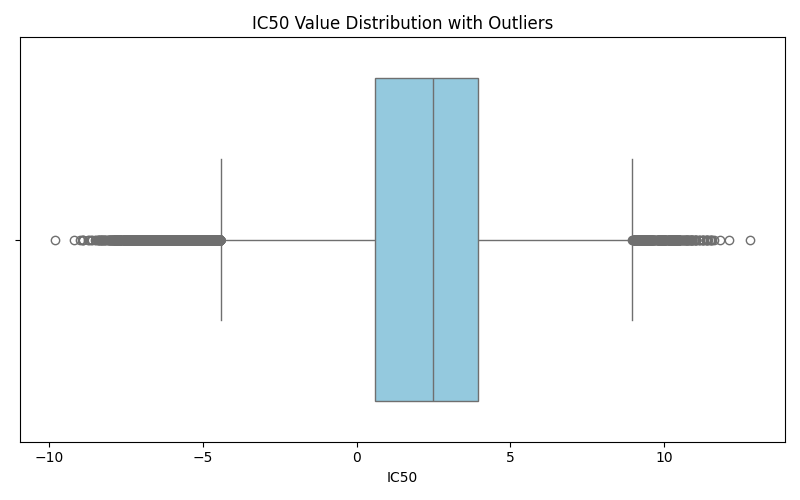

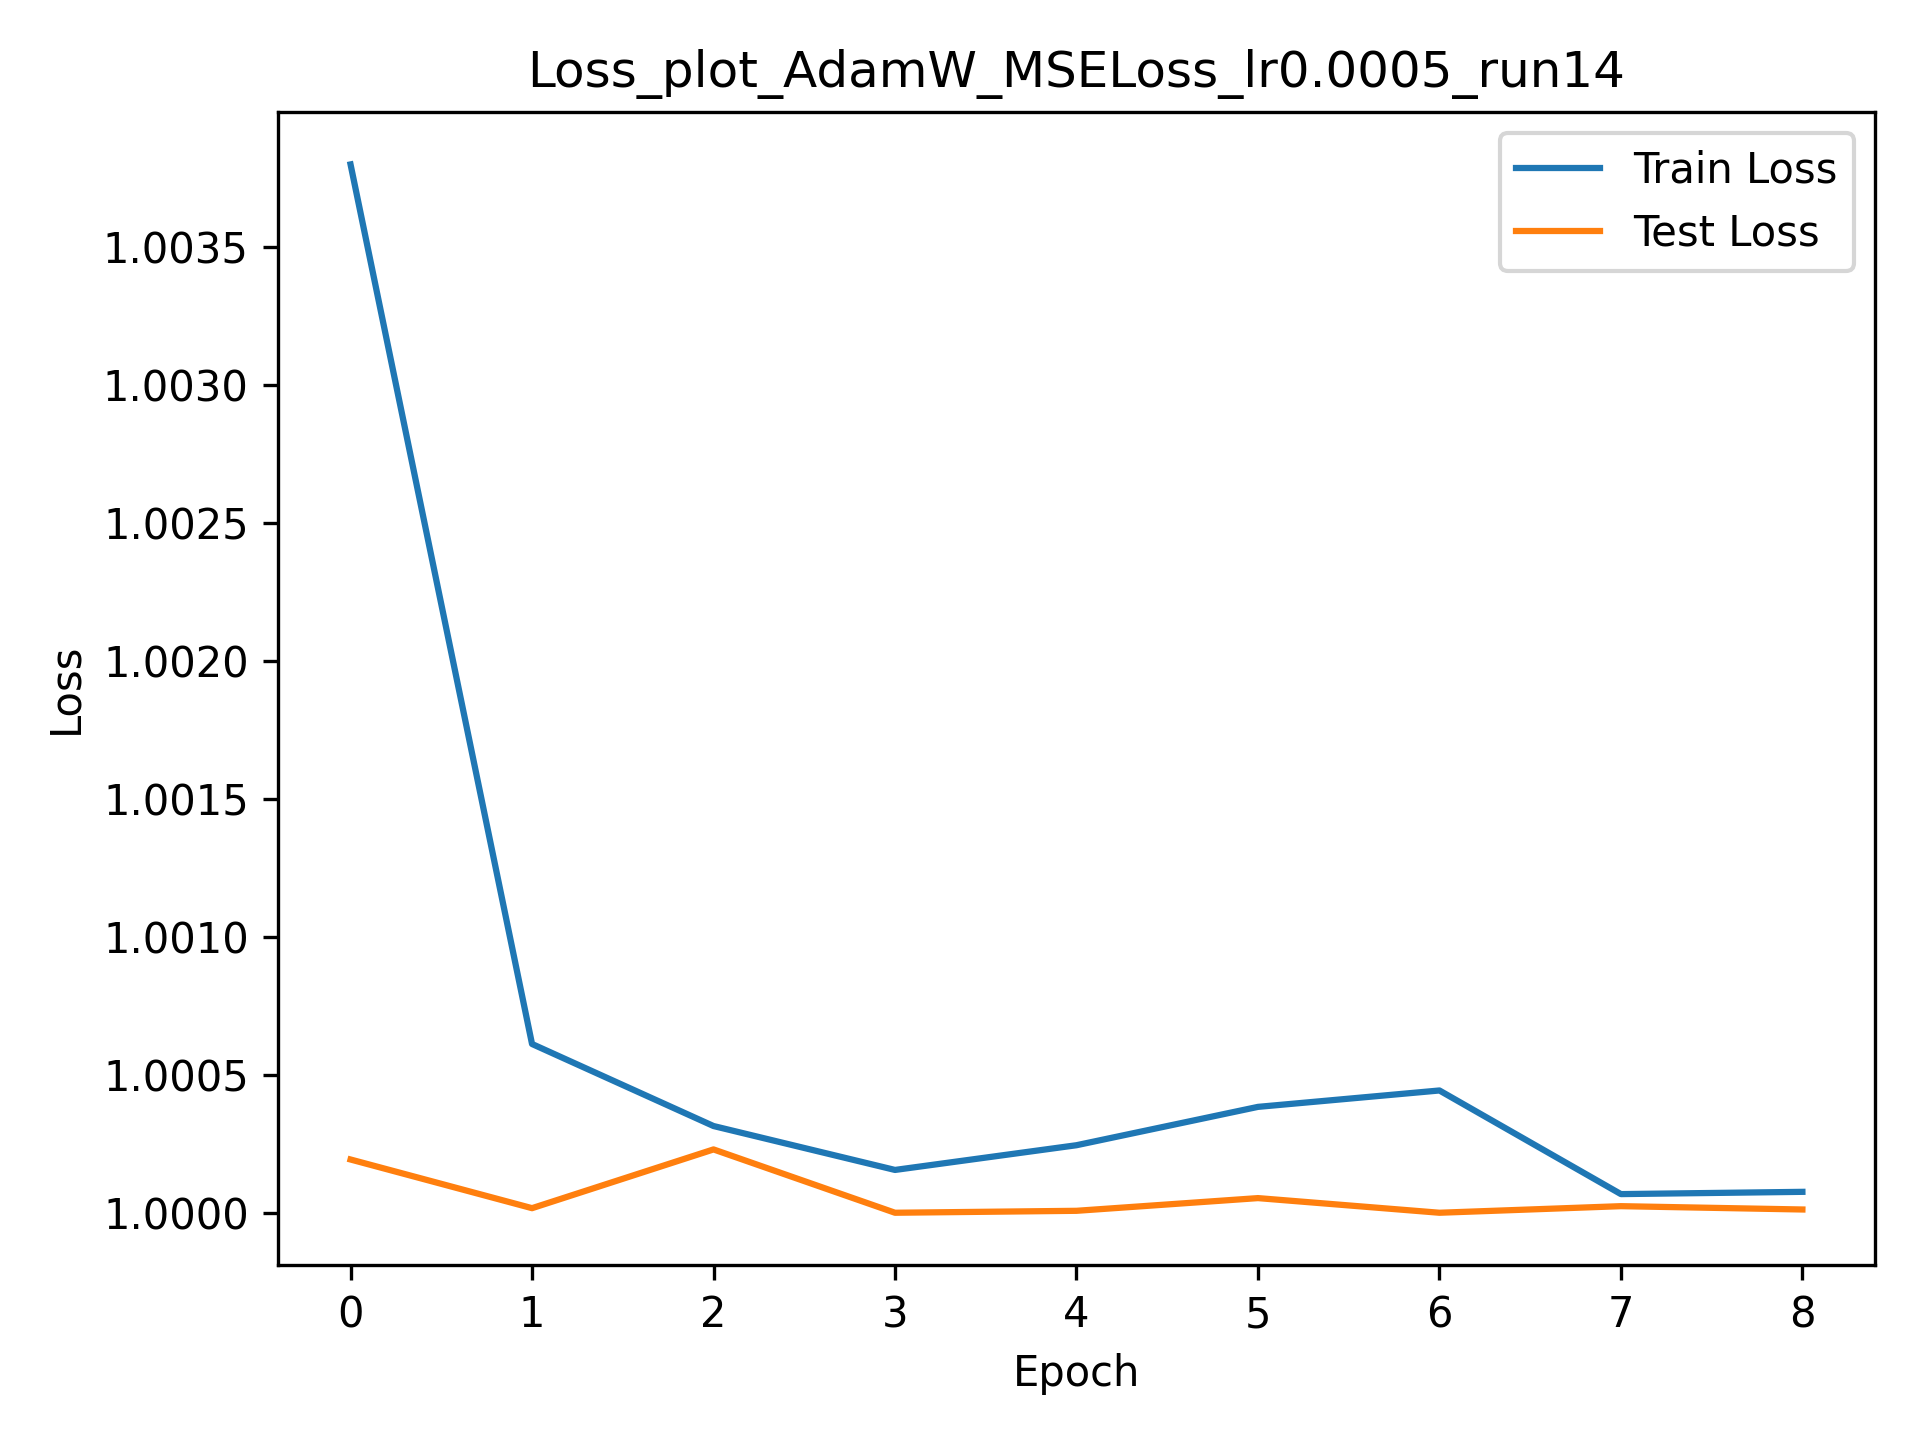

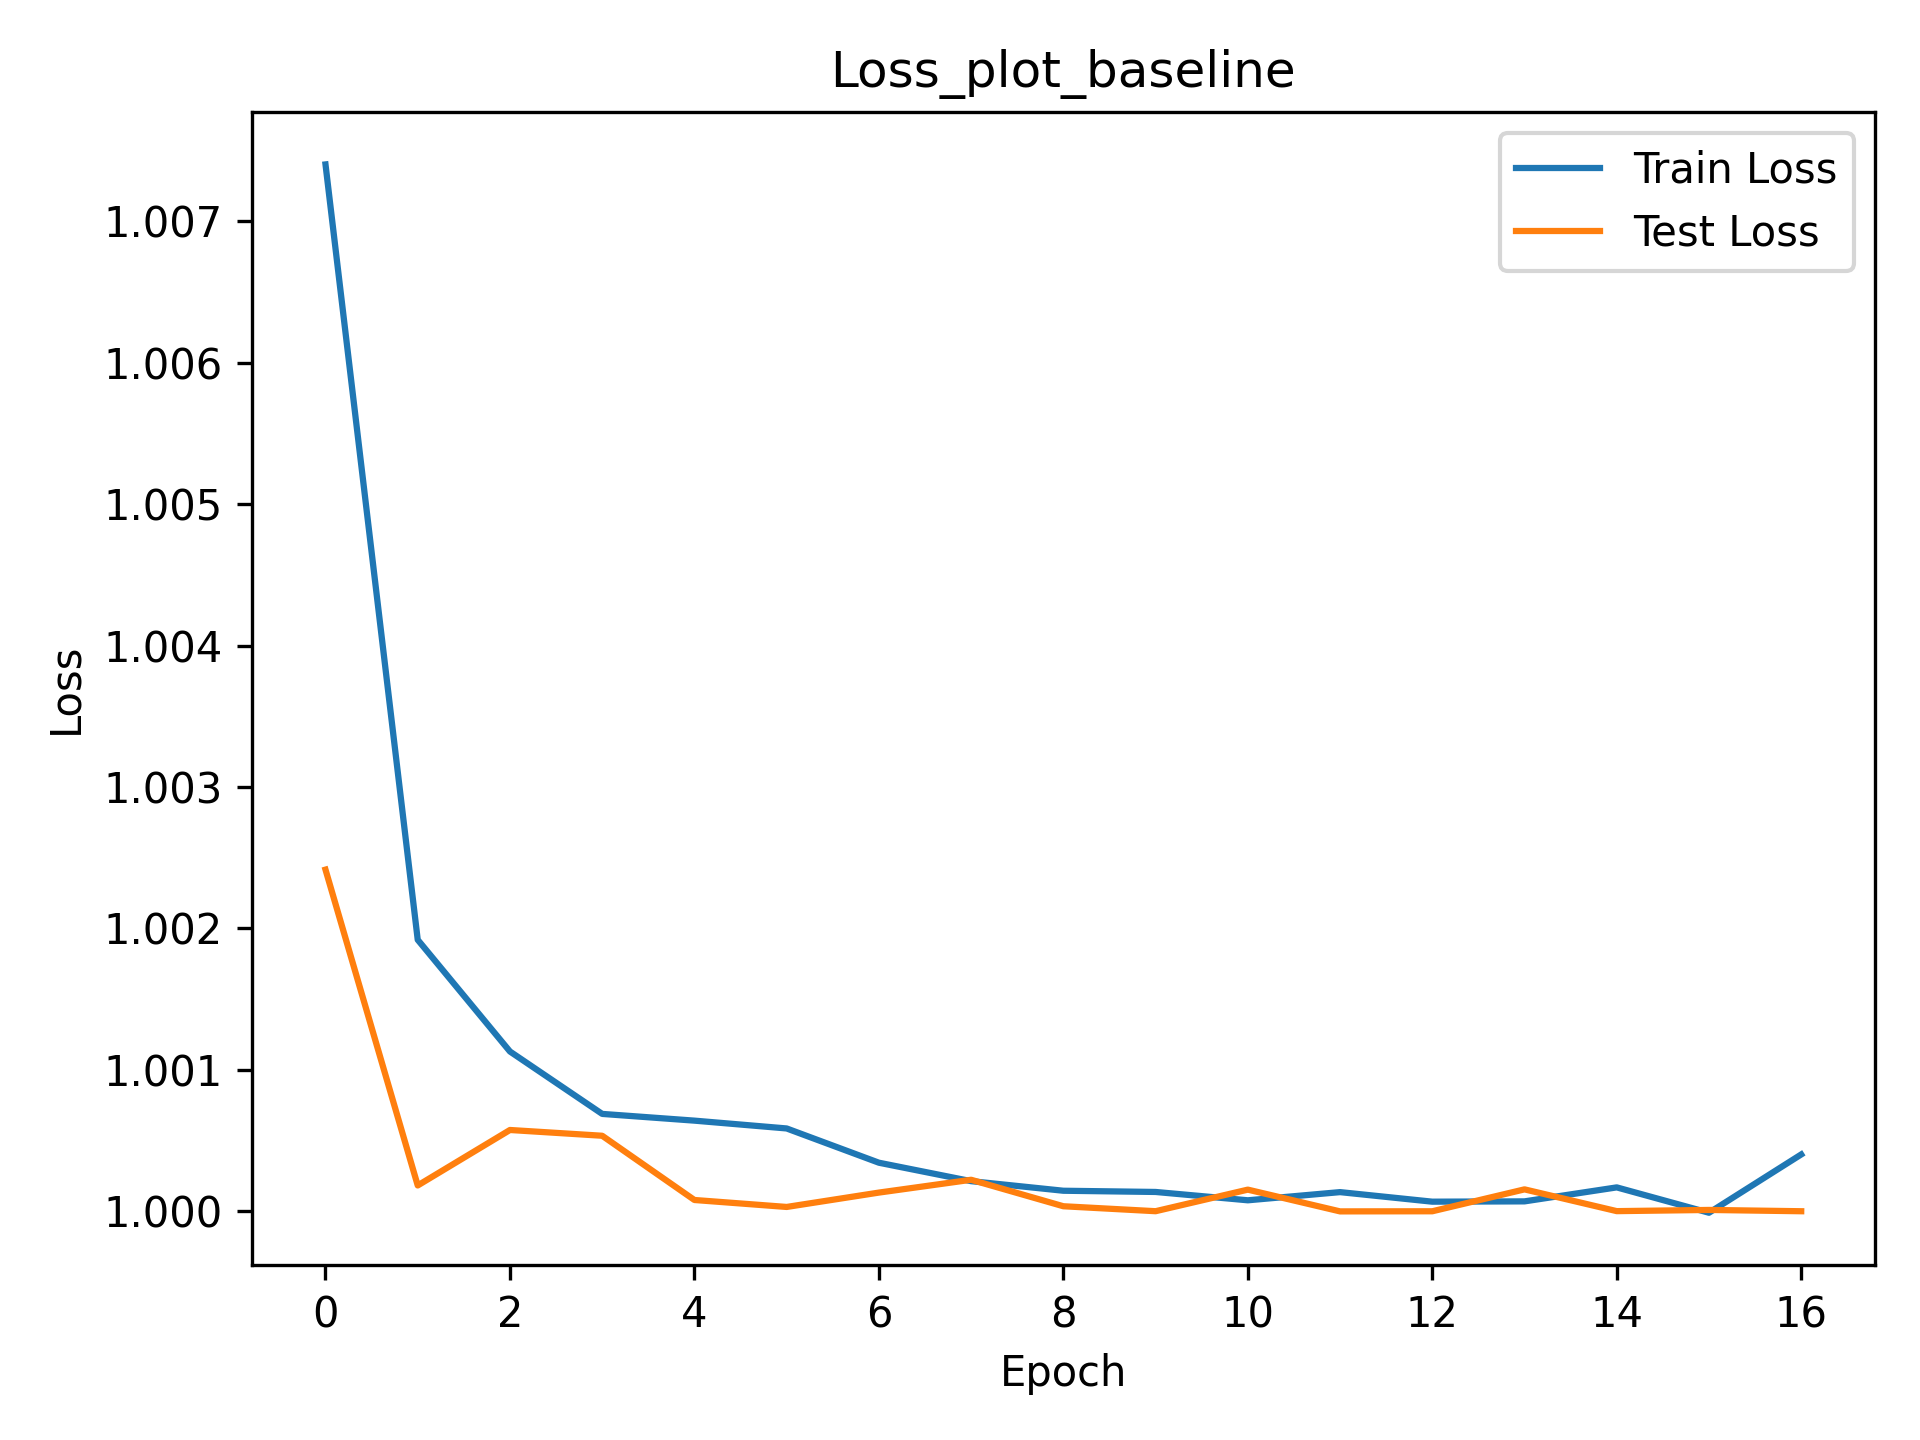

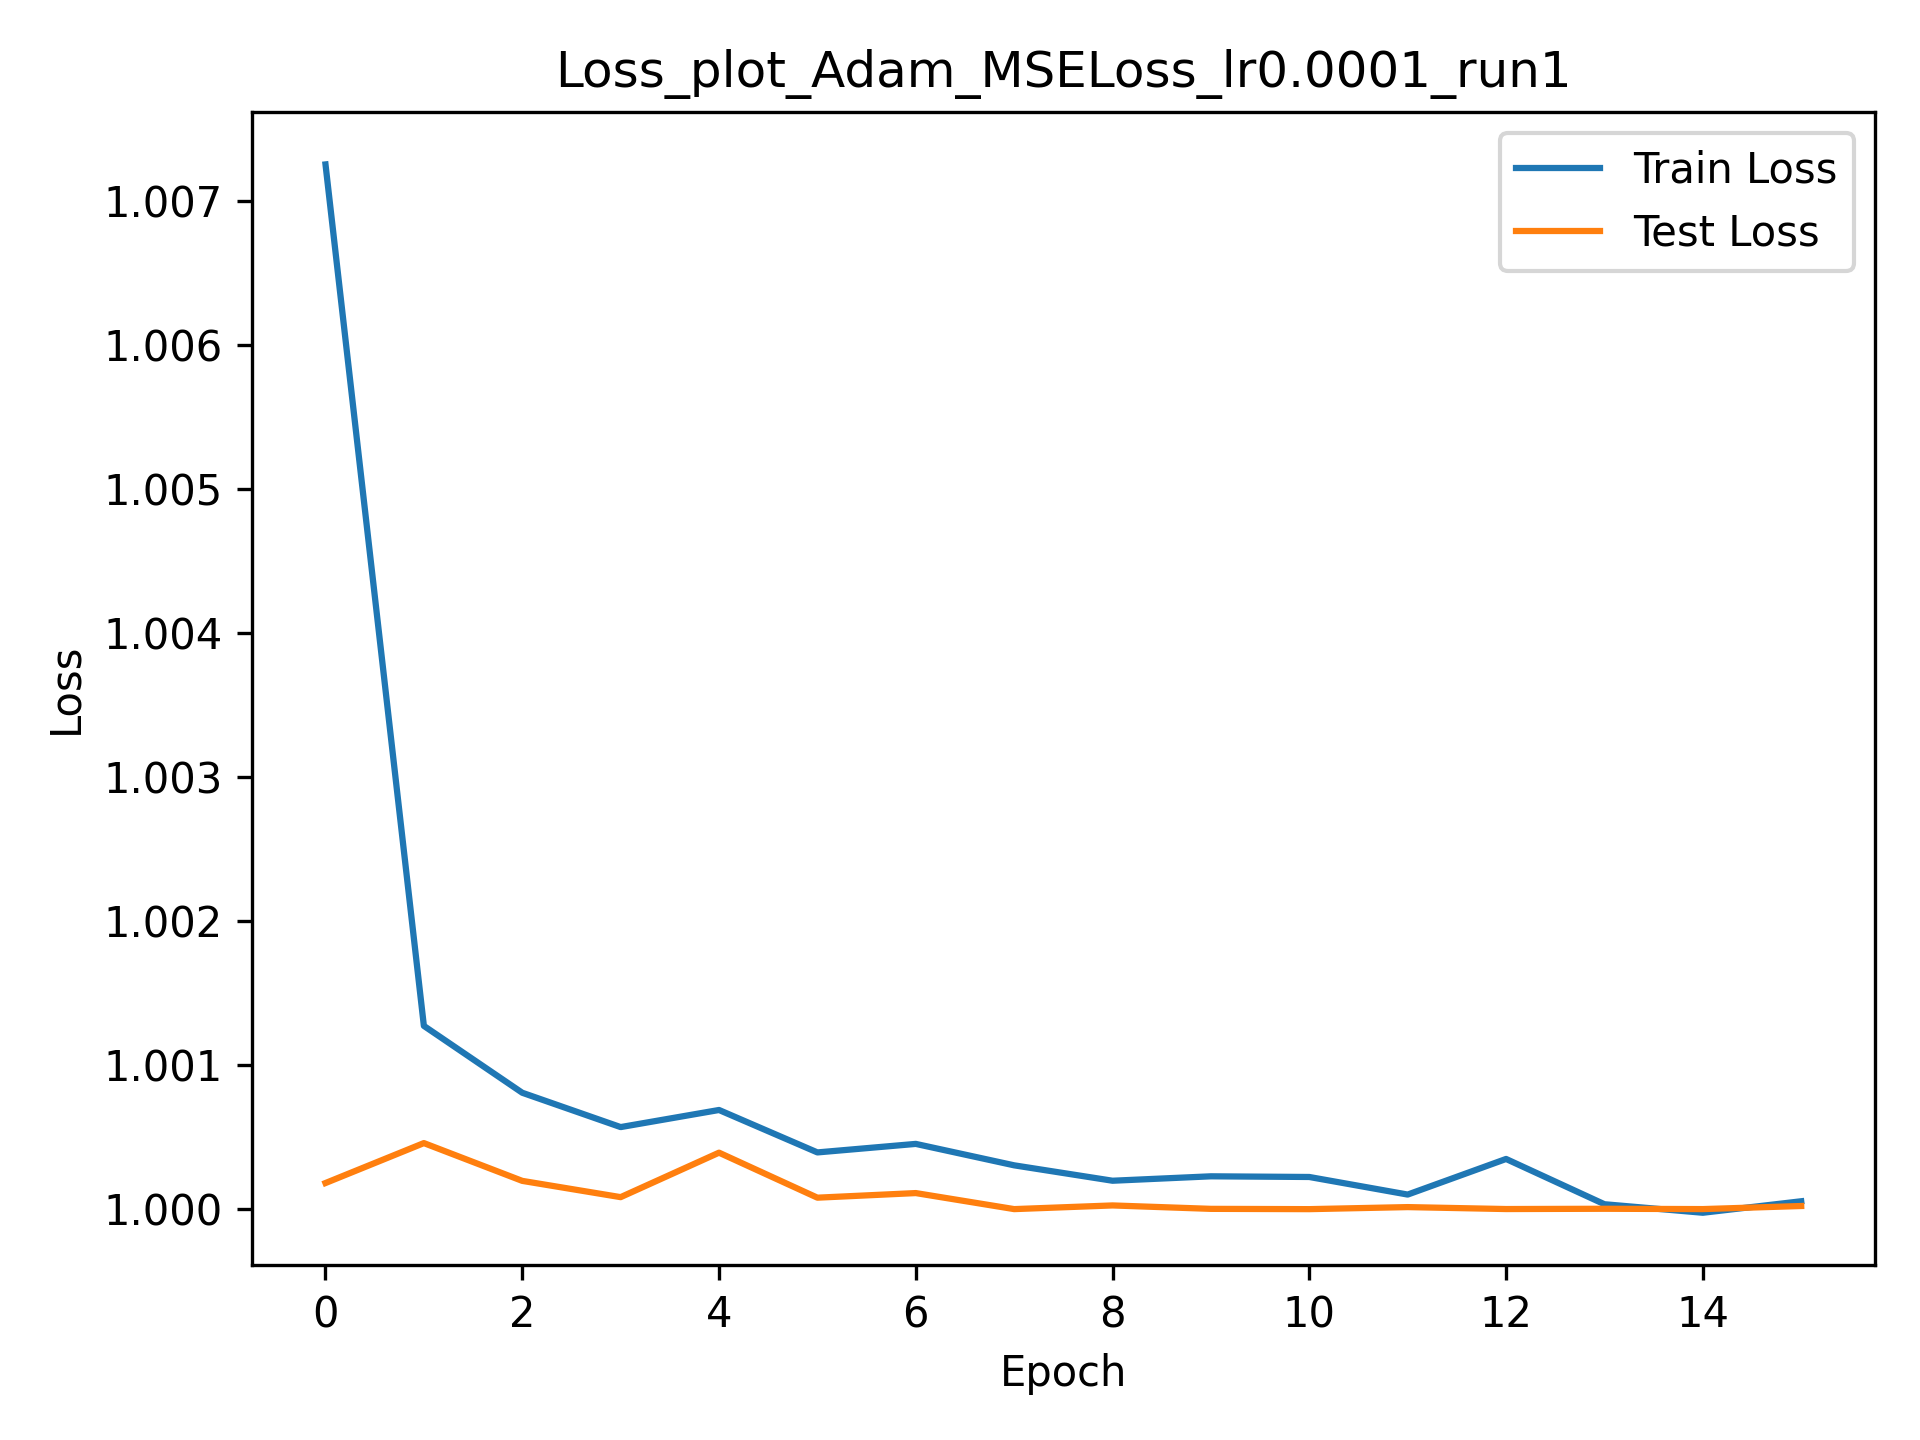

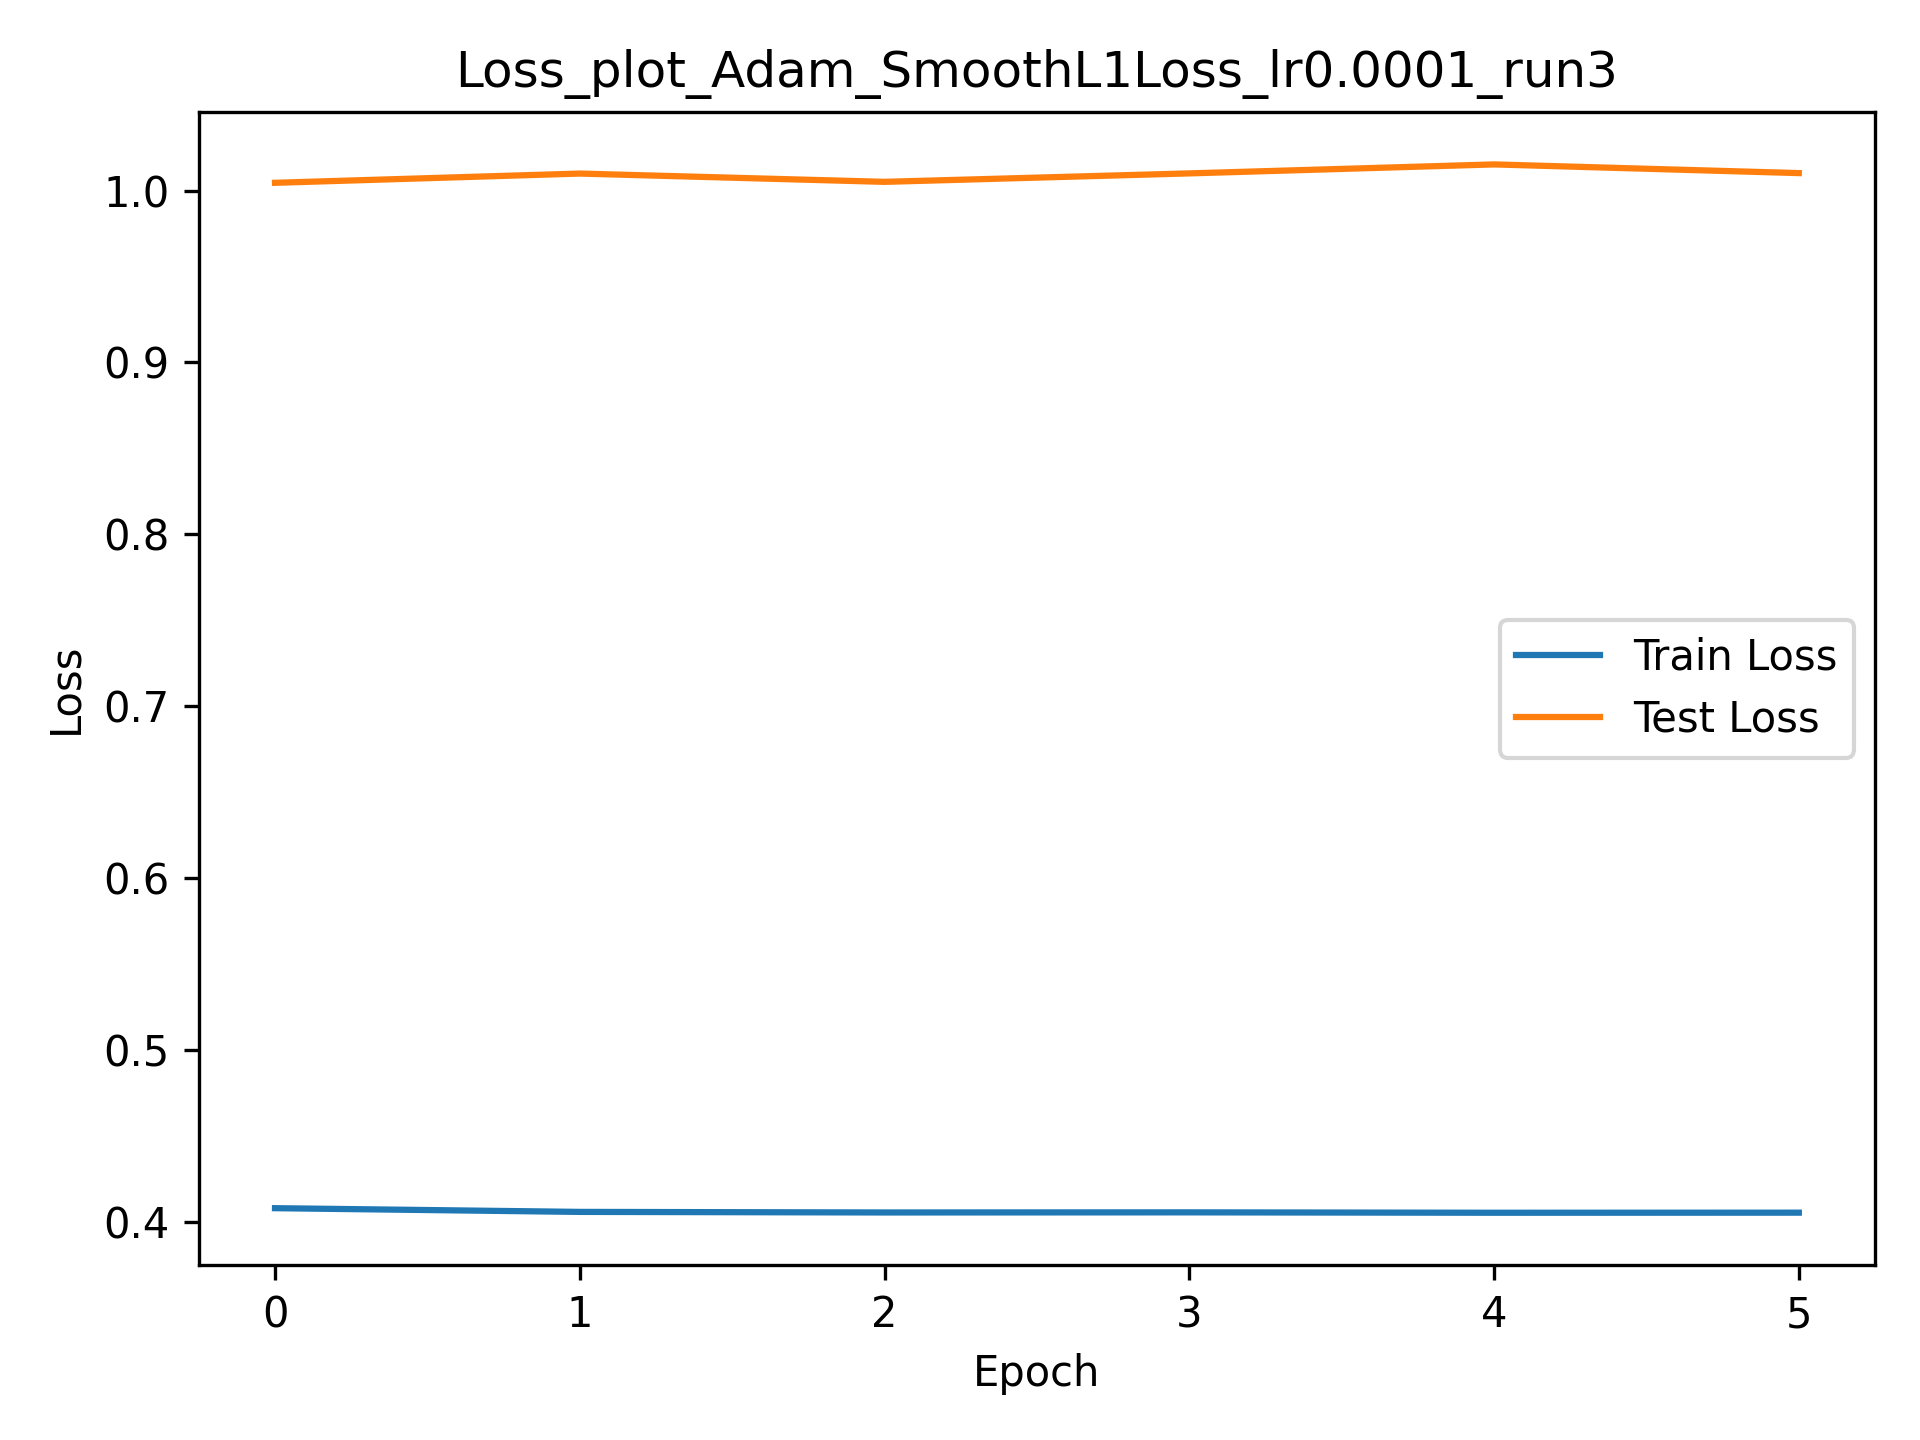

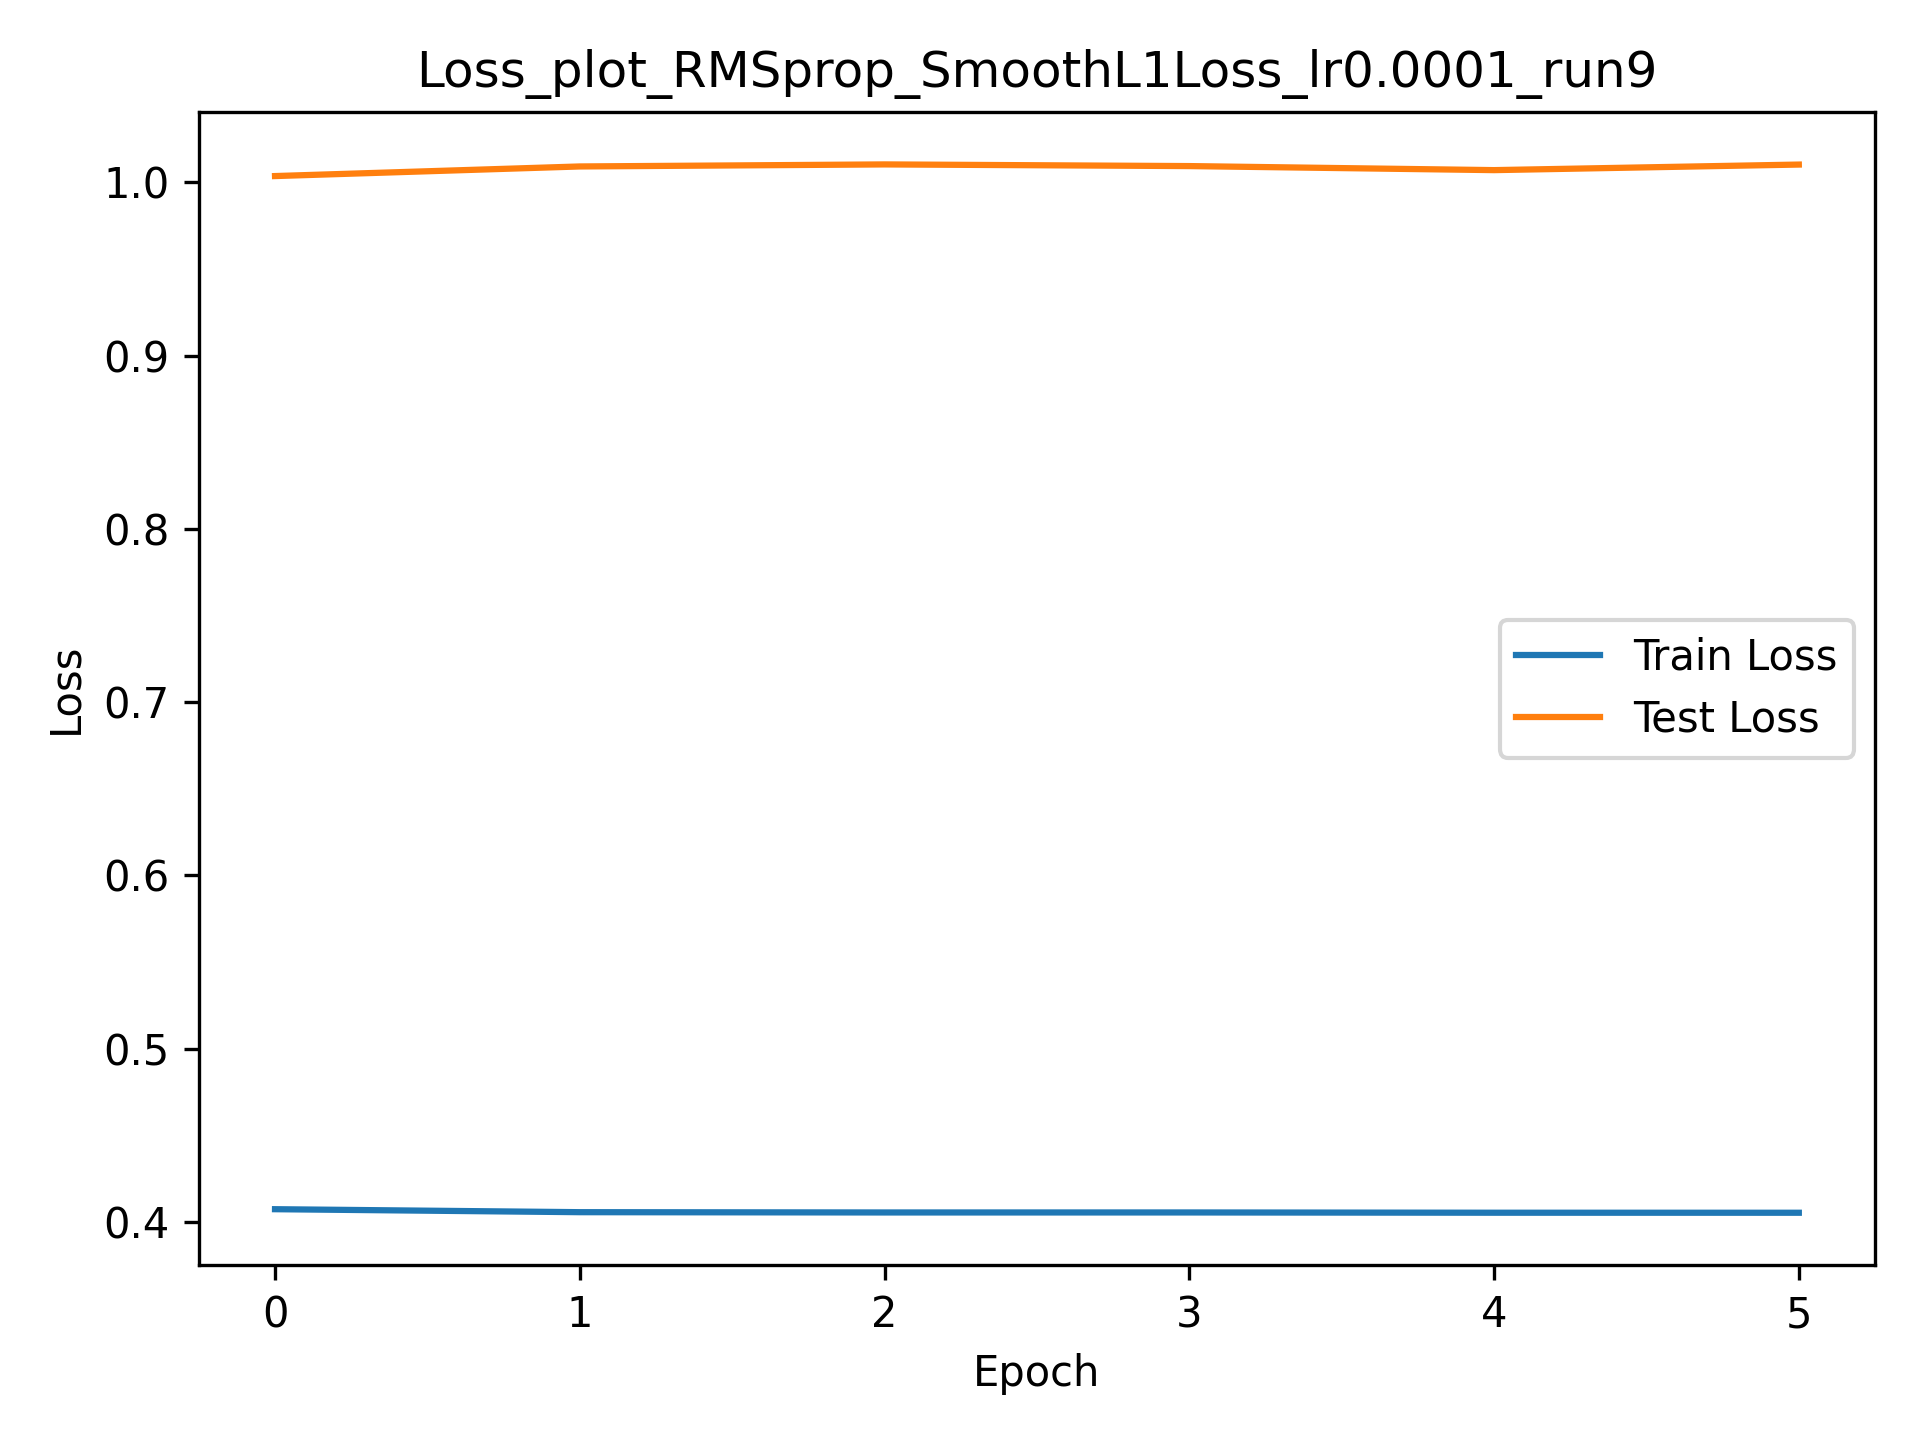

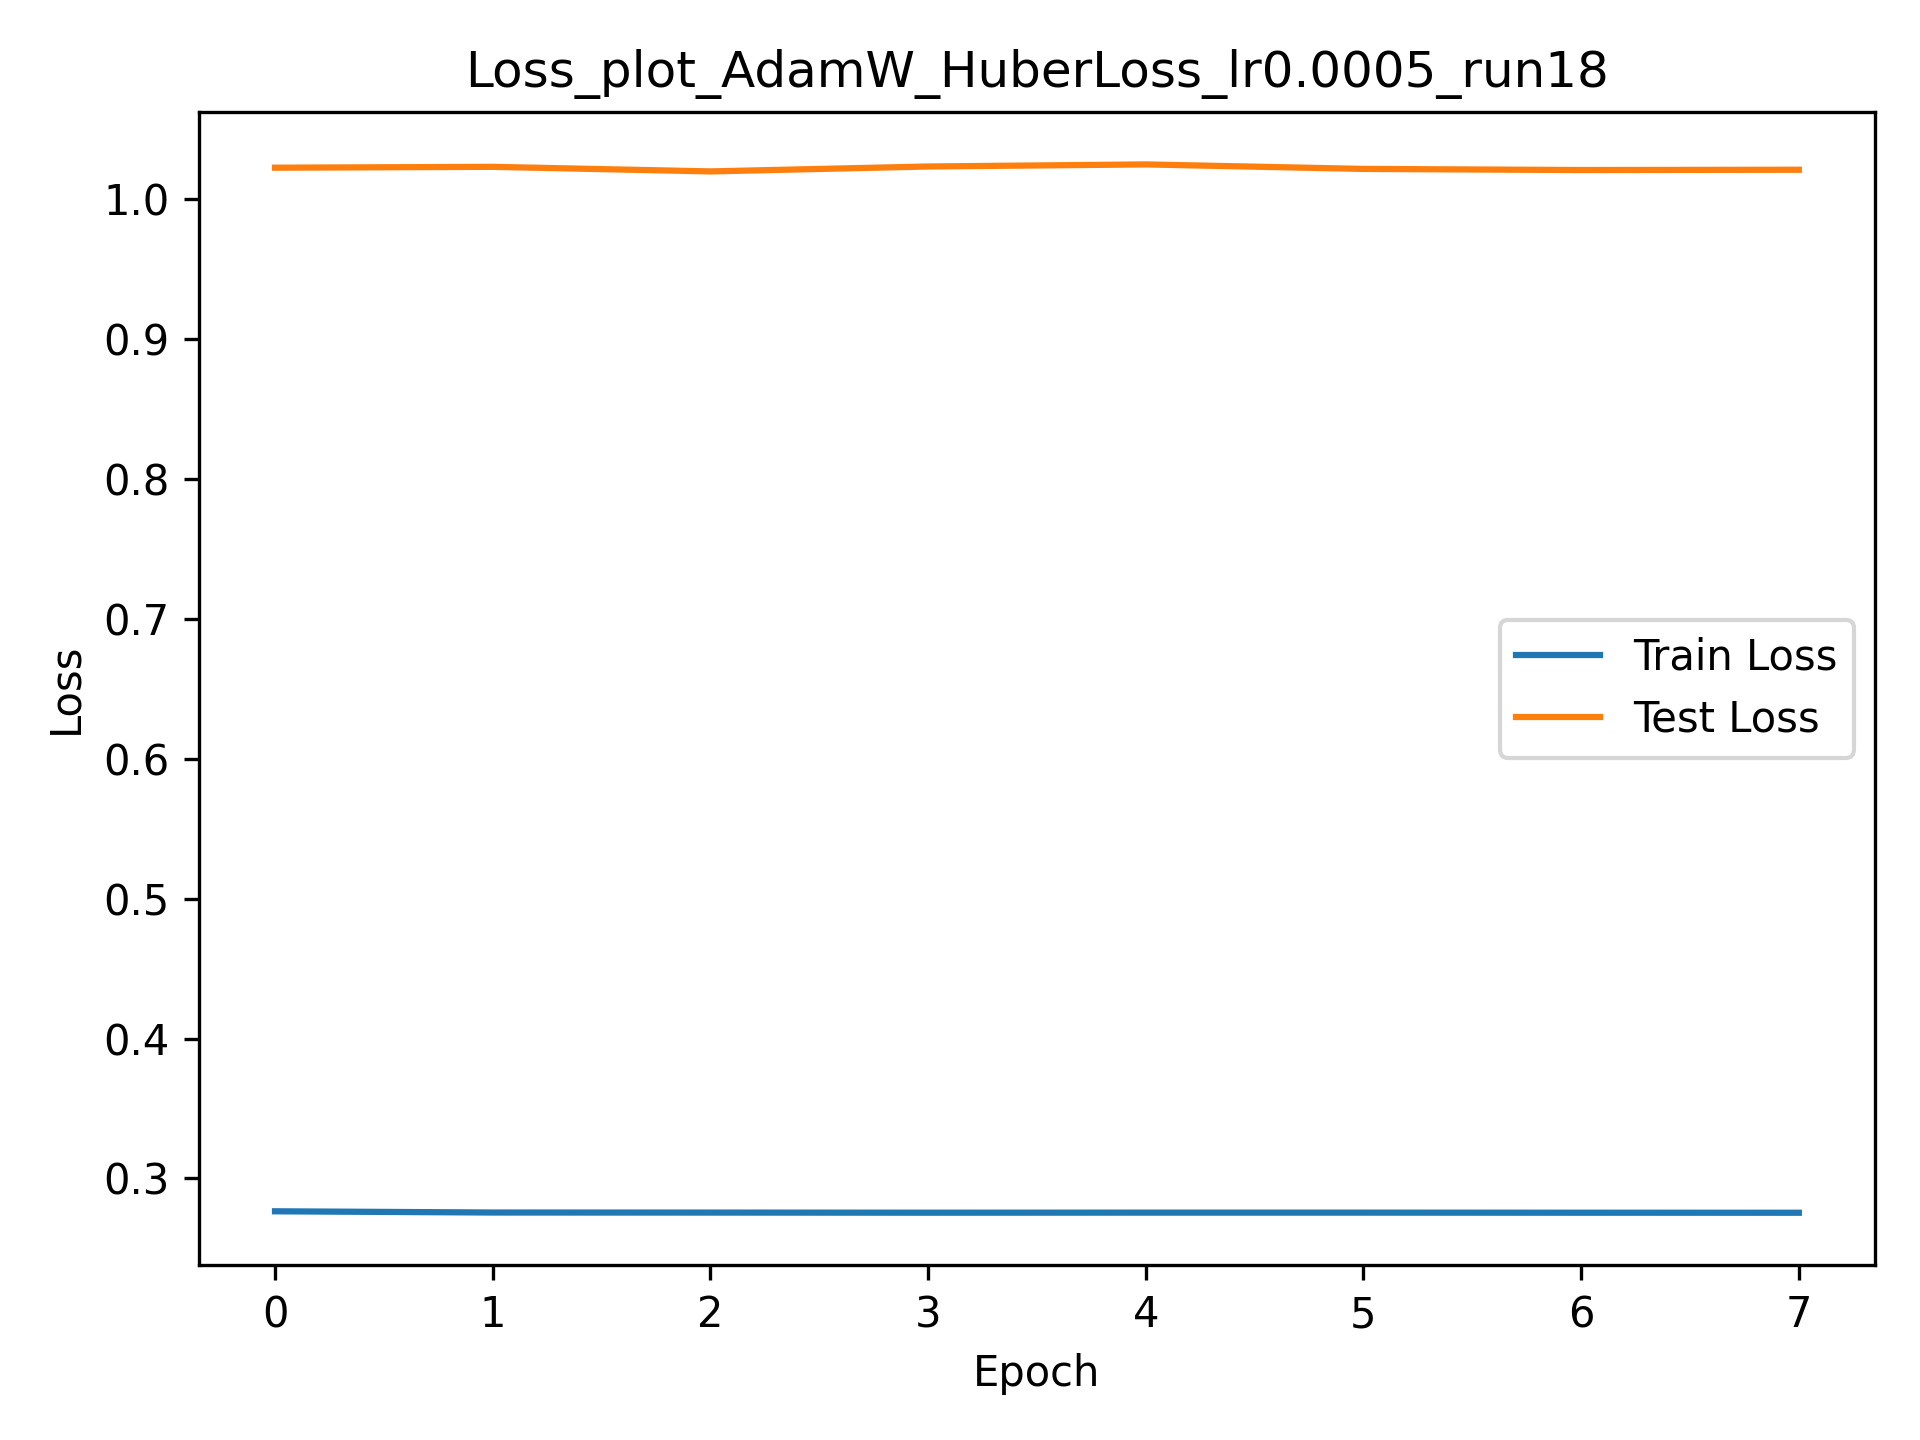

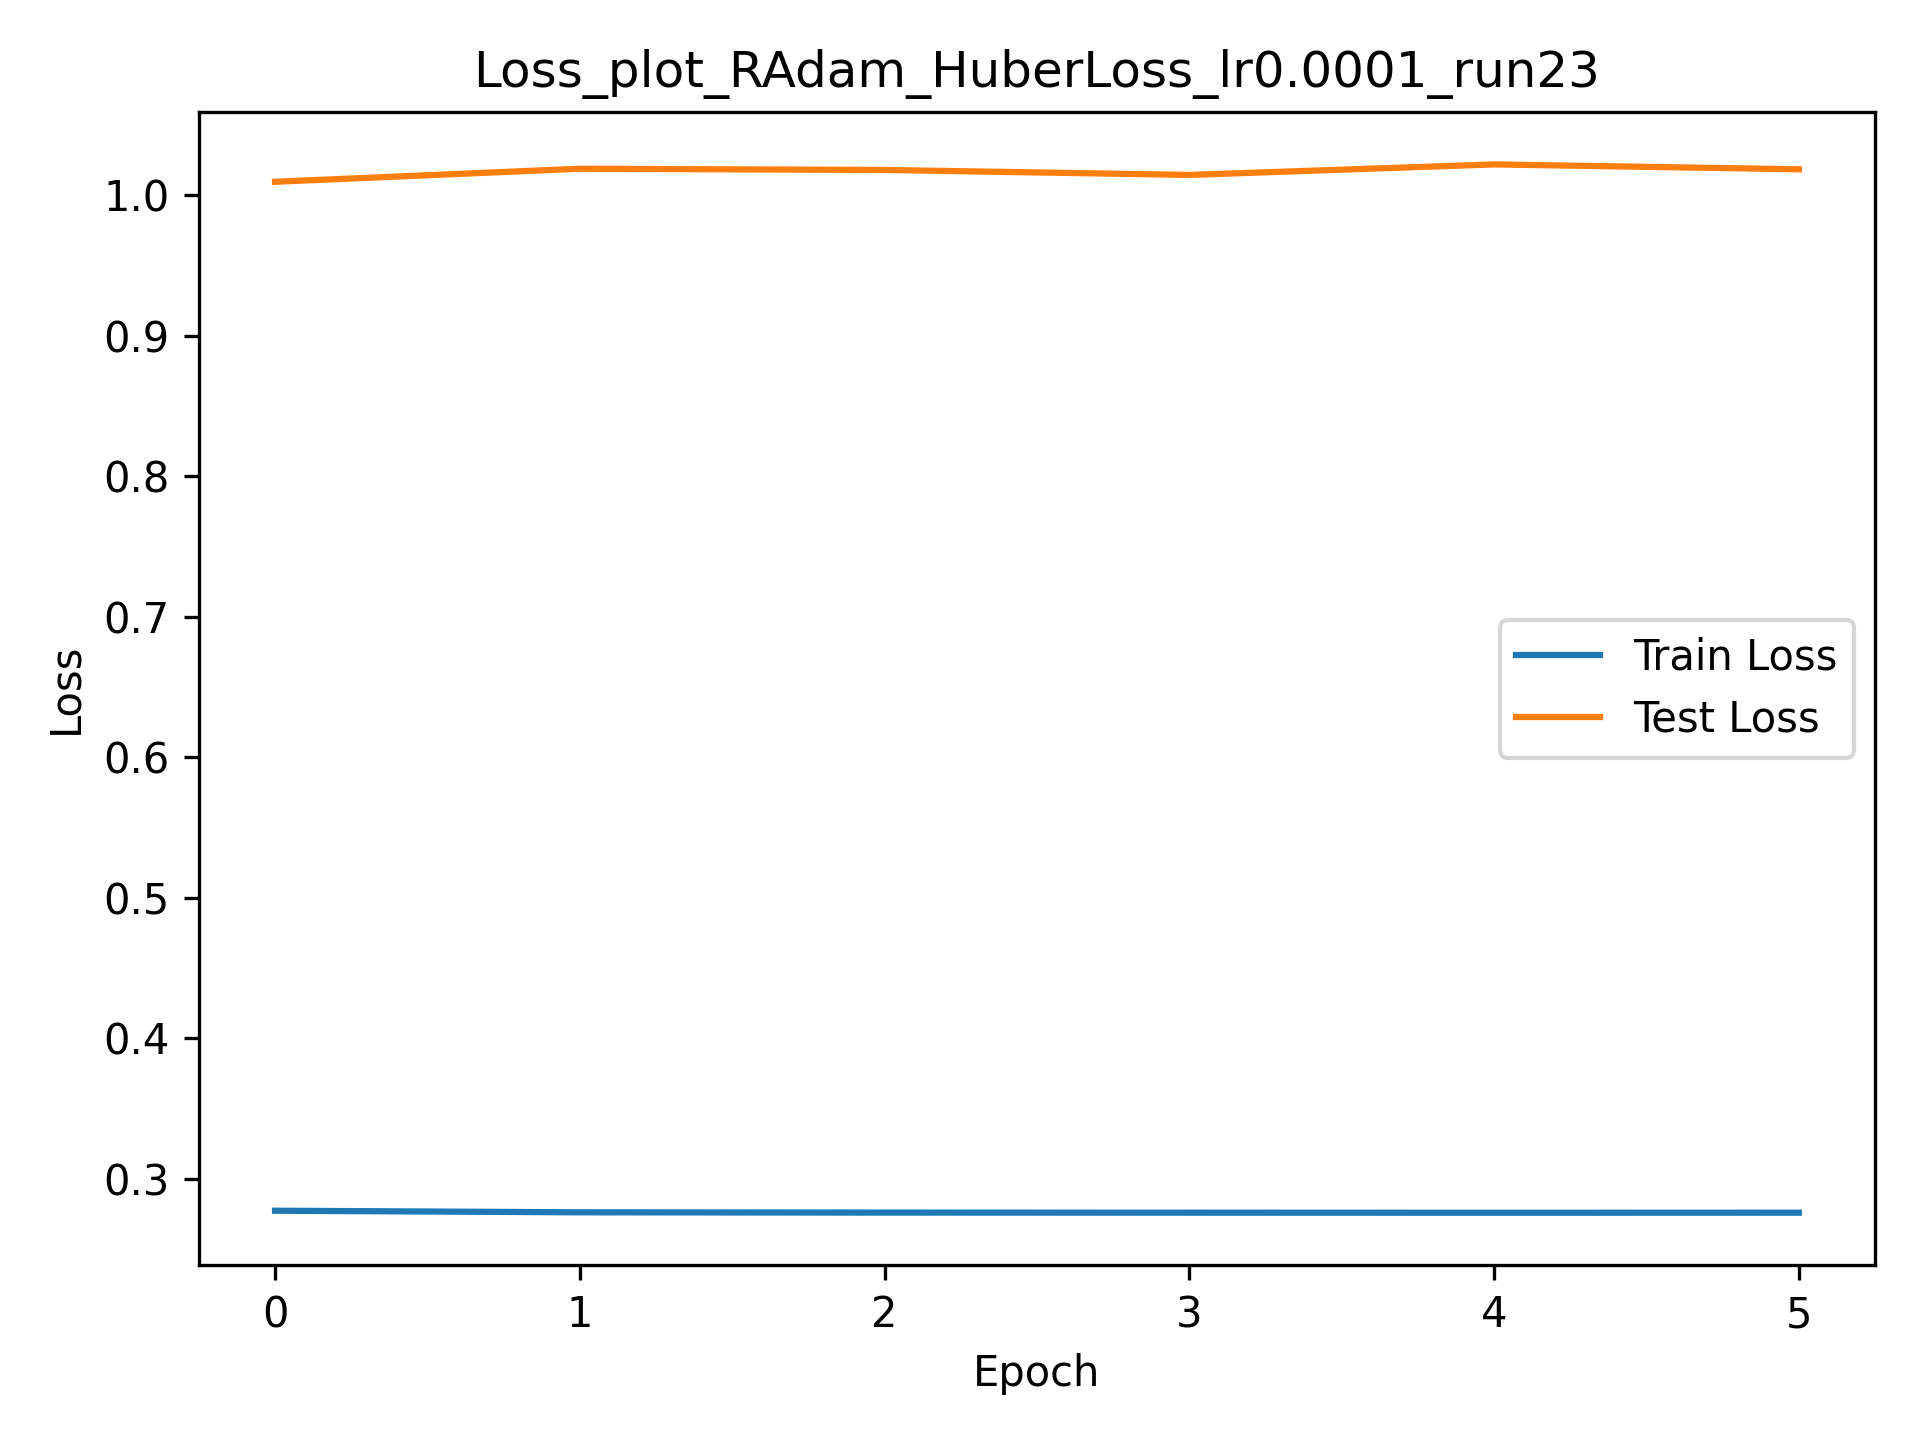

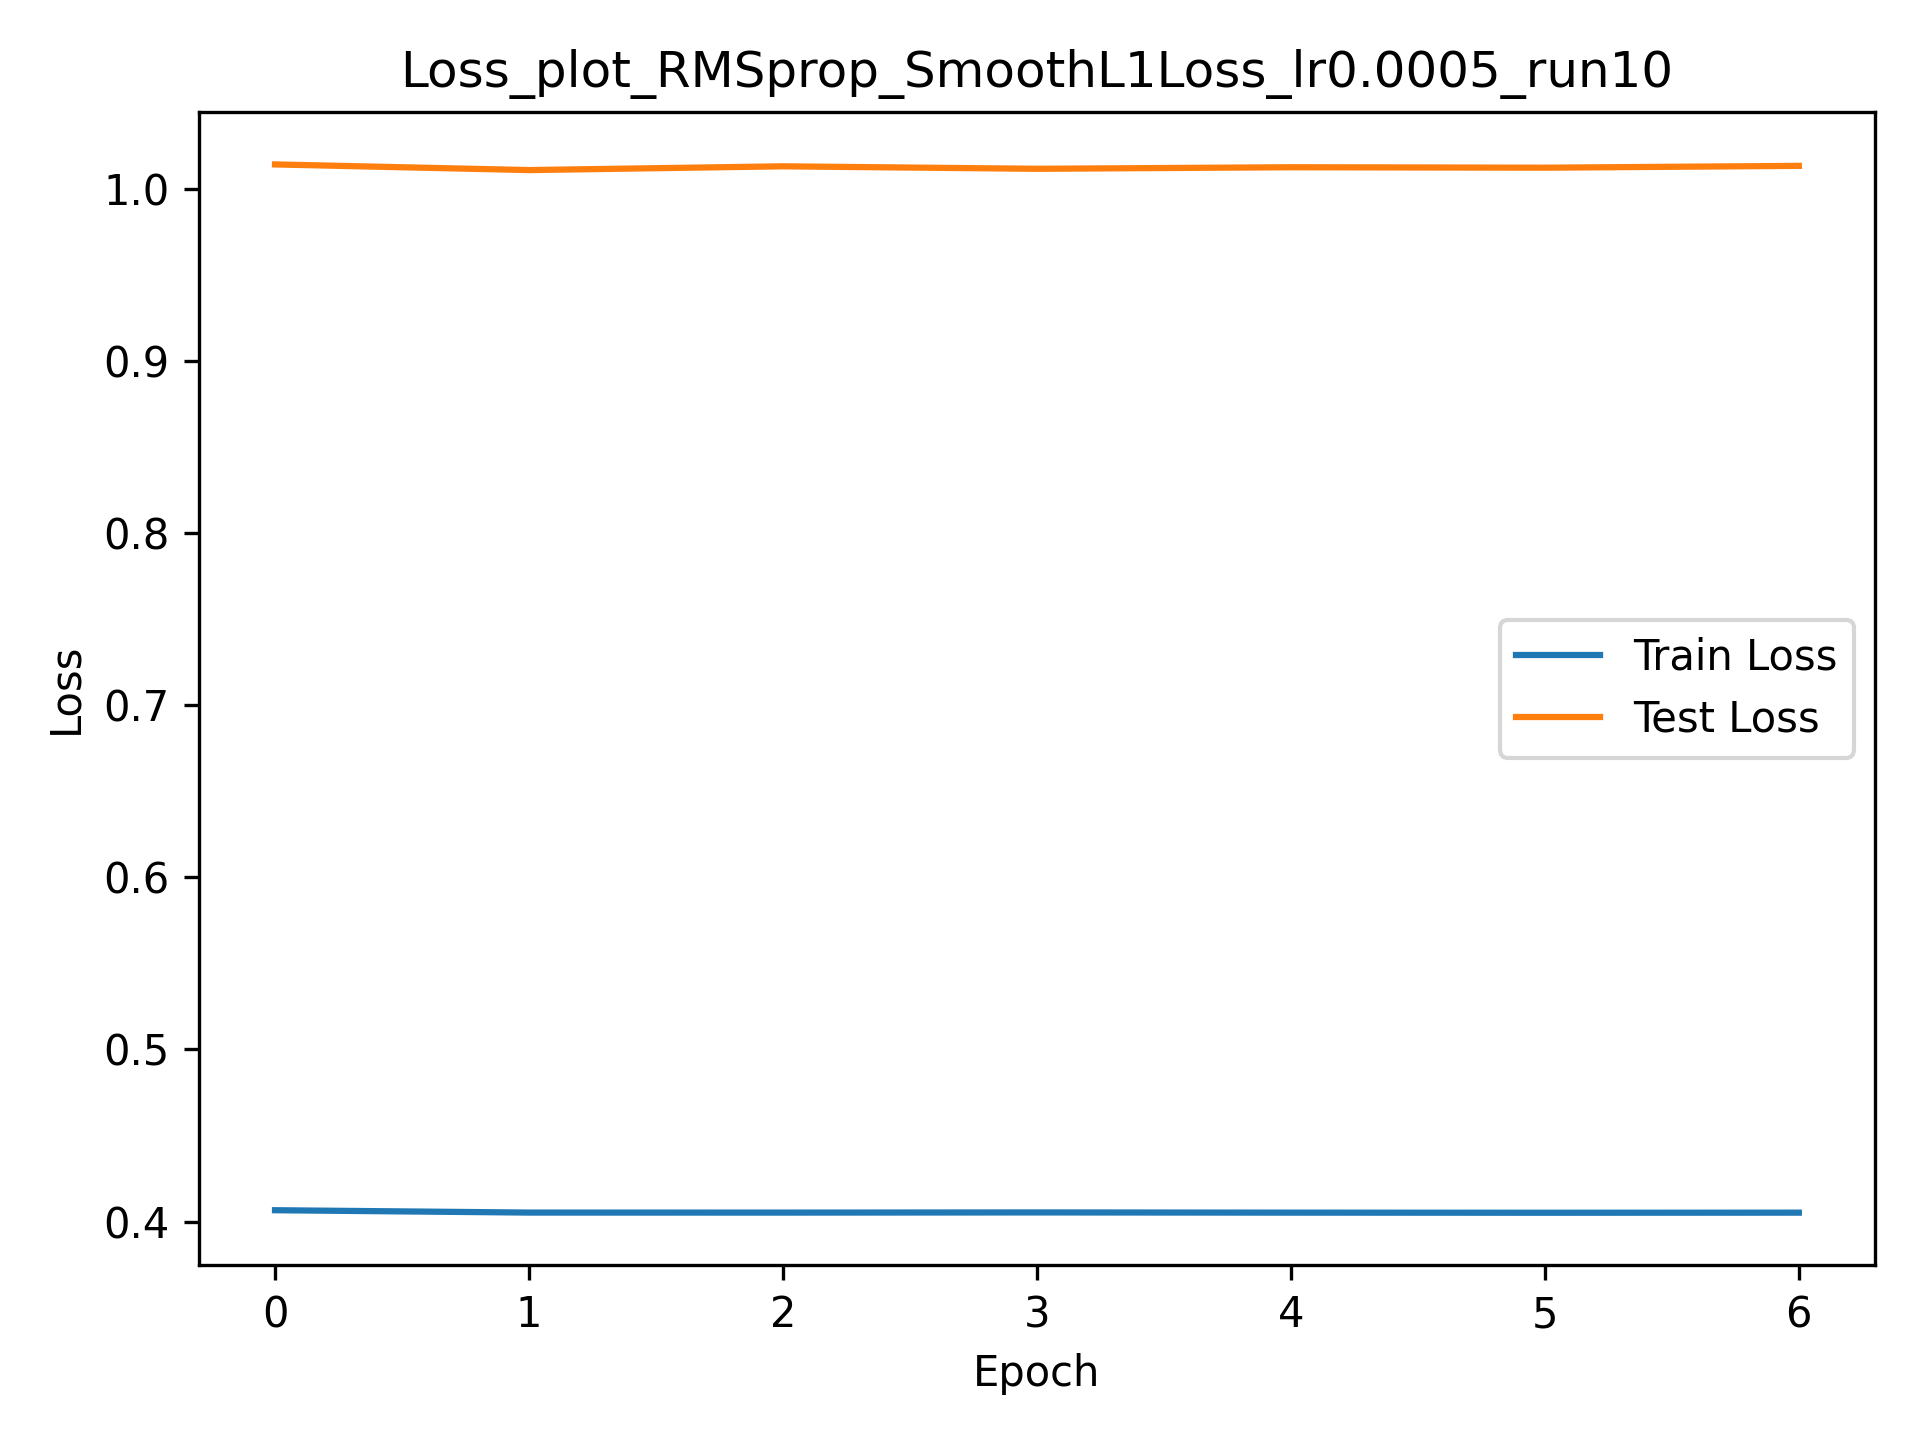

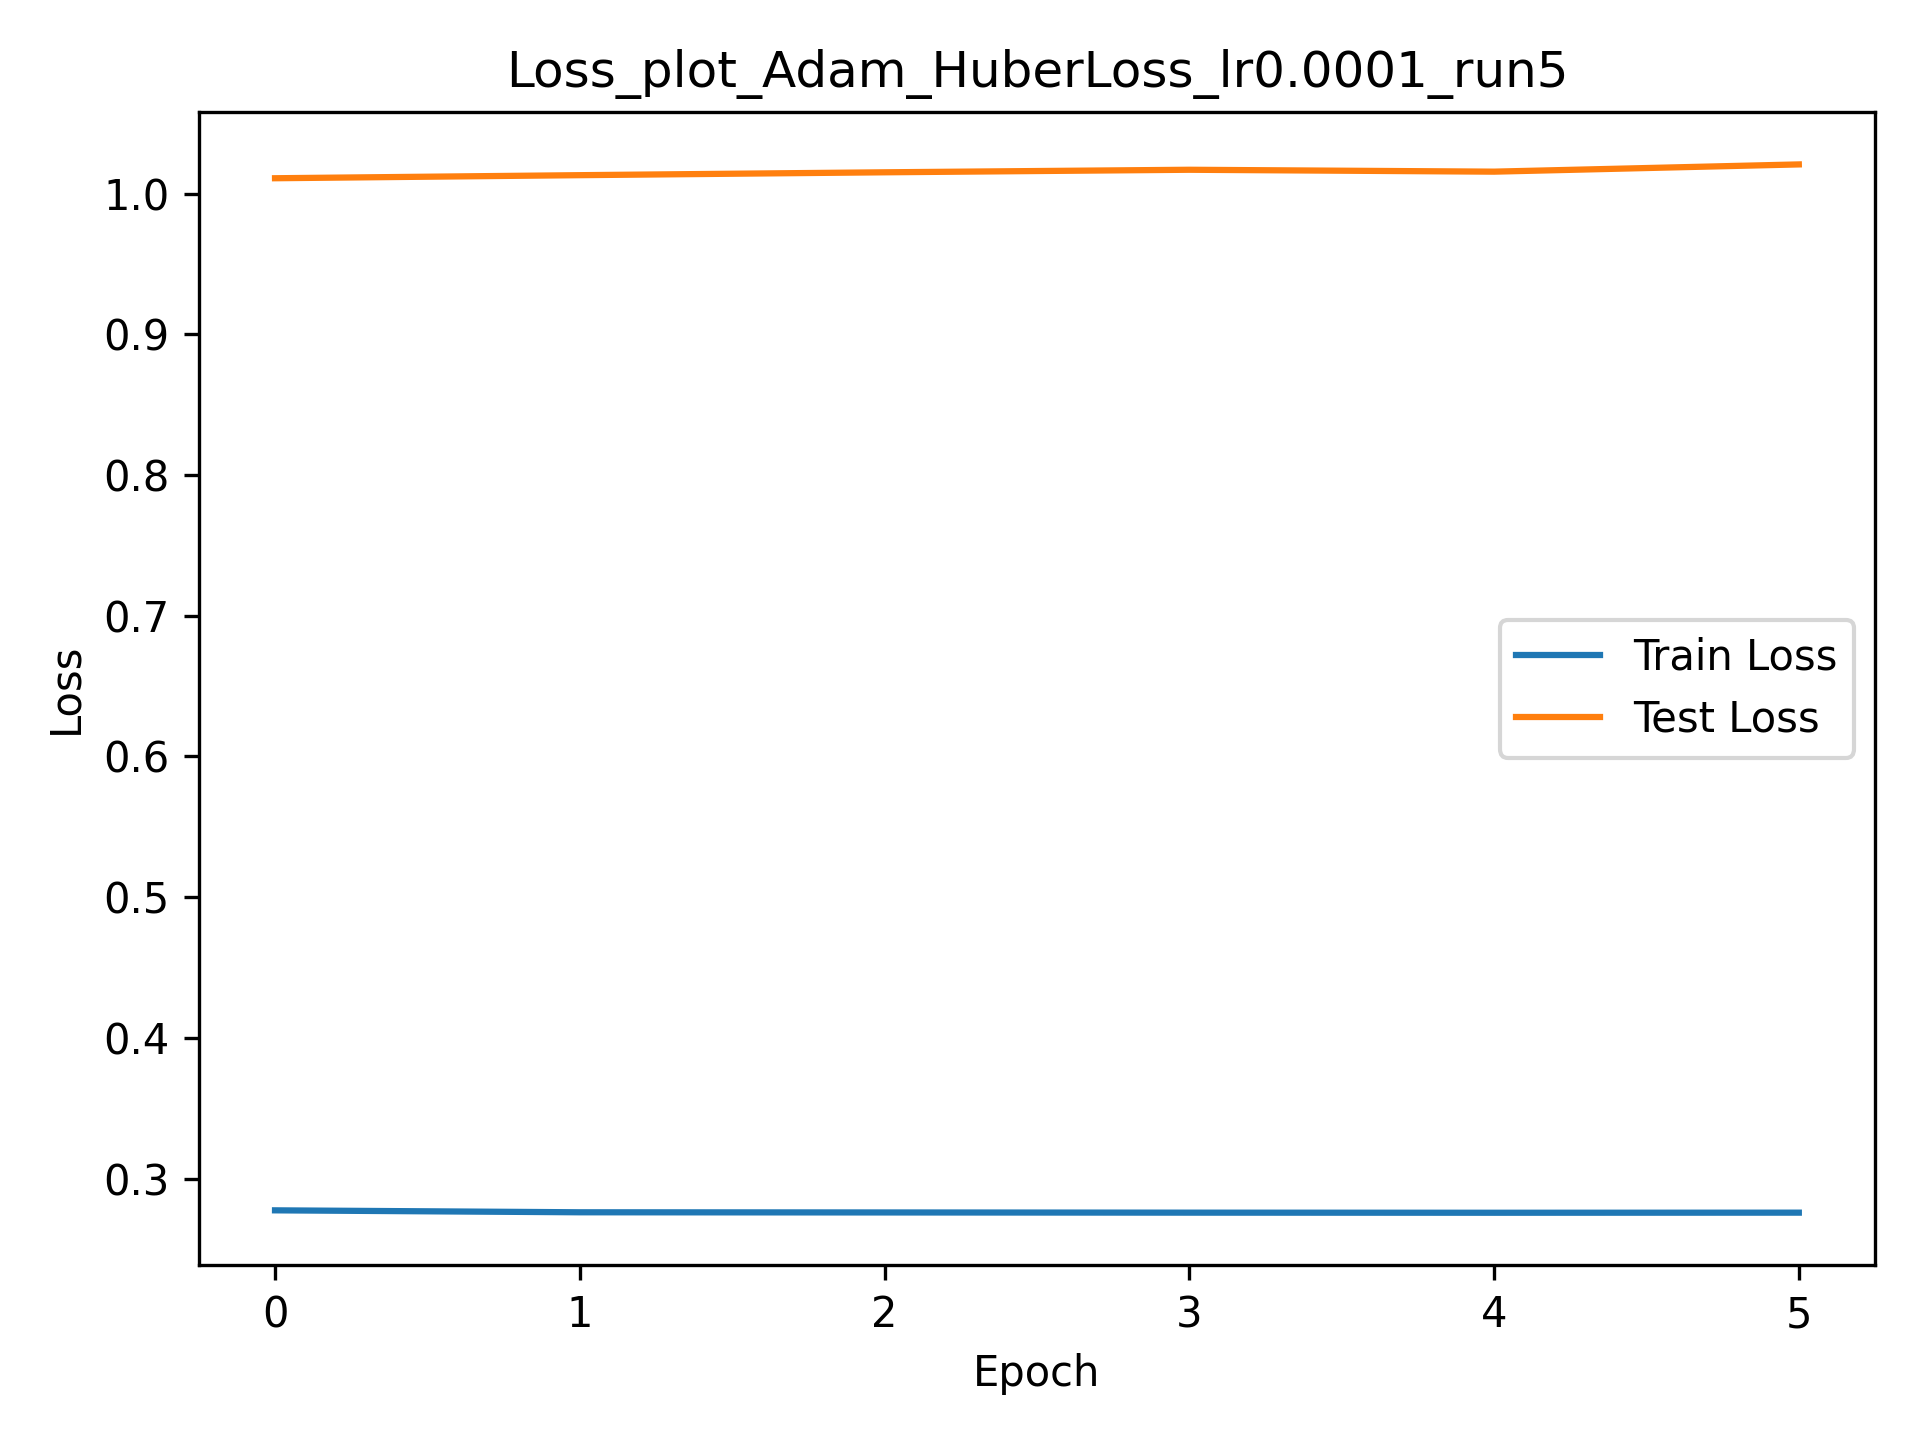

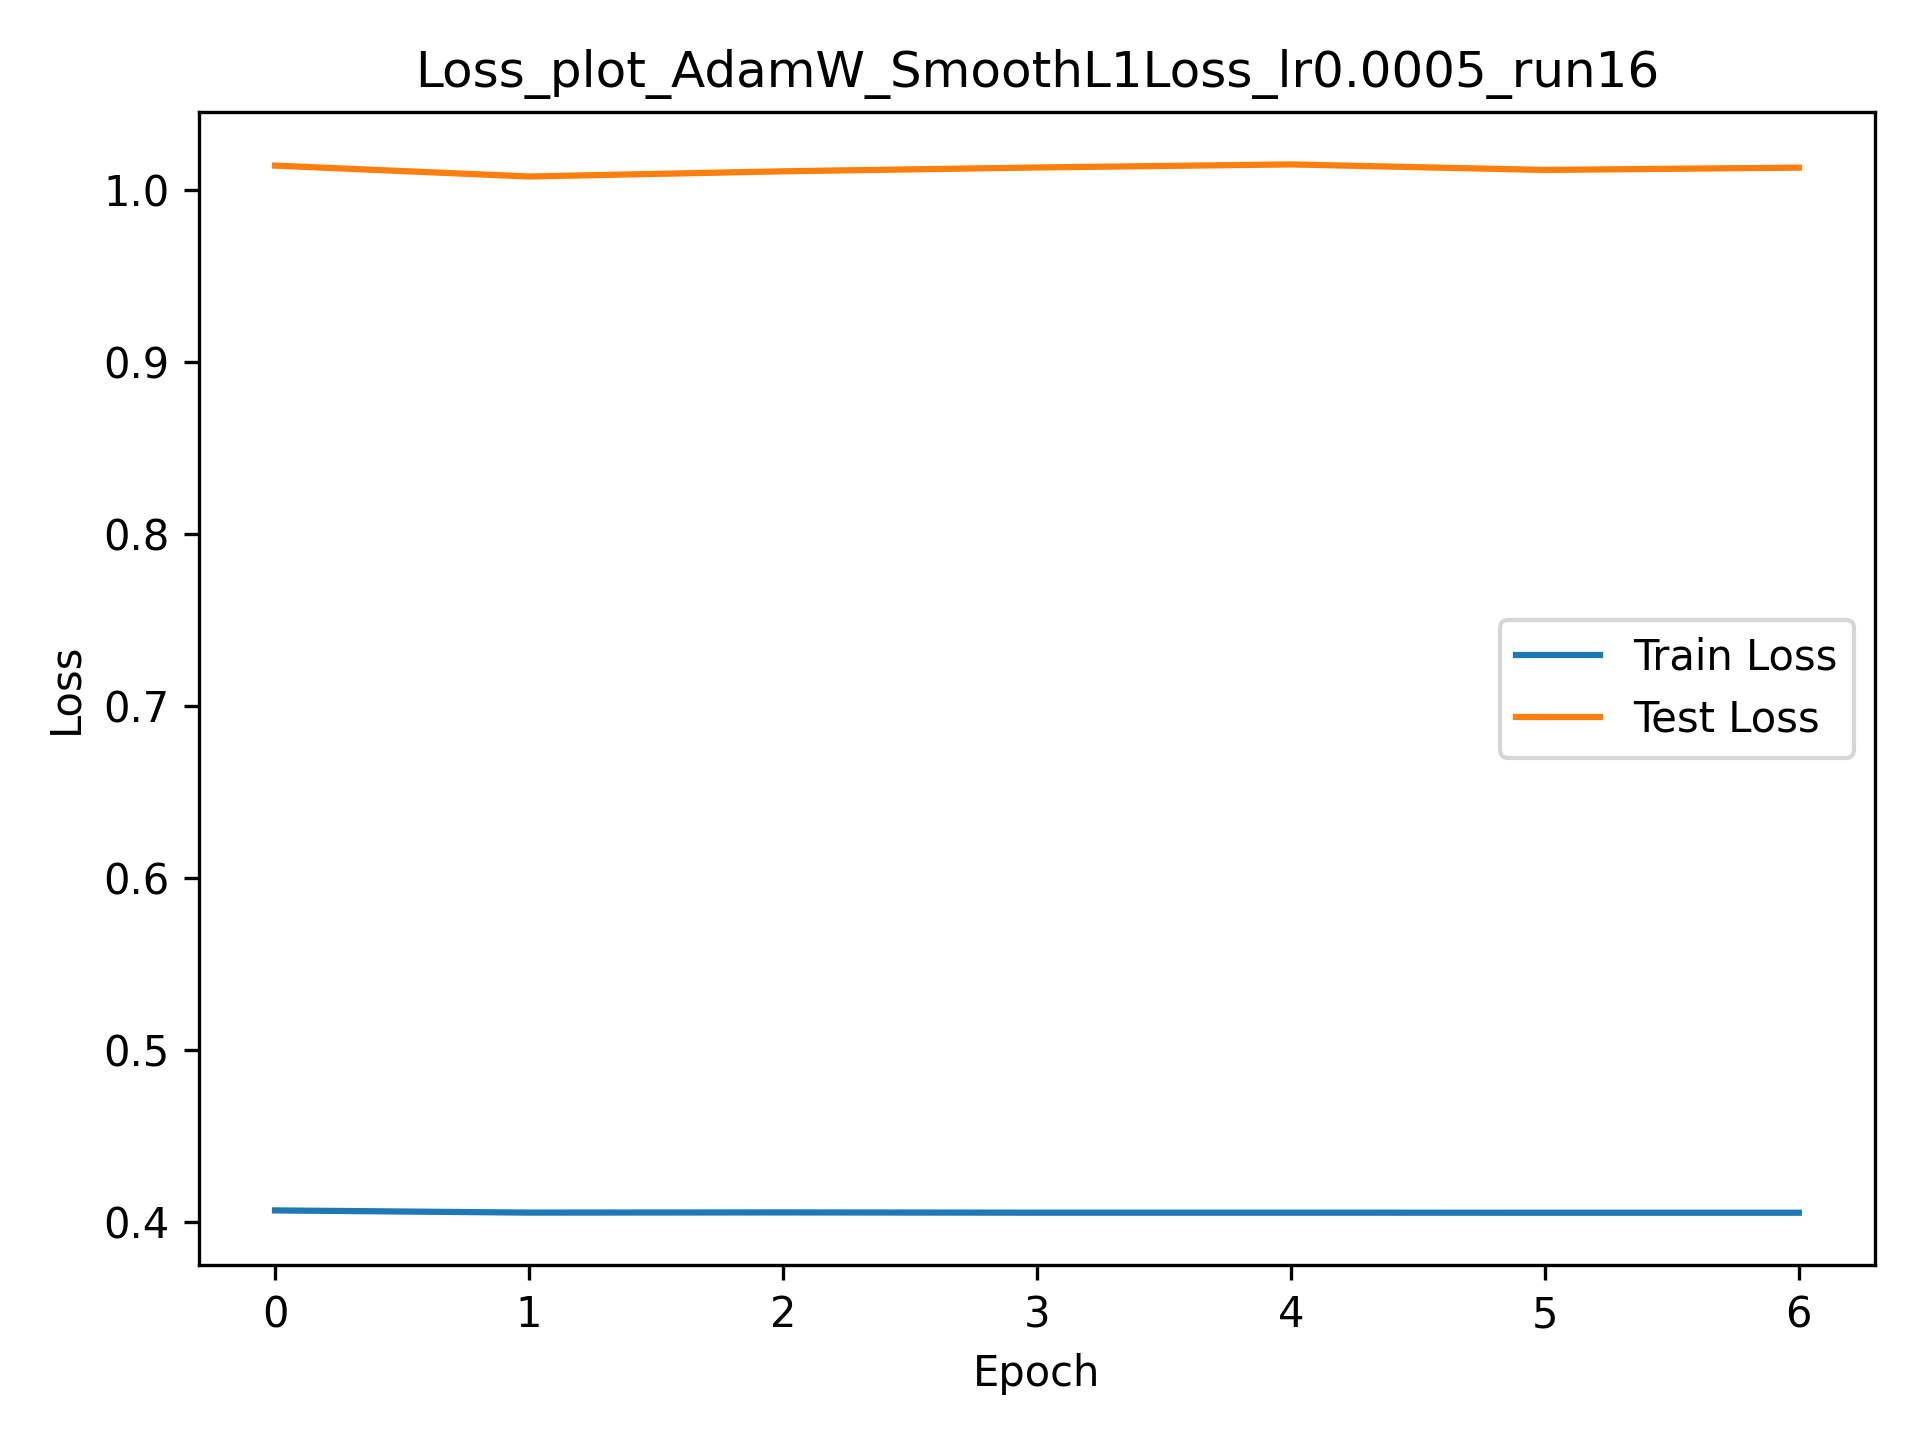

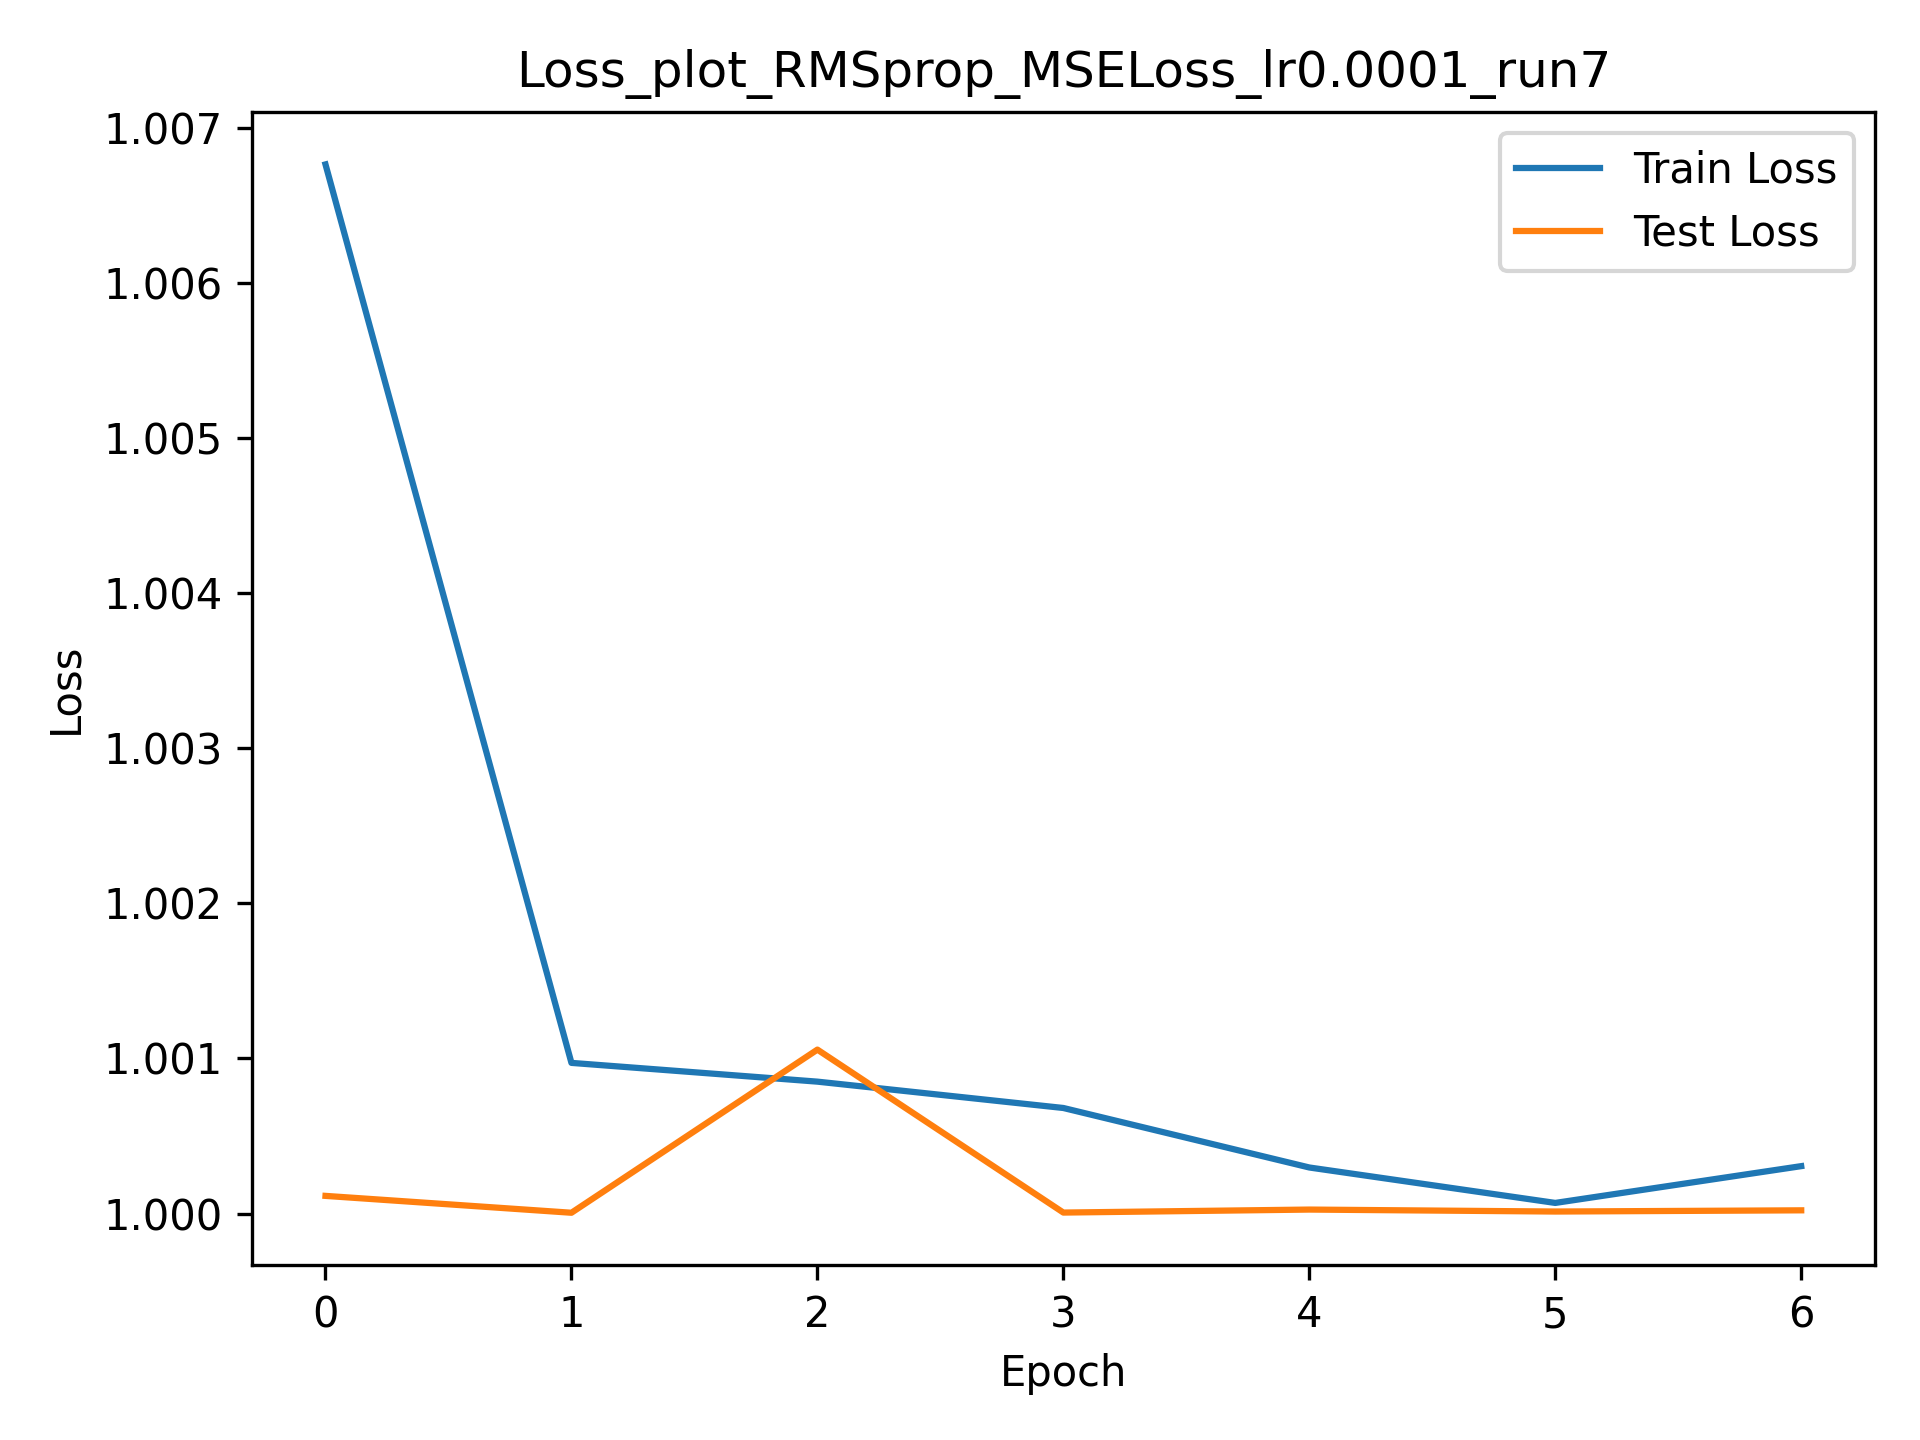

In [105]:
from IPython.display import Image, display
import os

# Get a list of all PNG files in the directory
png_files = [f for f in os.listdir('/content') if f.endswith('.png')]

# Iterate through the list and display each image
for png_file in png_files:
    image_path = os.path.join('/content', png_file)
    display(Image(filename=image_path))

Code for generating CSV/JSON/Pickle files for Gradio drug response app

In [34]:
# Code for generating CSV/JSON/Pickle files for Gradio drug response app

import json
import pickle
import csv
import pandas as pd

# Generate user-friendly cell line labels for dropdown
def generate_readable_cell_labels(
    csv_path='/content/data/CCLE/sample_info.csv',
    output_path='cell_dropdown_labels.json'
):
    df = pd.read_csv(csv_path, usecols=['COSMICID', 'CCLE_Name', 'primary_disease'])
    df = df.dropna()

    # Ensure COSMIC IDs are strings
    df['COSMICID'] = df['COSMICID'].astype(int).astype(str)

    # Format: "MCF7 (Breast Cancer)"
    df['label'] = df['CCLE_Name'] + " (" + df['primary_disease'] + ")"

    # Map: label ➝ COSMICID
    label_to_cosmic = dict(zip(df['label'], df['COSMICID']))

    with open(output_path, 'w') as f:
        json.dump(label_to_cosmic, f)

    print(f"Saved {len(label_to_cosmic)} user-friendly labels to `{output_path}`")
    return label_to_cosmic

# ➤ Create cell labels
generate_readable_cell_labels()

# Collect COSMIC IDs from IC50 dataset
ic50_cosmic_ids = set()
with open('/content/data/GDSC/PANCANCER_IC.csv') as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for row in reader:
        ic50_cosmic_ids.add(str(row[3]))

print("Sample COSMIC IDs from IC50 file:", list(ic50_cosmic_ids)[:5])

# Load gene expression data
cell_map, cell_features, _ = save_preprocessed_gene_data()
print("Sample COSMIC IDs in gene expression data (cell_map):", list(cell_map.keys())[:5])

# Prepare full dataset
include_bond_features = True
use_relational_bonds = True

drug_inputs, cell_inputs, ic50_outputs, drug_labels, cell_labels, _ = prepare_drug_cellline_dataset(
    include_bond_features, use_relational_bonds
)

# Drug name ➝ SMILES mapping
drug_name_to_smiles = dict(zip(drug_labels, drug_inputs))

# Cell line name ➝ expression vector
cell_name_to_vector = {
    name: vec.tolist() for name, vec in zip(cell_labels, cell_inputs)
}

# Save mappings
with open("drug_name_to_smiles.json", "w") as f:
    json.dump(drug_name_to_smiles, f)

with open("cell_name_to_vector.pkl", "wb") as f:
    pickle.dump(cell_name_to_vector, f)

# Preview drug and cell datasets
drug_df = pd.DataFrame(list(drug_name_to_smiles.items()), columns=["Drug Name", "SMILES"])
display(drug_df.head())

cell_df = pd.DataFrame([(k, v) for k, v in cell_name_to_vector.items()], columns=["Cell Line", "Gene Vector"])
cell_df["Gene Vector Preview"] = cell_df["Gene Vector"].apply(lambda x: x[:5])
display(cell_df.head())

# Valid drug-cell line pairs
valid_pairs = set(zip(drug_labels, cell_labels))
with open("valid_drug_cell_pairs.pkl", "wb") as f:
    pickle.dump(valid_pairs, f)

# Drug SMILES ➝ Graph encoding
_, _, smiles_graph_map = load_smile_to_graph(
    include_bond_features, use_relational_bonds
)
with open("smiles_graph_map.pkl", "wb") as f:
    pickle.dump(smiles_graph_map, f)


Saved 981 user-friendly labels to `cell_dropdown_labels.json`
Sample COSMIC IDs from IC50 file: ['907280', '908463', '753566', '924241', '909248']
number of preserved landmark genes: 956
Sample COSMIC IDs in gene expression data (cell_map): ['687455', '1659929', '684681', '906836', '906791']
number of preserved landmark genes: 956
drug num: 223
cell-line num: 700
total length of drug-cellline pair: 224510
✅ Final samples: 133212
🚫 Missing pairs skipped: 91298
↳ Missing cell IDs: 379, Missing drug IDs: 27
Converting training data to PyTorch format: 'GDSC_train.pt'


Drug Name                                             SMILES
0   Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1   Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
2   Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
3  PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
4      MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...

Cell Line                                        Gene Vector  \
0    684072  [[5.852747964800878, 5.280585202564472, 6.4775...   
1    684681  [[3.9873208659292536, 3.353323291162897, 5.537...   
2    687448  [[5.388878338811989, 5.28835856219366, 6.01502...   
3    687562  [[4.34766565630097, 4.416839741912829, 6.55382...   
4    687568  [[5.128458384146928, 3.3909427728025427, 6.270...   

                                 Gene Vector Preview  
0  [[5.852747964800878, 5.280585202564472, 6.4775...  
1  [[3.9873208659292536, 3.353323291162897, 5.537...  
2  [[5.388878338811989, 5.28835856219366, 6.01502...  
3  [[4.34766565630097, 4.416839741912829, 6.55382...  
4  [[5.128458384146928, 3.3909427728025427, 6.270...